<a href="https://colab.research.google.com/github/bkkaggle/pytorch-CycleGAN-and-pix2pix/blob/master/pix2pix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [0]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

In [8]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

FileNotFoundError: [Errno 2] No such file or directory: 'pytorch-CycleGAN-and-pix2pix/'

In [0]:
!pip install -r requirements.txt

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_pix2pix_dataset.sh [cityscapes, night2day, edges2handbags, edges2shoes, facades, maps]`

Or use your own dataset by creating the appropriate folders and adding in the images. Follow the instructions [here](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/docs/datasets.md#pix2pix-datasets).

In [4]:
!bash ./datasets/download_pix2pix_dataset.sh edges2handbags

Specified [edges2handbags]
for details.

--2020-04-08 15:21:51--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/edges2handbags.tar.gz
Resolving fwdproxy (fwdproxy)... 2401:db00:20ff:ff70:face:b00c:0:1e10
Connecting to fwdproxy (fwdproxy)|2401:db00:20ff:ff70:face:b00c:0:1e10|:8080... connected.
Proxy request sent, awaiting response... 200 OK
Length: 8556411008 (8.0G) [application/x-gzip]
Saving to: ‘./datasets/edges2handbags.tar.gz’

 0% [                                       ] 607,862     1.54MB/s   in 0.4s   

2020-04-08 15:21:52 (1.54 MB/s) - Read error at byte 607862/8556411008 (Connection reset by peer). Retrying.

--2020-04-08 15:21:53--  (try: 2)  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/edges2handbags.tar.gz
Connecting to fwdproxy (fwdproxy)|2401:db00:20ff:ff70:face:b00c:0:1e10|:8080... connected.
Proxy request sent, awaiting response... 206 Partial Content
Length: 8556411008 (8.0G), 8555803146 (8.0G) remaining [application/x-gzip]
Saving to: ‘./datasets/edges2

Dataset Collection
====

(256, 256)
torch.Size([256, 512])


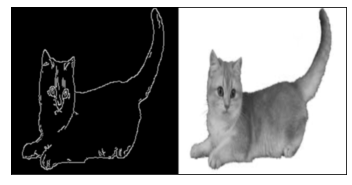

In [18]:
# 256 x 256

import cv2
import numpy as np
from matplotlib import pyplot as plt
import torchvision

def image_resize_preserving_aspect_ratio(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

In [10]:
pwd

'/data/users/sash/pix2pix_cyclegan/pytorch-CycleGAN-and-pix2pix'

In [63]:
import cv2
import numpy as np
import torch
import torchvision

width, height = 256, 256
img = cv2.imread('./datasets/scrape/google-images-download/google_images_download/downloads/cats without background/9.cat-png-transparent-background--624.png.gif')
img = cv2.resize(img, (width, height))
edges = cv2.Canny(img,100, 200).reshape((width, height, 1))
edges = np.repeat(edges, 3, axis=2)
print(edges.shape)
print(img.shape)

a = torch.tensor(np.hstack([edges, img]), dtype=torch.float64)
cv2.imwrite("./datasets/cats/1.png", np.hstack([edges, img])) 

# torchvision.utils.save_image(a, "./datasets/cats/1.png", normalize=True)

# plt.imshow(a, cmap = 'gray', interpolation = 'bicubic')
# plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
# plt.show()


(256, 256, 3)
(256, 256, 3)
torch.Size([256, 512, 3])


True

In [46]:
%debug

> /home/sash/local/anaconda3/envs/pix2pix/lib/python3.8/site-packages/PIL/Image.py(2682)fromarray()
   2680             mode, rawmode = _fromarray_typemap[typekey]
   2681         except KeyError:
-> 2682             raise TypeError("Cannot handle this data type: %s, %s" % typekey)
   2683     else:
   2684         rawmode = mode

ipdb> typekey
((1, 1, 256), '|u1')
ipdb> l 2675
   2670     arr = obj.__array_interface__
   2671     shape = arr["shape"]
   2672     ndim = len(shape)
   2673     strides = arr.get("strides", None)
   2674     if mode is None:
   2675         try:
   2676             typekey = (1, 1) + shape[2:], arr["typestr"]
   2677         except KeyError:
   2678             raise TypeError("Cannot handle this data type")
   2679         try:
   2680             mode, rawmode = _fromarray_typemap[typekey]

ipdb> mode
ipdb> shape
(512, 3, 256)
--KeyboardInterrupt--
ipdb> q


In [62]:
torchvision.utils.save_image(torch.tensor(img) / 255., "./datasets/cats/1.png")

TypeError: Cannot handle this data type: (1, 1, 256), |u1

In [59]:
torch.tensor(img, dtype=torch.uint8)

tensor([[[ 76, 112,  71],
         [ 76, 112,  71],
         [ 76, 112,  71],
         ...,
         [ 76, 112,  71],
         [ 76, 112,  71],
         [ 76, 112,  71]],

        [[ 76, 112,  71],
         [ 76, 112,  71],
         [ 76, 112,  71],
         ...,
         [ 76, 112,  71],
         [ 76, 112,  71],
         [ 76, 112,  71]],

        [[ 76, 112,  71],
         [ 76, 112,  71],
         [ 76, 112,  71],
         ...,
         [ 76, 112,  71],
         [ 76, 112,  71],
         [ 76, 112,  71]],

        ...,

        [[ 76, 112,  71],
         [ 76, 112,  71],
         [ 76, 112,  71],
         ...,
         [ 76, 112,  71],
         [ 76, 112,  71],
         [ 76, 112,  71]],

        [[ 76, 112,  71],
         [ 76, 112,  71],
         [ 76, 112,  71],
         ...,
         [ 76, 112,  71],
         [ 76, 112,  71],
         [ 76, 112,  71]],

        [[ 76, 112,  71],
         [ 76, 112,  71],
         [ 76, 112,  71],
         ...,
         [ 76, 112,  71],
        

In [2]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    # return the edged image
    return edged

import cv2
import numpy as np

image = cv2.imread('./datasets/cats/0.png')
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# blurred = cv2.GaussianBlur(gray, (3, 3), 0)
# # apply Canny edge detection using a wide threshold, tight
# # threshold, and automatically determined threshold
# wide = cv2.Canny(blurred, 10, 200)
# tight = cv2.Canny(blurred, 225, 250)
auto = auto_canny(image)
# show the images

cv2.imshow("Edges", np.hstack([image, auto]))
cv2.waitKey(0)
cv2.destroyAllWindows()

(158, 320)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_pix2pix_model.sh [edges2shoes, sat2map, map2sat, facades_label2photo, and day2night]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [65]:
pwd

'/data/users/sash/pix2pix_cyclegan/pytorch-CycleGAN-and-pix2pix'

In [64]:
!bash ./scripts/download_pix2pix_model.sh edges2shoes

Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [edges2shoes]
for details.

--2020-04-10 22:40:38--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/edges2shoes.pth
Resolving fwdproxy (fwdproxy)... 2401:db00:20ff:ff70:face:b00c:0:1e10
Connecting to fwdproxy (fwdproxy)|2401:db00:20ff:ff70:face:b00c:0:1e10|:8080... connected.
Proxy request sent, awaiting response... 200 OK
Length: 217704688 (208M)
Saving to: ‘./checkpoints/edges2shoes_pretrained/latest_net_G.pth’

 0% [                                       ] 287,917     --.-K/s  eta 2h 39m  ^C


# Training

-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

In [60]:
!python train.py --dataroot ../dataset/train_cats_pytorch_hed --name edges2cats_pix2pix --model pix2pix --display_id=0

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/edges2cats         	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 0                             	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
 

In [2]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [2]:
import cv2

# Testing

-   `python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).

> See a list of currently available models at ./scripts/download_pix2pix_model.sh

In [23]:
!ls checkpoints/

edges2cats_pix2pix   edges2shoes_pretrained  facades_pretrained
edges2shoes_pix2pix  facades_pix2pix


In [11]:
!python test.py --dataroot ./datasets/edges2cats_single --direction AtoB --model pix2pix --name edges2cats_pix2pix --single_inference_mode True --dataset_mode single


----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/edges2cats_single  	[default: None]
             dataset_mode: single                        	[default: aligned]
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0         

# Visualize

In [7]:
ls ./results/edges2cats_single_pix2pix/test_latest/images/

ls: cannot access ./results/edges2cats_single_pix2pix/test_latest/images/: No such file or directory


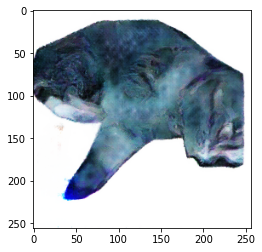

In [4]:
import matplotlib.pyplot as plt

img = plt.imread('./results/edges2cats_pix2pix/test_latest/images/2131_fake_B.png')
plt.imshow(img)

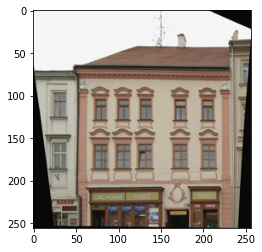

In [16]:
img = plt.imread('./results/facades_pretrained/test_latest/images/101_real_B.png')
plt.imshow(img) 

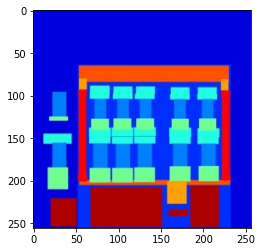

In [17]:
img = plt.imread('./results/facades_pretrained/test_latest/images/101_real_A.png')
plt.imshow(img)

# Training with Open Images for Google

In [ ]:
!python train.py --dataroot ../dataset/train_cats_pytorch_hed_rand --name open_images_hed_edges2cats_pix2pix_rand --model pix2pix --display_id=0
# (epoch: 27, iters: 23980, time: 0.067, data: 0.001) G_GAN: 2.529 G_L1: 17.851 D_real: 0.864 D_fake: 0.116 


----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ../dataset/train_cats_pytorch_hed_rand	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 0                             	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                  

(epoch: 1, iters: 4200, time: 0.064, data: 0.001) G_GAN: 1.745 G_L1: 39.836 D_real: 0.001 D_fake: 0.277 
(epoch: 1, iters: 4300, time: 0.064, data: 0.001) G_GAN: 1.859 G_L1: 58.027 D_real: 0.002 D_fake: 0.338 
(epoch: 1, iters: 4400, time: 0.065, data: 0.001) G_GAN: 1.877 G_L1: 22.153 D_real: 1.894 D_fake: 0.052 
(epoch: 1, iters: 4500, time: 0.064, data: 0.001) G_GAN: 2.684 G_L1: 27.109 D_real: 0.529 D_fake: 0.171 
(epoch: 1, iters: 4600, time: 0.063, data: 0.001) G_GAN: 2.918 G_L1: 23.628 D_real: 0.011 D_fake: 0.123 
(epoch: 1, iters: 4700, time: 0.064, data: 0.001) G_GAN: 0.725 G_L1: 11.199 D_real: 0.834 D_fake: 0.324 
(epoch: 1, iters: 4800, time: 0.063, data: 0.001) G_GAN: 1.236 G_L1: 21.743 D_real: 0.017 D_fake: 1.537 
(epoch: 1, iters: 4900, time: 0.065, data: 0.001) G_GAN: 4.531 G_L1: 36.385 D_real: 0.025 D_fake: 0.016 
(epoch: 1, iters: 5000, time: 0.063, data: 0.001) G_GAN: 4.528 G_L1: 39.166 D_real: 0.051 D_fake: 0.021 
saving the latest model (epoch 1, total_iters 5000)
(ep

(epoch: 1, iters: 11900, time: 0.056, data: 0.001) G_GAN: 1.842 G_L1: 25.064 D_real: 0.163 D_fake: 0.126 
(epoch: 1, iters: 12000, time: 0.116, data: 0.001) G_GAN: 2.073 G_L1: 37.220 D_real: 0.000 D_fake: 0.237 
(epoch: 1, iters: 12100, time: 0.064, data: 0.001) G_GAN: 2.373 G_L1: 15.963 D_real: 0.008 D_fake: 0.121 
(epoch: 1, iters: 12200, time: 0.062, data: 0.001) G_GAN: 2.434 G_L1: 27.677 D_real: 0.042 D_fake: 0.132 
(epoch: 1, iters: 12300, time: 0.062, data: 0.001) G_GAN: 2.829 G_L1: 41.768 D_real: 0.112 D_fake: 0.102 
(epoch: 1, iters: 12400, time: 0.062, data: 0.001) G_GAN: 2.292 G_L1: 44.256 D_real: 0.144 D_fake: 0.115 
(epoch: 1, iters: 12500, time: 0.062, data: 0.001) G_GAN: 2.438 G_L1: 49.557 D_real: 0.001 D_fake: 0.246 
(epoch: 1, iters: 12600, time: 0.063, data: 0.001) G_GAN: 2.966 G_L1: 27.715 D_real: 0.178 D_fake: 0.108 
(epoch: 1, iters: 12700, time: 0.064, data: 0.001) G_GAN: 1.187 G_L1: 32.002 D_real: 0.012 D_fake: 0.733 
(epoch: 1, iters: 12800, time: 0.063, data: 0.

(epoch: 1, iters: 19600, time: 0.063, data: 0.001) G_GAN: 2.237 G_L1: 20.569 D_real: 0.024 D_fake: 0.209 
(epoch: 1, iters: 19700, time: 0.063, data: 0.001) G_GAN: 2.066 G_L1: 23.535 D_real: 1.517 D_fake: 0.025 
(epoch: 1, iters: 19800, time: 0.063, data: 0.001) G_GAN: 2.935 G_L1: 33.433 D_real: 0.058 D_fake: 0.102 
(epoch: 1, iters: 19900, time: 0.064, data: 0.001) G_GAN: 1.089 G_L1: 26.254 D_real: 1.762 D_fake: 0.170 
(epoch: 1, iters: 20000, time: 0.108, data: 0.001) G_GAN: 1.862 G_L1: 43.367 D_real: 0.008 D_fake: 0.940 
saving the latest model (epoch 1, total_iters 20000)
(epoch: 1, iters: 20100, time: 0.063, data: 0.001) G_GAN: 1.677 G_L1: 35.874 D_real: 0.002 D_fake: 0.216 
(epoch: 1, iters: 20200, time: 0.063, data: 0.001) G_GAN: 3.013 G_L1: 17.331 D_real: 0.347 D_fake: 0.050 
(epoch: 1, iters: 20300, time: 0.064, data: 0.001) G_GAN: 1.562 G_L1: 12.343 D_real: 0.048 D_fake: 0.384 
(epoch: 1, iters: 20400, time: 0.064, data: 0.001) G_GAN: 0.956 G_L1: 38.931 D_real: 1.683 D_fake: 

(epoch: 1, iters: 27300, time: 0.063, data: 0.001) G_GAN: 2.700 G_L1: 25.683 D_real: 0.008 D_fake: 0.132 
(epoch: 1, iters: 27400, time: 0.056, data: 0.001) G_GAN: 2.301 G_L1: 18.527 D_real: 0.202 D_fake: 0.151 
(epoch: 1, iters: 27500, time: 0.057, data: 0.001) G_GAN: 0.863 G_L1: 30.207 D_real: 0.786 D_fake: 1.012 
(epoch: 1, iters: 27600, time: 0.063, data: 0.001) G_GAN: 1.382 G_L1: 18.659 D_real: 0.894 D_fake: 0.193 
(epoch: 1, iters: 27700, time: 0.063, data: 0.001) G_GAN: 3.448 G_L1: 28.272 D_real: 0.057 D_fake: 0.056 
(epoch: 1, iters: 27800, time: 0.062, data: 0.001) G_GAN: 4.124 G_L1: 32.186 D_real: 0.431 D_fake: 0.017 
(epoch: 1, iters: 27900, time: 0.062, data: 0.001) G_GAN: 1.214 G_L1: 10.601 D_real: 2.206 D_fake: 0.205 
(epoch: 1, iters: 28000, time: 0.104, data: 0.001) G_GAN: 1.113 G_L1: 25.499 D_real: 1.256 D_fake: 0.254 
(epoch: 1, iters: 28100, time: 0.064, data: 0.001) G_GAN: 1.910 G_L1: 20.613 D_real: 0.087 D_fake: 0.275 
(epoch: 1, iters: 28200, time: 0.064, data: 0.

(epoch: 2, iters: 6730, time: 0.063, data: 0.001) G_GAN: 2.121 G_L1: 16.600 D_real: 1.387 D_fake: 0.044 
saving the latest model (epoch 2, total_iters 35000)
(epoch: 2, iters: 6830, time: 0.063, data: 0.001) G_GAN: 2.159 G_L1: 41.194 D_real: 0.013 D_fake: 0.327 
(epoch: 2, iters: 6930, time: 0.063, data: 0.001) G_GAN: 3.377 G_L1: 42.603 D_real: 0.037 D_fake: 0.052 
(epoch: 2, iters: 7030, time: 0.064, data: 0.001) G_GAN: 2.513 G_L1: 28.035 D_real: 0.031 D_fake: 0.119 
(epoch: 2, iters: 7130, time: 0.063, data: 0.001) G_GAN: 0.842 G_L1: 27.957 D_real: 0.942 D_fake: 0.555 
(epoch: 2, iters: 7230, time: 0.064, data: 0.001) G_GAN: 2.203 G_L1: 22.664 D_real: 0.633 D_fake: 0.116 
(epoch: 2, iters: 7330, time: 0.063, data: 0.001) G_GAN: 1.609 G_L1: 14.897 D_real: 0.236 D_fake: 0.410 
(epoch: 2, iters: 7430, time: 0.063, data: 0.001) G_GAN: 2.354 G_L1: 34.549 D_real: 0.466 D_fake: 0.076 
(epoch: 2, iters: 7530, time: 0.062, data: 0.001) G_GAN: 2.304 G_L1: 31.885 D_real: 0.188 D_fake: 0.152 
(e

(epoch: 2, iters: 14430, time: 0.059, data: 0.001) G_GAN: 2.603 G_L1: 13.806 D_real: 0.032 D_fake: 0.243 
(epoch: 2, iters: 14530, time: 0.064, data: 0.001) G_GAN: 1.500 G_L1: 15.939 D_real: 1.773 D_fake: 0.091 
(epoch: 2, iters: 14630, time: 0.065, data: 0.001) G_GAN: 3.383 G_L1: 24.264 D_real: 0.050 D_fake: 0.047 
(epoch: 2, iters: 14730, time: 0.063, data: 0.001) G_GAN: 1.008 G_L1: 19.980 D_real: 1.207 D_fake: 0.350 
(epoch: 2, iters: 14830, time: 0.065, data: 0.001) G_GAN: 1.927 G_L1: 24.066 D_real: 0.076 D_fake: 0.207 
(epoch: 2, iters: 14930, time: 0.063, data: 0.001) G_GAN: 2.461 G_L1: 20.858 D_real: 0.076 D_fake: 0.150 
(epoch: 2, iters: 15030, time: 0.055, data: 0.001) G_GAN: 2.360 G_L1: 44.935 D_real: 0.000 D_fake: 0.259 
(epoch: 2, iters: 15130, time: 0.063, data: 0.001) G_GAN: 2.123 G_L1: 16.221 D_real: 0.058 D_fake: 0.879 
(epoch: 2, iters: 15230, time: 0.061, data: 0.001) G_GAN: 2.400 G_L1: 25.808 D_real: 0.016 D_fake: 0.157 
(epoch: 2, iters: 15330, time: 0.063, data: 0.

(epoch: 2, iters: 22130, time: 0.065, data: 0.001) G_GAN: 1.864 G_L1: 23.582 D_real: 0.300 D_fake: 0.309 
(epoch: 2, iters: 22230, time: 0.065, data: 0.001) G_GAN: 1.474 G_L1: 24.178 D_real: 0.164 D_fake: 0.356 
(epoch: 2, iters: 22330, time: 0.064, data: 0.001) G_GAN: 1.546 G_L1: 25.903 D_real: 0.064 D_fake: 0.670 
(epoch: 2, iters: 22430, time: 0.065, data: 0.001) G_GAN: 1.547 G_L1: 22.691 D_real: 0.010 D_fake: 0.977 
(epoch: 2, iters: 22530, time: 0.064, data: 0.001) G_GAN: 1.722 G_L1: 27.854 D_real: 0.045 D_fake: 0.400 
(epoch: 2, iters: 22630, time: 0.062, data: 0.001) G_GAN: 3.467 G_L1: 25.142 D_real: 0.178 D_fake: 0.051 
(epoch: 2, iters: 22730, time: 0.064, data: 0.001) G_GAN: 1.716 G_L1: 35.773 D_real: 0.033 D_fake: 0.194 
(epoch: 2, iters: 22830, time: 0.065, data: 0.001) G_GAN: 2.239 G_L1: 39.954 D_real: 1.466 D_fake: 0.061 
(epoch: 2, iters: 22930, time: 0.064, data: 0.001) G_GAN: 2.349 G_L1: 53.040 D_real: 0.688 D_fake: 0.145 
(epoch: 2, iters: 23030, time: 0.065, data: 0.

(epoch: 3, iters: 1560, time: 0.064, data: 0.001) G_GAN: 1.149 G_L1: 16.686 D_real: 0.693 D_fake: 0.465 
(epoch: 3, iters: 1660, time: 0.062, data: 0.001) G_GAN: 1.485 G_L1: 25.457 D_real: 0.490 D_fake: 0.354 
(epoch: 3, iters: 1760, time: 0.064, data: 0.001) G_GAN: 1.272 G_L1: 28.506 D_real: 1.311 D_fake: 0.350 
(epoch: 3, iters: 1860, time: 0.064, data: 0.001) G_GAN: 4.137 G_L1: 18.612 D_real: 2.709 D_fake: 0.011 
(epoch: 3, iters: 1960, time: 0.062, data: 0.001) G_GAN: 1.599 G_L1: 20.129 D_real: 0.001 D_fake: 0.589 
(epoch: 3, iters: 2060, time: 0.059, data: 0.001) G_GAN: 2.420 G_L1: 12.989 D_real: 2.526 D_fake: 0.040 
(epoch: 3, iters: 2160, time: 0.064, data: 0.001) G_GAN: 1.589 G_L1: 34.290 D_real: 2.656 D_fake: 0.138 
(epoch: 3, iters: 2260, time: 0.059, data: 0.001) G_GAN: 1.444 G_L1: 37.841 D_real: 0.288 D_fake: 0.260 
(epoch: 3, iters: 2360, time: 0.063, data: 0.001) G_GAN: 1.594 G_L1: 33.490 D_real: 0.633 D_fake: 0.245 
(epoch: 3, iters: 2460, time: 0.065, data: 0.001) G_GAN

(epoch: 3, iters: 9360, time: 0.062, data: 0.001) G_GAN: 1.764 G_L1: 27.348 D_real: 0.508 D_fake: 0.328 
(epoch: 3, iters: 9460, time: 0.096, data: 0.001) G_GAN: 2.910 G_L1: 21.033 D_real: 0.071 D_fake: 0.087 
(epoch: 3, iters: 9560, time: 0.065, data: 0.001) G_GAN: 1.021 G_L1: 26.013 D_real: 0.269 D_fake: 1.287 
(epoch: 3, iters: 9660, time: 0.065, data: 0.001) G_GAN: 3.772 G_L1: 31.064 D_real: 0.015 D_fake: 0.043 
(epoch: 3, iters: 9760, time: 0.065, data: 0.001) G_GAN: 2.430 G_L1: 24.150 D_real: 1.505 D_fake: 0.043 
(epoch: 3, iters: 9860, time: 0.064, data: 0.001) G_GAN: 2.665 G_L1: 24.049 D_real: 1.213 D_fake: 0.077 
(epoch: 3, iters: 9960, time: 0.058, data: 0.001) G_GAN: 1.111 G_L1: 12.547 D_real: 0.782 D_fake: 0.387 
(epoch: 3, iters: 10060, time: 0.064, data: 0.001) G_GAN: 2.554 G_L1: 24.378 D_real: 0.169 D_fake: 0.087 
(epoch: 3, iters: 10160, time: 0.065, data: 0.001) G_GAN: 1.527 G_L1: 22.215 D_real: 0.243 D_fake: 0.221 
(epoch: 3, iters: 10260, time: 0.064, data: 0.001) G_

(epoch: 3, iters: 17060, time: 0.063, data: 0.001) G_GAN: 3.868 G_L1: 15.169 D_real: 0.410 D_fake: 0.015 
(epoch: 3, iters: 17160, time: 0.063, data: 0.001) G_GAN: 2.756 G_L1: 31.871 D_real: 0.122 D_fake: 0.131 
(epoch: 3, iters: 17260, time: 0.061, data: 0.001) G_GAN: 2.821 G_L1: 33.858 D_real: 0.049 D_fake: 0.078 
(epoch: 3, iters: 17360, time: 0.061, data: 0.001) G_GAN: 1.993 G_L1: 46.874 D_real: 0.000 D_fake: 0.377 
(epoch: 3, iters: 17460, time: 0.094, data: 0.001) G_GAN: 1.061 G_L1: 12.518 D_real: 0.549 D_fake: 0.494 
(epoch: 3, iters: 17560, time: 0.063, data: 0.001) G_GAN: 1.927 G_L1: 25.961 D_real: 0.176 D_fake: 0.359 
(epoch: 3, iters: 17660, time: 0.062, data: 0.001) G_GAN: 1.992 G_L1: 31.125 D_real: 0.671 D_fake: 0.116 
(epoch: 3, iters: 17760, time: 0.064, data: 0.001) G_GAN: 1.789 G_L1: 47.778 D_real: 0.082 D_fake: 0.222 
(epoch: 3, iters: 17860, time: 0.061, data: 0.001) G_GAN: 1.085 G_L1: 20.714 D_real: 1.085 D_fake: 0.833 
(epoch: 3, iters: 17960, time: 0.063, data: 0.

(epoch: 3, iters: 24760, time: 0.064, data: 0.001) G_GAN: 1.813 G_L1: 26.915 D_real: 0.130 D_fake: 0.399 
(epoch: 3, iters: 24860, time: 0.063, data: 0.001) G_GAN: 2.154 G_L1: 26.775 D_real: 0.001 D_fake: 0.181 
(epoch: 3, iters: 24960, time: 0.061, data: 0.001) G_GAN: 1.805 G_L1: 16.455 D_real: 1.535 D_fake: 0.120 
(epoch: 3, iters: 25060, time: 0.062, data: 0.001) G_GAN: 3.876 G_L1: 41.929 D_real: 0.465 D_fake: 0.045 
(epoch: 3, iters: 25160, time: 0.065, data: 0.001) G_GAN: 1.608 G_L1: 18.225 D_real: 0.000 D_fake: 0.607 
(epoch: 3, iters: 25260, time: 0.066, data: 0.001) G_GAN: 2.380 G_L1: 31.382 D_real: 0.392 D_fake: 0.095 
(epoch: 3, iters: 25360, time: 0.060, data: 0.001) G_GAN: 2.484 G_L1: 25.496 D_real: 0.324 D_fake: 0.107 
(epoch: 3, iters: 25460, time: 0.120, data: 0.001) G_GAN: 3.551 G_L1: 18.872 D_real: 0.358 D_fake: 0.035 
(epoch: 3, iters: 25560, time: 0.065, data: 0.001) G_GAN: 2.554 G_L1: 23.440 D_real: 0.723 D_fake: 0.108 
(epoch: 3, iters: 25660, time: 0.065, data: 0.

(epoch: 4, iters: 4190, time: 0.064, data: 0.001) G_GAN: 2.622 G_L1: 84.452 D_real: 0.039 D_fake: 0.127 
(epoch: 4, iters: 4290, time: 0.065, data: 0.001) G_GAN: 2.628 G_L1: 27.464 D_real: 0.000 D_fake: 0.114 
(epoch: 4, iters: 4390, time: 0.065, data: 0.001) G_GAN: 1.407 G_L1: 38.671 D_real: 0.201 D_fake: 0.491 
(epoch: 4, iters: 4490, time: 0.064, data: 0.001) G_GAN: 1.849 G_L1: 26.523 D_real: 0.058 D_fake: 0.314 
(epoch: 4, iters: 4590, time: 0.064, data: 0.001) G_GAN: 1.586 G_L1: 24.757 D_real: 0.026 D_fake: 0.834 
(epoch: 4, iters: 4690, time: 0.061, data: 0.001) G_GAN: 2.957 G_L1: 16.405 D_real: 0.438 D_fake: 0.050 
(epoch: 4, iters: 4790, time: 0.063, data: 0.001) G_GAN: 2.007 G_L1: 25.103 D_real: 0.028 D_fake: 0.306 
(epoch: 4, iters: 4890, time: 0.065, data: 0.001) G_GAN: 2.074 G_L1: 23.482 D_real: 0.033 D_fake: 0.287 
(epoch: 4, iters: 4990, time: 0.062, data: 0.001) G_GAN: 1.163 G_L1: 17.935 D_real: 1.125 D_fake: 0.539 
(epoch: 4, iters: 5090, time: 0.065, data: 0.001) G_GAN

(epoch: 4, iters: 11890, time: 0.061, data: 0.001) G_GAN: 1.850 G_L1: 49.849 D_real: 0.000 D_fake: 1.094 
(epoch: 4, iters: 11990, time: 0.065, data: 0.001) G_GAN: 2.318 G_L1: 22.286 D_real: 0.193 D_fake: 0.122 
(epoch: 4, iters: 12090, time: 0.061, data: 0.001) G_GAN: 2.756 G_L1: 34.643 D_real: 0.029 D_fake: 0.142 
(epoch: 4, iters: 12190, time: 0.059, data: 0.001) G_GAN: 3.907 G_L1: 25.269 D_real: 0.312 D_fake: 0.020 
(epoch: 4, iters: 12290, time: 0.064, data: 0.001) G_GAN: 1.514 G_L1: 30.737 D_real: 0.370 D_fake: 0.313 
(epoch: 4, iters: 12390, time: 0.062, data: 0.001) G_GAN: 3.762 G_L1: 25.704 D_real: 0.188 D_fake: 0.029 
(epoch: 4, iters: 12490, time: 0.064, data: 0.001) G_GAN: 1.618 G_L1: 41.668 D_real: 0.032 D_fake: 0.618 
(epoch: 4, iters: 12590, time: 0.064, data: 0.001) G_GAN: 5.019 G_L1: 60.830 D_real: 0.011 D_fake: 0.018 
(epoch: 4, iters: 12690, time: 0.064, data: 0.001) G_GAN: 2.348 G_L1: 22.822 D_real: 0.736 D_fake: 0.093 
(epoch: 4, iters: 12790, time: 0.063, data: 0.

(epoch: 4, iters: 19590, time: 0.065, data: 0.001) G_GAN: 2.301 G_L1: 34.949 D_real: 0.165 D_fake: 0.319 
(epoch: 4, iters: 19690, time: 0.060, data: 0.001) G_GAN: 1.665 G_L1: 22.460 D_real: 0.018 D_fake: 0.498 
(epoch: 4, iters: 19790, time: 0.061, data: 0.001) G_GAN: 1.706 G_L1: 25.566 D_real: 0.002 D_fake: 0.426 
(epoch: 4, iters: 19890, time: 0.063, data: 0.001) G_GAN: 1.417 G_L1: 37.829 D_real: 0.207 D_fake: 0.515 
(epoch: 4, iters: 19990, time: 0.064, data: 0.001) G_GAN: 1.799 G_L1: 45.359 D_real: 0.290 D_fake: 0.368 
(epoch: 4, iters: 20090, time: 0.065, data: 0.001) G_GAN: 1.508 G_L1: 19.625 D_real: 0.042 D_fake: 0.474 
(epoch: 4, iters: 20190, time: 0.066, data: 0.001) G_GAN: 1.452 G_L1: 13.336 D_real: 0.364 D_fake: 0.388 
saving the latest model (epoch 4, total_iters 105000)
(epoch: 4, iters: 20290, time: 0.065, data: 0.001) G_GAN: 2.331 G_L1: 27.296 D_real: 0.000 D_fake: 0.171 
(epoch: 4, iters: 20390, time: 0.066, data: 0.001) G_GAN: 3.195 G_L1: 49.735 D_real: 0.001 D_fake:

(epoch: 4, iters: 27290, time: 0.063, data: 0.001) G_GAN: 0.949 G_L1: 28.922 D_real: 2.171 D_fake: 0.591 
(epoch: 4, iters: 27390, time: 0.065, data: 0.001) G_GAN: 1.227 G_L1: 38.127 D_real: 0.279 D_fake: 1.531 
(epoch: 4, iters: 27490, time: 0.065, data: 0.001) G_GAN: 2.544 G_L1: 12.006 D_real: 0.024 D_fake: 0.214 
(epoch: 4, iters: 27590, time: 0.063, data: 0.001) G_GAN: 4.745 G_L1: 33.021 D_real: 0.085 D_fake: 0.013 
(epoch: 4, iters: 27690, time: 0.058, data: 0.001) G_GAN: 2.803 G_L1: 27.748 D_real: 0.347 D_fake: 0.059 
(epoch: 4, iters: 27790, time: 0.064, data: 0.001) G_GAN: 3.012 G_L1: 33.708 D_real: 0.019 D_fake: 0.105 
(epoch: 4, iters: 27890, time: 0.064, data: 0.001) G_GAN: 1.742 G_L1: 15.898 D_real: 0.661 D_fake: 0.199 
(epoch: 4, iters: 27990, time: 0.064, data: 0.001) G_GAN: 2.717 G_L1: 13.130 D_real: 0.024 D_fake: 0.126 
(epoch: 4, iters: 28090, time: 0.065, data: 0.001) G_GAN: 2.372 G_L1: 15.776 D_real: 0.551 D_fake: 0.091 
(epoch: 4, iters: 28190, time: 0.063, data: 0.

(epoch: 5, iters: 6720, time: 0.065, data: 0.001) G_GAN: 3.768 G_L1: 25.262 D_real: 0.761 D_fake: 0.027 
(epoch: 5, iters: 6820, time: 0.063, data: 0.001) G_GAN: 1.784 G_L1: 34.685 D_real: 0.511 D_fake: 0.241 
(epoch: 5, iters: 6920, time: 0.119, data: 0.001) G_GAN: 3.536 G_L1: 23.511 D_real: 0.465 D_fake: 0.035 
saving the latest model (epoch 5, total_iters 120000)
(epoch: 5, iters: 7020, time: 0.064, data: 0.001) G_GAN: 3.110 G_L1: 45.061 D_real: 0.002 D_fake: 0.156 
(epoch: 5, iters: 7120, time: 0.064, data: 0.001) G_GAN: 1.665 G_L1: 14.777 D_real: 0.254 D_fake: 0.228 
(epoch: 5, iters: 7220, time: 0.064, data: 0.001) G_GAN: 1.386 G_L1: 18.616 D_real: 1.376 D_fake: 0.307 
(epoch: 5, iters: 7320, time: 0.060, data: 0.001) G_GAN: 2.264 G_L1: 32.201 D_real: 0.479 D_fake: 0.274 
(epoch: 5, iters: 7420, time: 0.063, data: 0.001) G_GAN: 1.975 G_L1: 16.806 D_real: 0.004 D_fake: 0.399 
(epoch: 5, iters: 7520, time: 0.063, data: 0.001) G_GAN: 2.242 G_L1: 37.611 D_real: 0.266 D_fake: 0.172 
(

(epoch: 5, iters: 14420, time: 0.064, data: 0.001) G_GAN: 2.520 G_L1: 36.945 D_real: 0.000 D_fake: 0.192 
(epoch: 5, iters: 14520, time: 0.064, data: 0.001) G_GAN: 3.501 G_L1: 22.318 D_real: 0.014 D_fake: 0.135 
(epoch: 5, iters: 14620, time: 0.061, data: 0.001) G_GAN: 3.052 G_L1: 23.096 D_real: 0.335 D_fake: 0.070 
(epoch: 5, iters: 14720, time: 0.063, data: 0.001) G_GAN: 2.426 G_L1: 24.460 D_real: 0.007 D_fake: 0.158 
(epoch: 5, iters: 14820, time: 0.063, data: 0.001) G_GAN: 2.208 G_L1: 17.500 D_real: 0.090 D_fake: 0.157 
(epoch: 5, iters: 14920, time: 0.111, data: 0.001) G_GAN: 3.359 G_L1: 29.328 D_real: 0.134 D_fake: 0.065 
(epoch: 5, iters: 15020, time: 0.065, data: 0.001) G_GAN: 2.173 G_L1: 11.395 D_real: 0.004 D_fake: 1.932 
(epoch: 5, iters: 15120, time: 0.065, data: 0.001) G_GAN: 2.347 G_L1: 19.536 D_real: 0.091 D_fake: 0.222 
(epoch: 5, iters: 15220, time: 0.064, data: 0.001) G_GAN: 0.931 G_L1: 17.950 D_real: 1.431 D_fake: 0.647 
(epoch: 5, iters: 15320, time: 0.063, data: 0.

(epoch: 5, iters: 22120, time: 0.066, data: 0.001) G_GAN: 2.803 G_L1: 42.836 D_real: 0.013 D_fake: 0.086 
(epoch: 5, iters: 22220, time: 0.065, data: 0.001) G_GAN: 2.184 G_L1: 29.558 D_real: 0.016 D_fake: 0.712 
(epoch: 5, iters: 22320, time: 0.064, data: 0.001) G_GAN: 2.388 G_L1: 38.018 D_real: 0.135 D_fake: 0.348 
(epoch: 5, iters: 22420, time: 0.061, data: 0.001) G_GAN: 1.760 G_L1: 24.565 D_real: 0.247 D_fake: 0.315 
(epoch: 5, iters: 22520, time: 0.063, data: 0.001) G_GAN: 2.074 G_L1: 32.894 D_real: 0.154 D_fake: 0.209 
(epoch: 5, iters: 22620, time: 0.065, data: 0.001) G_GAN: 2.882 G_L1: 29.387 D_real: 0.005 D_fake: 0.105 
(epoch: 5, iters: 22720, time: 0.064, data: 0.001) G_GAN: 2.344 G_L1: 25.543 D_real: 0.012 D_fake: 0.124 
(epoch: 5, iters: 22820, time: 0.066, data: 0.001) G_GAN: 2.038 G_L1: 17.049 D_real: 0.132 D_fake: 0.285 
(epoch: 5, iters: 22920, time: 0.138, data: 0.001) G_GAN: 2.323 G_L1: 28.409 D_real: 0.000 D_fake: 0.720 
(epoch: 5, iters: 23020, time: 0.063, data: 0.

(epoch: 6, iters: 1450, time: 0.062, data: 0.001) G_GAN: 2.972 G_L1: 26.526 D_real: 0.084 D_fake: 0.085 
(epoch: 6, iters: 1550, time: 0.065, data: 0.001) G_GAN: 2.274 G_L1: 38.187 D_real: 0.003 D_fake: 0.821 
(epoch: 6, iters: 1650, time: 0.065, data: 0.001) G_GAN: 2.121 G_L1: 30.755 D_real: 1.208 D_fake: 0.097 
(epoch: 6, iters: 1750, time: 0.064, data: 0.001) G_GAN: 3.853 G_L1: 24.799 D_real: 0.086 D_fake: 0.034 
(epoch: 6, iters: 1850, time: 0.061, data: 0.001) G_GAN: 3.949 G_L1: 21.311 D_real: 0.141 D_fake: 0.027 
(epoch: 6, iters: 1950, time: 0.062, data: 0.001) G_GAN: 2.830 G_L1: 14.343 D_real: 0.082 D_fake: 0.126 
(epoch: 6, iters: 2050, time: 0.061, data: 0.001) G_GAN: 2.490 G_L1: 20.665 D_real: 1.018 D_fake: 0.067 
(epoch: 6, iters: 2150, time: 0.063, data: 0.001) G_GAN: 0.876 G_L1: 15.883 D_real: 0.440 D_fake: 1.008 
(epoch: 6, iters: 2250, time: 0.065, data: 0.001) G_GAN: 2.149 G_L1: 18.591 D_real: 0.016 D_fake: 0.487 
(epoch: 6, iters: 2350, time: 0.063, data: 0.001) G_GAN

(epoch: 6, iters: 9250, time: 0.062, data: 0.001) G_GAN: 3.711 G_L1: 39.472 D_real: 0.015 D_fake: 0.045 
(epoch: 6, iters: 9350, time: 0.064, data: 0.001) G_GAN: 0.620 G_L1: 22.868 D_real: 1.902 D_fake: 0.995 
(epoch: 6, iters: 9450, time: 0.066, data: 0.001) G_GAN: 1.758 G_L1: 19.877 D_real: 0.004 D_fake: 0.429 
(epoch: 6, iters: 9550, time: 0.064, data: 0.001) G_GAN: 1.715 G_L1: 28.614 D_real: 0.280 D_fake: 0.192 
(epoch: 6, iters: 9650, time: 0.065, data: 0.001) G_GAN: 3.334 G_L1: 18.666 D_real: 0.002 D_fake: 0.064 
(epoch: 6, iters: 9750, time: 0.065, data: 0.001) G_GAN: 1.986 G_L1: 20.548 D_real: 0.228 D_fake: 0.224 
(epoch: 6, iters: 9850, time: 0.063, data: 0.001) G_GAN: 1.440 G_L1: 19.748 D_real: 0.820 D_fake: 0.300 
(epoch: 6, iters: 9950, time: 0.064, data: 0.001) G_GAN: 1.415 G_L1: 25.563 D_real: 0.817 D_fake: 0.308 
(epoch: 6, iters: 10050, time: 0.063, data: 0.001) G_GAN: 1.437 G_L1: 28.118 D_real: 0.768 D_fake: 0.290 
(epoch: 6, iters: 10150, time: 0.057, data: 0.001) G_G

(epoch: 6, iters: 16950, time: 0.066, data: 0.001) G_GAN: 2.555 G_L1: 30.898 D_real: 0.035 D_fake: 0.165 
(epoch: 6, iters: 17050, time: 0.065, data: 0.001) G_GAN: 2.048 G_L1: 25.943 D_real: 0.404 D_fake: 0.110 
(epoch: 6, iters: 17150, time: 0.062, data: 0.001) G_GAN: 1.931 G_L1: 17.652 D_real: 0.072 D_fake: 0.356 
(epoch: 6, iters: 17250, time: 0.064, data: 0.001) G_GAN: 2.036 G_L1: 20.039 D_real: 0.044 D_fake: 0.218 
(epoch: 6, iters: 17350, time: 0.064, data: 0.001) G_GAN: 1.660 G_L1: 20.881 D_real: 0.438 D_fake: 0.952 
(epoch: 6, iters: 17450, time: 0.064, data: 0.001) G_GAN: 2.025 G_L1: 14.509 D_real: 0.442 D_fake: 0.159 
(epoch: 6, iters: 17550, time: 0.064, data: 0.001) G_GAN: 2.147 G_L1: 29.567 D_real: 0.001 D_fake: 0.388 
(epoch: 6, iters: 17650, time: 0.065, data: 0.001) G_GAN: 3.294 G_L1: 20.069 D_real: 0.100 D_fake: 0.068 
(epoch: 6, iters: 17750, time: 0.055, data: 0.001) G_GAN: 2.515 G_L1: 24.635 D_real: 0.097 D_fake: 0.144 
(epoch: 6, iters: 17850, time: 0.057, data: 0.

(epoch: 6, iters: 24650, time: 0.107, data: 0.001) G_GAN: 3.130 G_L1: 29.441 D_real: 0.007 D_fake: 0.068 
(epoch: 6, iters: 24750, time: 0.062, data: 0.001) G_GAN: 2.120 G_L1: 23.143 D_real: 0.007 D_fake: 0.208 
(epoch: 6, iters: 24850, time: 0.062, data: 0.001) G_GAN: 2.804 G_L1: 22.381 D_real: 0.097 D_fake: 0.177 
(epoch: 6, iters: 24950, time: 0.062, data: 0.001) G_GAN: 2.147 G_L1: 15.925 D_real: 0.631 D_fake: 0.167 
(epoch: 6, iters: 25050, time: 0.063, data: 0.001) G_GAN: 2.738 G_L1: 22.609 D_real: 0.126 D_fake: 0.128 
(epoch: 6, iters: 25150, time: 0.063, data: 0.001) G_GAN: 2.573 G_L1: 34.611 D_real: 0.030 D_fake: 0.197 
(epoch: 6, iters: 25250, time: 0.063, data: 0.001) G_GAN: 1.911 G_L1: 19.386 D_real: 0.151 D_fake: 0.705 
(epoch: 6, iters: 25350, time: 0.062, data: 0.001) G_GAN: 2.291 G_L1: 26.448 D_real: 0.182 D_fake: 0.240 
(epoch: 6, iters: 25450, time: 0.057, data: 0.001) G_GAN: 2.825 G_L1: 47.923 D_real: 0.004 D_fake: 0.119 
(epoch: 6, iters: 25550, time: 0.063, data: 0.

(epoch: 7, iters: 4080, time: 0.064, data: 0.001) G_GAN: 4.543 G_L1: 24.361 D_real: 0.005 D_fake: 0.022 
(epoch: 7, iters: 4180, time: 0.062, data: 0.001) G_GAN: 2.312 G_L1: 24.921 D_real: 0.089 D_fake: 0.265 
(epoch: 7, iters: 4280, time: 0.064, data: 0.001) G_GAN: 2.298 G_L1: 26.946 D_real: 0.731 D_fake: 0.094 
(epoch: 7, iters: 4380, time: 0.110, data: 0.001) G_GAN: 1.533 G_L1: 21.548 D_real: 0.261 D_fake: 0.332 
(epoch: 7, iters: 4480, time: 0.062, data: 0.001) G_GAN: 0.600 G_L1: 27.238 D_real: 0.295 D_fake: 3.432 
(epoch: 7, iters: 4580, time: 0.063, data: 0.001) G_GAN: 3.107 G_L1: 29.901 D_real: 0.044 D_fake: 0.090 
(epoch: 7, iters: 4680, time: 0.065, data: 0.001) G_GAN: 1.615 G_L1: 29.048 D_real: 0.080 D_fake: 1.297 
(epoch: 7, iters: 4780, time: 0.065, data: 0.001) G_GAN: 3.313 G_L1: 14.428 D_real: 0.598 D_fake: 0.036 
(epoch: 7, iters: 4880, time: 0.056, data: 0.001) G_GAN: 3.154 G_L1: 30.422 D_real: 0.001 D_fake: 0.082 
(epoch: 7, iters: 4980, time: 0.063, data: 0.001) G_GAN

(epoch: 7, iters: 11780, time: 0.064, data: 0.001) G_GAN: 2.659 G_L1: 39.746 D_real: 0.063 D_fake: 0.144 
(epoch: 7, iters: 11880, time: 0.065, data: 0.001) G_GAN: 3.018 G_L1: 32.791 D_real: 0.122 D_fake: 0.111 
(epoch: 7, iters: 11980, time: 0.064, data: 0.001) G_GAN: 2.426 G_L1: 21.972 D_real: 0.224 D_fake: 0.121 
(epoch: 7, iters: 12080, time: 0.063, data: 0.001) G_GAN: 1.813 G_L1: 13.459 D_real: 2.640 D_fake: 0.088 
(epoch: 7, iters: 12180, time: 0.058, data: 0.001) G_GAN: 1.451 G_L1: 12.638 D_real: 0.354 D_fake: 0.364 
(epoch: 7, iters: 12280, time: 0.064, data: 0.001) G_GAN: 1.240 G_L1: 14.257 D_real: 0.634 D_fake: 0.438 
(epoch: 7, iters: 12380, time: 0.118, data: 0.001) G_GAN: 4.267 G_L1: 15.749 D_real: 0.808 D_fake: 0.012 
(epoch: 7, iters: 12480, time: 0.064, data: 0.001) G_GAN: 2.588 G_L1: 19.272 D_real: 0.566 D_fake: 0.096 
(epoch: 7, iters: 12580, time: 0.064, data: 0.001) G_GAN: 1.672 G_L1: 19.726 D_real: 0.864 D_fake: 0.432 
(epoch: 7, iters: 12680, time: 0.064, data: 0.

(epoch: 7, iters: 19480, time: 0.065, data: 0.001) G_GAN: 2.473 G_L1: 12.876 D_real: 0.272 D_fake: 0.109 
(epoch: 7, iters: 19580, time: 0.061, data: 0.001) G_GAN: 2.389 G_L1: 32.672 D_real: 0.003 D_fake: 0.284 
(epoch: 7, iters: 19680, time: 0.063, data: 0.001) G_GAN: 2.074 G_L1: 37.666 D_real: 0.438 D_fake: 0.116 
(epoch: 7, iters: 19780, time: 0.064, data: 0.001) G_GAN: 2.310 G_L1: 15.896 D_real: 0.616 D_fake: 0.090 
(epoch: 7, iters: 19880, time: 0.063, data: 0.001) G_GAN: 3.006 G_L1: 19.842 D_real: 2.577 D_fake: 0.037 
(epoch: 7, iters: 19980, time: 0.063, data: 0.001) G_GAN: 3.168 G_L1: 13.342 D_real: 0.036 D_fake: 0.046 
(epoch: 7, iters: 20080, time: 0.063, data: 0.001) G_GAN: 1.570 G_L1: 12.796 D_real: 0.002 D_fake: 0.959 
(epoch: 7, iters: 20180, time: 0.063, data: 0.001) G_GAN: 2.458 G_L1: 28.548 D_real: 0.061 D_fake: 0.140 
(epoch: 7, iters: 20280, time: 0.066, data: 0.001) G_GAN: 2.054 G_L1: 20.307 D_real: 0.072 D_fake: 0.314 
(epoch: 7, iters: 20380, time: 0.121, data: 0.

(epoch: 7, iters: 27180, time: 0.061, data: 0.001) G_GAN: 3.166 G_L1: 29.191 D_real: 0.022 D_fake: 0.162 
(epoch: 7, iters: 27280, time: 0.062, data: 0.001) G_GAN: 2.345 G_L1: 32.146 D_real: 0.042 D_fake: 0.184 
(epoch: 7, iters: 27380, time: 0.063, data: 0.001) G_GAN: 2.184 G_L1: 13.799 D_real: 0.111 D_fake: 0.492 
(epoch: 7, iters: 27480, time: 0.063, data: 0.001) G_GAN: 1.551 G_L1: 9.561 D_real: 0.700 D_fake: 0.238 
(epoch: 7, iters: 27580, time: 0.063, data: 0.001) G_GAN: 2.509 G_L1: 30.612 D_real: 0.251 D_fake: 0.136 
(epoch: 7, iters: 27680, time: 0.064, data: 0.001) G_GAN: 0.740 G_L1: 11.682 D_real: 0.462 D_fake: 2.058 
(epoch: 7, iters: 27780, time: 0.064, data: 0.001) G_GAN: 4.231 G_L1: 19.549 D_real: 0.009 D_fake: 0.023 
(epoch: 7, iters: 27880, time: 0.064, data: 0.001) G_GAN: 1.962 G_L1: 38.087 D_real: 0.103 D_fake: 0.350 
(epoch: 7, iters: 27980, time: 0.063, data: 0.001) G_GAN: 2.343 G_L1: 20.319 D_real: 0.005 D_fake: 0.323 
(epoch: 7, iters: 28080, time: 0.062, data: 0.0

(epoch: 8, iters: 6610, time: 0.063, data: 0.001) G_GAN: 2.832 G_L1: 20.124 D_real: 0.075 D_fake: 0.084 
(epoch: 8, iters: 6710, time: 0.064, data: 0.001) G_GAN: 0.979 G_L1: 23.037 D_real: 0.959 D_fake: 0.363 
(epoch: 8, iters: 6810, time: 0.064, data: 0.001) G_GAN: 1.665 G_L1: 20.199 D_real: 0.001 D_fake: 1.699 
(epoch: 8, iters: 6910, time: 0.065, data: 0.001) G_GAN: 2.267 G_L1: 11.815 D_real: 0.428 D_fake: 0.286 
(epoch: 8, iters: 7010, time: 0.064, data: 0.001) G_GAN: 1.972 G_L1: 19.685 D_real: 0.024 D_fake: 0.277 
(epoch: 8, iters: 7110, time: 0.063, data: 0.001) G_GAN: 3.612 G_L1: 25.172 D_real: 0.824 D_fake: 0.026 
saving the latest model (epoch 8, total_iters 205000)
(epoch: 8, iters: 7210, time: 0.063, data: 0.001) G_GAN: 3.898 G_L1: 25.986 D_real: 0.864 D_fake: 0.027 
(epoch: 8, iters: 7310, time: 0.064, data: 0.001) G_GAN: 3.279 G_L1: 28.084 D_real: 0.002 D_fake: 0.094 
(epoch: 8, iters: 7410, time: 0.063, data: 0.001) G_GAN: 1.367 G_L1: 14.379 D_real: 0.790 D_fake: 0.408 
(

(epoch: 8, iters: 14310, time: 0.063, data: 0.001) G_GAN: 1.925 G_L1: 30.845 D_real: 0.257 D_fake: 0.291 
(epoch: 8, iters: 14410, time: 0.063, data: 0.001) G_GAN: 2.617 G_L1: 11.704 D_real: 0.057 D_fake: 0.142 
(epoch: 8, iters: 14510, time: 0.063, data: 0.001) G_GAN: 2.155 G_L1: 33.550 D_real: 0.038 D_fake: 0.272 
(epoch: 8, iters: 14610, time: 0.062, data: 0.001) G_GAN: 1.529 G_L1: 38.468 D_real: 0.213 D_fake: 0.443 
(epoch: 8, iters: 14710, time: 0.063, data: 0.001) G_GAN: 3.651 G_L1: 27.141 D_real: 0.043 D_fake: 0.062 
(epoch: 8, iters: 14810, time: 0.063, data: 0.001) G_GAN: 1.864 G_L1: 35.103 D_real: 0.108 D_fake: 1.848 
(epoch: 8, iters: 14910, time: 0.064, data: 0.001) G_GAN: 1.818 G_L1: 28.585 D_real: 0.022 D_fake: 1.231 
(epoch: 8, iters: 15010, time: 0.063, data: 0.001) G_GAN: 2.404 G_L1: 26.865 D_real: 0.312 D_fake: 0.126 
(epoch: 8, iters: 15110, time: 0.062, data: 0.001) G_GAN: 3.921 G_L1: 26.721 D_real: 0.000 D_fake: 0.033 
(epoch: 8, iters: 15210, time: 0.064, data: 0.

(epoch: 8, iters: 22010, time: 0.062, data: 0.001) G_GAN: 2.094 G_L1: 14.903 D_real: 0.232 D_fake: 0.443 
(epoch: 8, iters: 22110, time: 0.129, data: 0.001) G_GAN: 3.815 G_L1: 22.235 D_real: 0.129 D_fake: 0.046 
saving the latest model (epoch 8, total_iters 220000)
(epoch: 8, iters: 22210, time: 0.061, data: 0.001) G_GAN: 1.360 G_L1: 24.945 D_real: 0.145 D_fake: 0.696 
(epoch: 8, iters: 22310, time: 0.061, data: 0.001) G_GAN: 2.611 G_L1: 37.934 D_real: 0.119 D_fake: 0.277 
(epoch: 8, iters: 22410, time: 0.064, data: 0.001) G_GAN: 1.246 G_L1: 13.203 D_real: 1.118 D_fake: 0.219 
(epoch: 8, iters: 22510, time: 0.063, data: 0.001) G_GAN: 1.680 G_L1: 22.323 D_real: 0.692 D_fake: 0.183 
(epoch: 8, iters: 22610, time: 0.063, data: 0.001) G_GAN: 1.809 G_L1: 29.459 D_real: 0.018 D_fake: 0.532 
(epoch: 8, iters: 22710, time: 0.063, data: 0.001) G_GAN: 2.881 G_L1: 33.261 D_real: 0.037 D_fake: 0.118 
(epoch: 8, iters: 22810, time: 0.064, data: 0.001) G_GAN: 1.890 G_L1: 27.727 D_real: 0.062 D_fake:

(epoch: 9, iters: 1340, time: 0.064, data: 0.001) G_GAN: 0.983 G_L1: 19.867 D_real: 2.099 D_fake: 0.206 
(epoch: 9, iters: 1440, time: 0.063, data: 0.001) G_GAN: 3.226 G_L1: 19.183 D_real: 0.127 D_fake: 0.055 
(epoch: 9, iters: 1540, time: 0.063, data: 0.001) G_GAN: 2.668 G_L1: 42.937 D_real: 0.469 D_fake: 0.182 
(epoch: 9, iters: 1640, time: 0.062, data: 0.001) G_GAN: 2.174 G_L1: 18.482 D_real: 0.149 D_fake: 0.191 
(epoch: 9, iters: 1740, time: 0.064, data: 0.001) G_GAN: 2.327 G_L1: 9.530 D_real: 0.193 D_fake: 0.168 
(epoch: 9, iters: 1840, time: 0.109, data: 0.001) G_GAN: 1.826 G_L1: 16.673 D_real: 0.066 D_fake: 1.579 
(epoch: 9, iters: 1940, time: 0.065, data: 0.001) G_GAN: 2.494 G_L1: 36.185 D_real: 0.001 D_fake: 0.316 
(epoch: 9, iters: 2040, time: 0.063, data: 0.001) G_GAN: 0.866 G_L1: 23.628 D_real: 0.171 D_fake: 3.708 
(epoch: 9, iters: 2140, time: 0.064, data: 0.001) G_GAN: 1.493 G_L1: 21.477 D_real: 1.318 D_fake: 0.221 
(epoch: 9, iters: 2240, time: 0.063, data: 0.001) G_GAN:

(epoch: 9, iters: 9140, time: 0.062, data: 0.001) G_GAN: 1.833 G_L1: 18.317 D_real: 0.122 D_fake: 0.287 
(epoch: 9, iters: 9240, time: 0.065, data: 0.001) G_GAN: 3.200 G_L1: 28.334 D_real: 0.076 D_fake: 0.063 
(epoch: 9, iters: 9340, time: 0.064, data: 0.001) G_GAN: 2.615 G_L1: 4.694 D_real: 0.162 D_fake: 0.116 
(epoch: 9, iters: 9440, time: 0.065, data: 0.001) G_GAN: 3.096 G_L1: 16.391 D_real: 1.123 D_fake: 0.044 
(epoch: 9, iters: 9540, time: 0.065, data: 0.001) G_GAN: 2.485 G_L1: 27.189 D_real: 0.195 D_fake: 0.355 
(epoch: 9, iters: 9640, time: 0.065, data: 0.001) G_GAN: 1.497 G_L1: 9.207 D_real: 0.135 D_fake: 0.720 
(epoch: 9, iters: 9740, time: 0.063, data: 0.001) G_GAN: 2.243 G_L1: 15.051 D_real: 0.070 D_fake: 0.562 
(epoch: 9, iters: 9840, time: 0.137, data: 0.001) G_GAN: 3.331 G_L1: 11.958 D_real: 1.285 D_fake: 0.033 
(epoch: 9, iters: 9940, time: 0.064, data: 0.001) G_GAN: 2.134 G_L1: 22.554 D_real: 0.046 D_fake: 0.206 
(epoch: 9, iters: 10040, time: 0.062, data: 0.001) G_GAN:

(epoch: 9, iters: 16840, time: 0.062, data: 0.001) G_GAN: 3.738 G_L1: 33.095 D_real: 0.007 D_fake: 0.043 
(epoch: 9, iters: 16940, time: 0.064, data: 0.001) G_GAN: 2.484 G_L1: 26.047 D_real: 1.141 D_fake: 0.035 
(epoch: 9, iters: 17040, time: 0.064, data: 0.001) G_GAN: 2.380 G_L1: 24.170 D_real: 0.092 D_fake: 0.278 
(epoch: 9, iters: 17140, time: 0.064, data: 0.001) G_GAN: 1.746 G_L1: 20.222 D_real: 0.009 D_fake: 0.657 
(epoch: 9, iters: 17240, time: 0.058, data: 0.001) G_GAN: 1.859 G_L1: 21.425 D_real: 0.449 D_fake: 0.240 
(epoch: 9, iters: 17340, time: 0.064, data: 0.001) G_GAN: 1.586 G_L1: 22.894 D_real: 0.611 D_fake: 0.163 
(epoch: 9, iters: 17440, time: 0.064, data: 0.001) G_GAN: 1.046 G_L1: 10.842 D_real: 1.250 D_fake: 0.464 
(epoch: 9, iters: 17540, time: 0.064, data: 0.001) G_GAN: 1.921 G_L1: 31.537 D_real: 0.030 D_fake: 1.266 
(epoch: 9, iters: 17640, time: 0.064, data: 0.001) G_GAN: 3.525 G_L1: 25.943 D_real: 0.005 D_fake: 0.056 
(epoch: 9, iters: 17740, time: 0.064, data: 0.

(epoch: 9, iters: 24540, time: 0.063, data: 0.001) G_GAN: 1.711 G_L1: 14.936 D_real: 0.465 D_fake: 0.305 
(epoch: 9, iters: 24640, time: 0.062, data: 0.001) G_GAN: 2.213 G_L1: 14.393 D_real: 0.102 D_fake: 0.330 
(epoch: 9, iters: 24740, time: 0.064, data: 0.001) G_GAN: 1.823 G_L1: 10.879 D_real: 0.023 D_fake: 0.409 
(epoch: 9, iters: 24840, time: 0.063, data: 0.001) G_GAN: 2.026 G_L1: 33.012 D_real: 0.000 D_fake: 1.119 
(epoch: 9, iters: 24940, time: 0.064, data: 0.001) G_GAN: 1.715 G_L1: 16.538 D_real: 0.168 D_fake: 0.310 
(epoch: 9, iters: 25040, time: 0.065, data: 0.001) G_GAN: 2.426 G_L1: 14.511 D_real: 1.025 D_fake: 0.049 
(epoch: 9, iters: 25140, time: 0.065, data: 0.001) G_GAN: 2.608 G_L1: 12.541 D_real: 0.007 D_fake: 0.168 
(epoch: 9, iters: 25240, time: 0.063, data: 0.001) G_GAN: 3.800 G_L1: 21.637 D_real: 0.029 D_fake: 0.027 
(epoch: 9, iters: 25340, time: 0.064, data: 0.001) G_GAN: 3.125 G_L1: 28.738 D_real: 0.246 D_fake: 0.156 
(epoch: 9, iters: 25440, time: 0.064, data: 0.

(epoch: 10, iters: 3970, time: 0.064, data: 0.001) G_GAN: 2.510 G_L1: 23.021 D_real: 0.029 D_fake: 0.107 
(epoch: 10, iters: 4070, time: 0.064, data: 0.001) G_GAN: 1.929 G_L1: 28.216 D_real: 0.049 D_fake: 0.471 
(epoch: 10, iters: 4170, time: 0.065, data: 0.001) G_GAN: 2.254 G_L1: 13.790 D_real: 0.222 D_fake: 0.129 
(epoch: 10, iters: 4270, time: 0.066, data: 0.001) G_GAN: 1.815 G_L1: 18.256 D_real: 0.195 D_fake: 0.825 
(epoch: 10, iters: 4370, time: 0.066, data: 0.001) G_GAN: 1.895 G_L1: 18.300 D_real: 1.458 D_fake: 0.068 
(epoch: 10, iters: 4470, time: 0.063, data: 0.001) G_GAN: 1.851 G_L1: 19.077 D_real: 0.238 D_fake: 0.249 
(epoch: 10, iters: 4570, time: 0.065, data: 0.001) G_GAN: 3.081 G_L1: 32.838 D_real: 0.004 D_fake: 0.156 
(epoch: 10, iters: 4670, time: 0.064, data: 0.001) G_GAN: 1.287 G_L1: 16.649 D_real: 1.545 D_fake: 0.163 
(epoch: 10, iters: 4770, time: 0.063, data: 0.001) G_GAN: 1.836 G_L1: 17.163 D_real: 0.112 D_fake: 0.330 
(epoch: 10, iters: 4870, time: 0.064, data: 0.

(epoch: 10, iters: 11670, time: 0.055, data: 0.001) G_GAN: 2.009 G_L1: 12.673 D_real: 0.489 D_fake: 0.166 
(epoch: 10, iters: 11770, time: 0.064, data: 0.001) G_GAN: 1.172 G_L1: 13.989 D_real: 1.974 D_fake: 0.105 
(epoch: 10, iters: 11870, time: 0.066, data: 0.001) G_GAN: 2.649 G_L1: 26.027 D_real: 0.742 D_fake: 0.048 
(epoch: 10, iters: 11970, time: 0.065, data: 0.001) G_GAN: 1.528 G_L1: 20.291 D_real: 0.023 D_fake: 0.867 
(epoch: 10, iters: 12070, time: 0.066, data: 0.001) G_GAN: 2.664 G_L1: 19.388 D_real: 0.102 D_fake: 0.131 
(epoch: 10, iters: 12170, time: 0.062, data: 0.001) G_GAN: 2.806 G_L1: 32.898 D_real: 0.048 D_fake: 0.152 
(epoch: 10, iters: 12270, time: 0.064, data: 0.001) G_GAN: 2.169 G_L1: 14.223 D_real: 0.202 D_fake: 0.257 
(epoch: 10, iters: 12370, time: 0.059, data: 0.001) G_GAN: 2.702 G_L1: 7.800 D_real: 0.290 D_fake: 0.093 
(epoch: 10, iters: 12470, time: 0.059, data: 0.001) G_GAN: 3.269 G_L1: 31.477 D_real: 0.067 D_fake: 0.103 
(epoch: 10, iters: 12570, time: 0.060,

(epoch: 10, iters: 19370, time: 0.064, data: 0.001) G_GAN: 2.257 G_L1: 13.004 D_real: 0.039 D_fake: 0.233 
(epoch: 10, iters: 19470, time: 0.063, data: 0.001) G_GAN: 3.593 G_L1: 25.337 D_real: 0.018 D_fake: 0.051 
(epoch: 10, iters: 19570, time: 0.129, data: 0.001) G_GAN: 2.409 G_L1: 38.674 D_real: 0.021 D_fake: 0.331 
(epoch: 10, iters: 19670, time: 0.063, data: 0.001) G_GAN: 1.589 G_L1: 20.672 D_real: 0.012 D_fake: 1.494 
(epoch: 10, iters: 19770, time: 0.065, data: 0.001) G_GAN: 1.790 G_L1: 8.291 D_real: 0.095 D_fake: 0.332 
(epoch: 10, iters: 19870, time: 0.065, data: 0.001) G_GAN: 1.721 G_L1: 13.471 D_real: 0.404 D_fake: 0.294 
(epoch: 10, iters: 19970, time: 0.065, data: 0.001) G_GAN: 2.706 G_L1: 14.586 D_real: 0.339 D_fake: 0.067 
(epoch: 10, iters: 20070, time: 0.064, data: 0.001) G_GAN: 4.051 G_L1: 22.909 D_real: 0.005 D_fake: 0.045 
(epoch: 10, iters: 20170, time: 0.064, data: 0.001) G_GAN: 2.858 G_L1: 18.712 D_real: 0.154 D_fake: 0.137 
(epoch: 10, iters: 20270, time: 0.064,

(epoch: 10, iters: 26970, time: 0.065, data: 0.001) G_GAN: 1.821 G_L1: 13.309 D_real: 0.001 D_fake: 0.455 
(epoch: 10, iters: 27070, time: 0.064, data: 0.001) G_GAN: 2.287 G_L1: 20.481 D_real: 0.002 D_fake: 0.249 
(epoch: 10, iters: 27170, time: 0.064, data: 0.001) G_GAN: 2.173 G_L1: 11.234 D_real: 0.176 D_fake: 0.220 
(epoch: 10, iters: 27270, time: 0.066, data: 0.001) G_GAN: 3.492 G_L1: 23.572 D_real: 0.126 D_fake: 0.041 
(epoch: 10, iters: 27370, time: 0.064, data: 0.001) G_GAN: 4.472 G_L1: 30.000 D_real: 0.541 D_fake: 0.013 
(epoch: 10, iters: 27470, time: 0.063, data: 0.001) G_GAN: 2.065 G_L1: 19.542 D_real: 0.827 D_fake: 0.139 
(epoch: 10, iters: 27570, time: 0.115, data: 0.001) G_GAN: 1.371 G_L1: 16.093 D_real: 0.252 D_fake: 0.414 
(epoch: 10, iters: 27670, time: 0.063, data: 0.001) G_GAN: 3.099 G_L1: 17.714 D_real: 0.130 D_fake: 0.064 
(epoch: 10, iters: 27770, time: 0.064, data: 0.001) G_GAN: 1.738 G_L1: 18.138 D_real: 0.175 D_fake: 0.744 
(epoch: 10, iters: 27870, time: 0.064

(epoch: 11, iters: 6300, time: 0.063, data: 0.001) G_GAN: 1.770 G_L1: 29.629 D_real: 0.105 D_fake: 0.392 
(epoch: 11, iters: 6400, time: 0.062, data: 0.001) G_GAN: 2.941 G_L1: 17.874 D_real: 0.221 D_fake: 0.090 
(epoch: 11, iters: 6500, time: 0.064, data: 0.001) G_GAN: 1.943 G_L1: 22.757 D_real: 0.367 D_fake: 0.226 
(epoch: 11, iters: 6600, time: 0.065, data: 0.001) G_GAN: 2.967 G_L1: 24.068 D_real: 0.002 D_fake: 0.085 
(epoch: 11, iters: 6700, time: 0.064, data: 0.001) G_GAN: 2.085 G_L1: 31.224 D_real: 0.471 D_fake: 0.390 
(epoch: 11, iters: 6800, time: 0.063, data: 0.001) G_GAN: 1.540 G_L1: 17.262 D_real: 0.857 D_fake: 0.131 
(epoch: 11, iters: 6900, time: 0.064, data: 0.001) G_GAN: 1.329 G_L1: 16.704 D_real: 0.078 D_fake: 1.098 
(epoch: 11, iters: 7000, time: 0.065, data: 0.001) G_GAN: 2.107 G_L1: 18.969 D_real: 0.006 D_fake: 0.568 
(epoch: 11, iters: 7100, time: 0.064, data: 0.001) G_GAN: 2.182 G_L1: 14.637 D_real: 0.038 D_fake: 0.189 
(epoch: 11, iters: 7200, time: 0.063, data: 0.

(epoch: 11, iters: 13900, time: 0.064, data: 0.001) G_GAN: 1.484 G_L1: 6.407 D_real: 0.195 D_fake: 0.862 
(epoch: 11, iters: 14000, time: 0.063, data: 0.001) G_GAN: 2.384 G_L1: 28.693 D_real: 0.102 D_fake: 1.195 
(epoch: 11, iters: 14100, time: 0.062, data: 0.001) G_GAN: 3.815 G_L1: 15.726 D_real: 0.661 D_fake: 0.023 
(epoch: 11, iters: 14200, time: 0.063, data: 0.001) G_GAN: 2.403 G_L1: 17.511 D_real: 0.170 D_fake: 0.185 
(epoch: 11, iters: 14300, time: 0.061, data: 0.001) G_GAN: 2.522 G_L1: 25.712 D_real: 0.500 D_fake: 0.106 
(epoch: 11, iters: 14400, time: 0.059, data: 0.001) G_GAN: 1.846 G_L1: 28.804 D_real: 0.001 D_fake: 0.975 
(epoch: 11, iters: 14500, time: 0.062, data: 0.001) G_GAN: 1.605 G_L1: 25.668 D_real: 0.002 D_fake: 1.725 
(epoch: 11, iters: 14600, time: 0.065, data: 0.001) G_GAN: 1.811 G_L1: 26.357 D_real: 0.570 D_fake: 0.195 
(epoch: 11, iters: 14700, time: 0.062, data: 0.001) G_GAN: 2.139 G_L1: 29.537 D_real: 0.005 D_fake: 0.377 
(epoch: 11, iters: 14800, time: 0.063,

(epoch: 11, iters: 21600, time: 0.062, data: 0.001) G_GAN: 2.001 G_L1: 12.214 D_real: 0.197 D_fake: 0.225 
(epoch: 11, iters: 21700, time: 0.063, data: 0.001) G_GAN: 1.683 G_L1: 8.258 D_real: 0.621 D_fake: 0.327 
(epoch: 11, iters: 21800, time: 0.064, data: 0.001) G_GAN: 2.075 G_L1: 20.499 D_real: 0.008 D_fake: 0.889 
(epoch: 11, iters: 21900, time: 0.059, data: 0.001) G_GAN: 3.019 G_L1: 34.189 D_real: 0.042 D_fake: 0.093 
(epoch: 11, iters: 22000, time: 0.059, data: 0.001) G_GAN: 2.367 G_L1: 21.808 D_real: 0.401 D_fake: 0.089 
(epoch: 11, iters: 22100, time: 0.063, data: 0.001) G_GAN: 2.728 G_L1: 23.683 D_real: 0.175 D_fake: 0.124 
(epoch: 11, iters: 22200, time: 0.063, data: 0.001) G_GAN: 2.544 G_L1: 27.148 D_real: 0.025 D_fake: 0.245 
(epoch: 11, iters: 22300, time: 0.064, data: 0.001) G_GAN: 2.174 G_L1: 14.894 D_real: 0.546 D_fake: 0.132 
saving the latest model (epoch 11, total_iters 305000)
(epoch: 11, iters: 22400, time: 0.062, data: 0.001) G_GAN: 2.904 G_L1: 19.408 D_real: 0.02

(epoch: 12, iters: 930, time: 0.064, data: 0.001) G_GAN: 4.629 G_L1: 25.422 D_real: 0.018 D_fake: 0.018 
(epoch: 12, iters: 1030, time: 0.118, data: 0.001) G_GAN: 2.581 G_L1: 14.590 D_real: 0.125 D_fake: 0.137 
(epoch: 12, iters: 1130, time: 0.065, data: 0.001) G_GAN: 2.113 G_L1: 15.362 D_real: 1.853 D_fake: 0.114 
(epoch: 12, iters: 1230, time: 0.066, data: 0.001) G_GAN: 1.962 G_L1: 21.766 D_real: 0.110 D_fake: 0.375 
(epoch: 12, iters: 1330, time: 0.065, data: 0.001) G_GAN: 1.841 G_L1: 7.014 D_real: 0.161 D_fake: 1.338 
(epoch: 12, iters: 1430, time: 0.066, data: 0.001) G_GAN: 3.581 G_L1: 25.335 D_real: 0.027 D_fake: 0.066 
(epoch: 12, iters: 1530, time: 0.064, data: 0.001) G_GAN: 1.779 G_L1: 42.013 D_real: 0.005 D_fake: 0.452 
(epoch: 12, iters: 1630, time: 0.063, data: 0.001) G_GAN: 1.713 G_L1: 13.451 D_real: 0.177 D_fake: 0.760 
(epoch: 12, iters: 1730, time: 0.065, data: 0.001) G_GAN: 3.025 G_L1: 14.389 D_real: 0.051 D_fake: 0.152 
(epoch: 12, iters: 1830, time: 0.065, data: 0.00

(epoch: 12, iters: 8630, time: 0.064, data: 0.001) G_GAN: 2.295 G_L1: 7.433 D_real: 0.101 D_fake: 0.196 
(epoch: 12, iters: 8730, time: 0.061, data: 0.001) G_GAN: 2.656 G_L1: 22.520 D_real: 0.175 D_fake: 0.170 
(epoch: 12, iters: 8830, time: 0.063, data: 0.001) G_GAN: 1.811 G_L1: 7.129 D_real: 0.663 D_fake: 0.191 
(epoch: 12, iters: 8930, time: 0.063, data: 0.001) G_GAN: 3.175 G_L1: 26.439 D_real: 0.003 D_fake: 0.120 
(epoch: 12, iters: 9030, time: 0.121, data: 0.001) G_GAN: 0.974 G_L1: 13.612 D_real: 0.467 D_fake: 1.171 
saving the latest model (epoch 12, total_iters 320000)
(epoch: 12, iters: 9130, time: 0.063, data: 0.001) G_GAN: 1.213 G_L1: 19.255 D_real: 0.576 D_fake: 0.717 
(epoch: 12, iters: 9230, time: 0.060, data: 0.001) G_GAN: 3.780 G_L1: 18.990 D_real: 0.187 D_fake: 0.050 
(epoch: 12, iters: 9330, time: 0.064, data: 0.001) G_GAN: 2.538 G_L1: 18.596 D_real: 0.324 D_fake: 0.130 
(epoch: 12, iters: 9430, time: 0.063, data: 0.001) G_GAN: 2.159 G_L1: 21.142 D_real: 0.357 D_fake: 

(epoch: 12, iters: 16230, time: 0.064, data: 0.001) G_GAN: 4.645 G_L1: 28.760 D_real: 0.009 D_fake: 0.013 
(epoch: 12, iters: 16330, time: 0.064, data: 0.001) G_GAN: 1.806 G_L1: 16.378 D_real: 1.510 D_fake: 0.138 
(epoch: 12, iters: 16430, time: 0.064, data: 0.001) G_GAN: 4.503 G_L1: 26.440 D_real: 0.115 D_fake: 0.023 
(epoch: 12, iters: 16530, time: 0.064, data: 0.001) G_GAN: 3.931 G_L1: 13.557 D_real: 0.378 D_fake: 0.027 
(epoch: 12, iters: 16630, time: 0.064, data: 0.001) G_GAN: 1.744 G_L1: 34.500 D_real: 0.772 D_fake: 0.510 
(epoch: 12, iters: 16730, time: 0.063, data: 0.001) G_GAN: 2.446 G_L1: 14.853 D_real: 0.155 D_fake: 0.194 
(epoch: 12, iters: 16830, time: 0.061, data: 0.001) G_GAN: 2.406 G_L1: 20.150 D_real: 0.022 D_fake: 0.471 
(epoch: 12, iters: 16930, time: 0.063, data: 0.001) G_GAN: 3.510 G_L1: 43.719 D_real: 0.053 D_fake: 0.096 
(epoch: 12, iters: 17030, time: 0.131, data: 0.001) G_GAN: 1.548 G_L1: 11.868 D_real: 1.353 D_fake: 0.126 
(epoch: 12, iters: 17130, time: 0.063

(epoch: 12, iters: 23930, time: 0.062, data: 0.001) G_GAN: 1.565 G_L1: 19.810 D_real: 0.403 D_fake: 0.387 
(epoch: 12, iters: 24030, time: 0.063, data: 0.001) G_GAN: 2.636 G_L1: 20.513 D_real: 0.029 D_fake: 0.131 
saving the latest model (epoch 12, total_iters 335000)
(epoch: 12, iters: 24130, time: 0.064, data: 0.001) G_GAN: 4.120 G_L1: 11.849 D_real: 0.024 D_fake: 0.044 
(epoch: 12, iters: 24230, time: 0.064, data: 0.001) G_GAN: 2.240 G_L1: 27.188 D_real: 0.554 D_fake: 0.292 
(epoch: 12, iters: 24330, time: 0.064, data: 0.001) G_GAN: 3.906 G_L1: 19.578 D_real: 0.444 D_fake: 0.019 
(epoch: 12, iters: 24430, time: 0.064, data: 0.001) G_GAN: 1.939 G_L1: 19.118 D_real: 0.396 D_fake: 0.252 
(epoch: 12, iters: 24530, time: 0.064, data: 0.001) G_GAN: 3.269 G_L1: 22.644 D_real: 0.094 D_fake: 0.109 
(epoch: 12, iters: 24630, time: 0.064, data: 0.001) G_GAN: 1.573 G_L1: 16.713 D_real: 0.428 D_fake: 0.413 
(epoch: 12, iters: 24730, time: 0.064, data: 0.001) G_GAN: 3.093 G_L1: 24.664 D_real: 0.0

(epoch: 13, iters: 3260, time: 0.064, data: 0.001) G_GAN: 2.900 G_L1: 19.415 D_real: 0.110 D_fake: 0.108 
(epoch: 13, iters: 3360, time: 0.064, data: 0.001) G_GAN: 1.925 G_L1: 20.387 D_real: 0.186 D_fake: 0.322 
(epoch: 13, iters: 3460, time: 0.064, data: 0.001) G_GAN: 2.734 G_L1: 16.418 D_real: 0.044 D_fake: 0.253 
(epoch: 13, iters: 3560, time: 0.064, data: 0.001) G_GAN: 3.891 G_L1: 29.283 D_real: 0.037 D_fake: 0.038 
(epoch: 13, iters: 3660, time: 0.064, data: 0.001) G_GAN: 2.859 G_L1: 29.692 D_real: 0.044 D_fake: 0.173 
(epoch: 13, iters: 3760, time: 0.064, data: 0.001) G_GAN: 2.525 G_L1: 13.779 D_real: 0.008 D_fake: 0.156 
(epoch: 13, iters: 3860, time: 0.063, data: 0.001) G_GAN: 3.336 G_L1: 11.161 D_real: 0.338 D_fake: 0.037 
(epoch: 13, iters: 3960, time: 0.063, data: 0.001) G_GAN: 2.058 G_L1: 16.957 D_real: 0.342 D_fake: 0.611 
(epoch: 13, iters: 4060, time: 0.063, data: 0.001) G_GAN: 2.420 G_L1: 23.126 D_real: 0.020 D_fake: 0.194 
(epoch: 13, iters: 4160, time: 0.064, data: 0.

(epoch: 13, iters: 10960, time: 0.063, data: 0.001) G_GAN: 1.833 G_L1: 10.893 D_real: 0.083 D_fake: 0.413 
(epoch: 13, iters: 11060, time: 0.064, data: 0.001) G_GAN: 1.832 G_L1: 23.029 D_real: 1.054 D_fake: 0.171 
(epoch: 13, iters: 11160, time: 0.064, data: 0.001) G_GAN: 2.734 G_L1: 18.067 D_real: 0.282 D_fake: 0.068 
(epoch: 13, iters: 11260, time: 0.064, data: 0.001) G_GAN: 3.059 G_L1: 35.748 D_real: 0.025 D_fake: 0.115 
(epoch: 13, iters: 11360, time: 0.064, data: 0.001) G_GAN: 2.090 G_L1: 13.239 D_real: 0.138 D_fake: 0.416 
(epoch: 13, iters: 11460, time: 0.063, data: 0.001) G_GAN: 4.079 G_L1: 12.441 D_real: 0.007 D_fake: 0.052 
(epoch: 13, iters: 11560, time: 0.062, data: 0.001) G_GAN: 4.748 G_L1: 24.790 D_real: 0.035 D_fake: 0.018 
(epoch: 13, iters: 11660, time: 0.064, data: 0.001) G_GAN: 3.083 G_L1: 26.083 D_real: 0.050 D_fake: 0.080 
(epoch: 13, iters: 11760, time: 0.063, data: 0.001) G_GAN: 1.722 G_L1: 17.772 D_real: 0.810 D_fake: 0.134 
(epoch: 13, iters: 11860, time: 0.064

(epoch: 13, iters: 18660, time: 0.064, data: 0.001) G_GAN: 1.748 G_L1: 8.929 D_real: 0.325 D_fake: 0.215 
(epoch: 13, iters: 18760, time: 0.124, data: 0.001) G_GAN: 1.372 G_L1: 5.937 D_real: 0.594 D_fake: 0.599 
(epoch: 13, iters: 18860, time: 0.065, data: 0.001) G_GAN: 1.983 G_L1: 12.002 D_real: 0.001 D_fake: 0.879 
(epoch: 13, iters: 18960, time: 0.063, data: 0.001) G_GAN: 4.345 G_L1: 22.367 D_real: 0.201 D_fake: 0.031 
(epoch: 13, iters: 19060, time: 0.064, data: 0.001) G_GAN: 2.615 G_L1: 32.642 D_real: 0.018 D_fake: 0.207 
(epoch: 13, iters: 19160, time: 0.065, data: 0.001) G_GAN: 2.259 G_L1: 14.847 D_real: 0.171 D_fake: 0.103 
(epoch: 13, iters: 19260, time: 0.064, data: 0.001) G_GAN: 2.091 G_L1: 16.631 D_real: 0.388 D_fake: 0.089 
(epoch: 13, iters: 19360, time: 0.064, data: 0.001) G_GAN: 3.753 G_L1: 21.321 D_real: 0.012 D_fake: 0.042 
(epoch: 13, iters: 19460, time: 0.062, data: 0.001) G_GAN: 1.550 G_L1: 19.220 D_real: 0.000 D_fake: 1.347 
(epoch: 13, iters: 19560, time: 0.060, 

(epoch: 13, iters: 26260, time: 0.064, data: 0.001) G_GAN: 3.190 G_L1: 30.585 D_real: 0.000 D_fake: 0.154 
(epoch: 13, iters: 26360, time: 0.064, data: 0.001) G_GAN: 3.038 G_L1: 16.322 D_real: 0.125 D_fake: 0.167 
(epoch: 13, iters: 26460, time: 0.064, data: 0.001) G_GAN: 1.548 G_L1: 12.518 D_real: 0.825 D_fake: 0.323 
(epoch: 13, iters: 26560, time: 0.064, data: 0.001) G_GAN: 2.409 G_L1: 16.357 D_real: 0.105 D_fake: 0.178 
(epoch: 13, iters: 26660, time: 0.064, data: 0.001) G_GAN: 1.962 G_L1: 16.659 D_real: 0.364 D_fake: 0.971 
(epoch: 13, iters: 26760, time: 0.160, data: 0.001) G_GAN: 2.701 G_L1: 15.191 D_real: 0.020 D_fake: 0.437 
(epoch: 13, iters: 26860, time: 0.063, data: 0.001) G_GAN: 2.336 G_L1: 16.643 D_real: 0.417 D_fake: 0.168 
(epoch: 13, iters: 26960, time: 0.065, data: 0.001) G_GAN: 2.490 G_L1: 24.864 D_real: 0.037 D_fake: 0.229 
(epoch: 13, iters: 27060, time: 0.064, data: 0.001) G_GAN: 2.169 G_L1: 19.346 D_real: 0.055 D_fake: 0.552 
(epoch: 13, iters: 27160, time: 0.062

(epoch: 14, iters: 5690, time: 0.064, data: 0.001) G_GAN: 1.827 G_L1: 20.284 D_real: 0.480 D_fake: 0.271 
(epoch: 14, iters: 5790, time: 0.062, data: 0.001) G_GAN: 3.454 G_L1: 26.564 D_real: 0.058 D_fake: 0.059 
(epoch: 14, iters: 5890, time: 0.063, data: 0.001) G_GAN: 1.376 G_L1: 8.727 D_real: 0.159 D_fake: 1.082 
(epoch: 14, iters: 5990, time: 0.063, data: 0.002) G_GAN: 3.857 G_L1: 24.770 D_real: 0.063 D_fake: 0.064 
(epoch: 14, iters: 6090, time: 0.064, data: 0.001) G_GAN: 2.132 G_L1: 20.444 D_real: 0.204 D_fake: 0.288 
(epoch: 14, iters: 6190, time: 0.064, data: 0.001) G_GAN: 2.350 G_L1: 16.635 D_real: 0.126 D_fake: 0.273 
(epoch: 14, iters: 6290, time: 0.062, data: 0.001) G_GAN: 2.153 G_L1: 21.656 D_real: 0.032 D_fake: 0.401 
(epoch: 14, iters: 6390, time: 0.063, data: 0.001) G_GAN: 2.370 G_L1: 21.830 D_real: 0.800 D_fake: 0.067 
(epoch: 14, iters: 6490, time: 0.142, data: 0.001) G_GAN: 2.119 G_L1: 17.583 D_real: 0.008 D_fake: 0.230 
(epoch: 14, iters: 6590, time: 0.064, data: 0.0

(epoch: 14, iters: 13290, time: 0.064, data: 0.001) G_GAN: 1.951 G_L1: 11.406 D_real: 0.251 D_fake: 0.240 
(epoch: 14, iters: 13390, time: 0.064, data: 0.001) G_GAN: 1.368 G_L1: 21.668 D_real: 0.090 D_fake: 1.169 
(epoch: 14, iters: 13490, time: 0.064, data: 0.001) G_GAN: 2.346 G_L1: 20.207 D_real: 0.036 D_fake: 0.271 
(epoch: 14, iters: 13590, time: 0.064, data: 0.001) G_GAN: 3.183 G_L1: 22.175 D_real: 0.254 D_fake: 0.120 
(epoch: 14, iters: 13690, time: 0.064, data: 0.001) G_GAN: 2.760 G_L1: 22.247 D_real: 0.291 D_fake: 0.117 
(epoch: 14, iters: 13790, time: 0.065, data: 0.001) G_GAN: 2.448 G_L1: 18.024 D_real: 0.018 D_fake: 0.180 
(epoch: 14, iters: 13890, time: 0.064, data: 0.001) G_GAN: 1.587 G_L1: 12.272 D_real: 0.173 D_fake: 0.791 
(epoch: 14, iters: 13990, time: 0.064, data: 0.001) G_GAN: 2.467 G_L1: 26.438 D_real: 0.034 D_fake: 0.194 
(epoch: 14, iters: 14090, time: 0.065, data: 0.001) G_GAN: 2.098 G_L1: 15.196 D_real: 0.121 D_fake: 0.578 
(epoch: 14, iters: 14190, time: 0.065

(epoch: 14, iters: 20990, time: 0.065, data: 0.001) G_GAN: 3.750 G_L1: 28.104 D_real: 0.085 D_fake: 0.111 
(epoch: 14, iters: 21090, time: 0.065, data: 0.001) G_GAN: 2.829 G_L1: 28.275 D_real: 0.014 D_fake: 0.211 
(epoch: 14, iters: 21190, time: 0.065, data: 0.001) G_GAN: 2.316 G_L1: 16.166 D_real: 0.001 D_fake: 0.623 
(epoch: 14, iters: 21290, time: 0.066, data: 0.001) G_GAN: 2.209 G_L1: 41.965 D_real: 0.000 D_fake: 0.731 
(epoch: 14, iters: 21390, time: 0.065, data: 0.001) G_GAN: 1.290 G_L1: 14.751 D_real: 0.846 D_fake: 1.099 
(epoch: 14, iters: 21490, time: 0.065, data: 0.001) G_GAN: 2.295 G_L1: 12.655 D_real: 0.337 D_fake: 0.179 
(epoch: 14, iters: 21590, time: 0.064, data: 0.001) G_GAN: 2.079 G_L1: 17.992 D_real: 0.522 D_fake: 0.131 
(epoch: 14, iters: 21690, time: 0.064, data: 0.001) G_GAN: 3.411 G_L1: 17.836 D_real: 0.275 D_fake: 0.052 
(epoch: 14, iters: 21790, time: 0.064, data: 0.001) G_GAN: 2.231 G_L1: 18.088 D_real: 1.064 D_fake: 0.072 
(epoch: 14, iters: 21890, time: 0.063

(epoch: 15, iters: 320, time: 0.063, data: 0.001) G_GAN: 3.212 G_L1: 10.484 D_real: 0.464 D_fake: 0.040 
(epoch: 15, iters: 420, time: 0.062, data: 0.001) G_GAN: 1.382 G_L1: 10.651 D_real: 1.437 D_fake: 0.192 
(epoch: 15, iters: 520, time: 0.057, data: 0.001) G_GAN: 2.686 G_L1: 21.909 D_real: 0.045 D_fake: 0.100 
(epoch: 15, iters: 620, time: 0.064, data: 0.001) G_GAN: 2.261 G_L1: 14.088 D_real: 0.751 D_fake: 0.099 
(epoch: 15, iters: 720, time: 0.063, data: 0.001) G_GAN: 2.382 G_L1: 39.532 D_real: 0.009 D_fake: 0.919 
(epoch: 15, iters: 820, time: 0.063, data: 0.001) G_GAN: 3.158 G_L1: 10.808 D_real: 0.034 D_fake: 0.120 
(epoch: 15, iters: 920, time: 0.064, data: 0.001) G_GAN: 3.067 G_L1: 14.139 D_real: 0.085 D_fake: 0.264 
(epoch: 15, iters: 1020, time: 0.063, data: 0.001) G_GAN: 2.504 G_L1: 26.368 D_real: 0.013 D_fake: 0.370 
(epoch: 15, iters: 1120, time: 0.063, data: 0.001) G_GAN: 2.712 G_L1: 13.226 D_real: 0.351 D_fake: 0.073 
(epoch: 15, iters: 1220, time: 0.063, data: 0.001) G_

(epoch: 15, iters: 8020, time: 0.064, data: 0.001) G_GAN: 3.464 G_L1: 33.502 D_real: 0.060 D_fake: 0.141 
(epoch: 15, iters: 8120, time: 0.064, data: 0.001) G_GAN: 2.675 G_L1: 27.390 D_real: 1.134 D_fake: 0.053 
(epoch: 15, iters: 8220, time: 0.132, data: 0.001) G_GAN: 2.154 G_L1: 12.387 D_real: 0.105 D_fake: 0.269 
(epoch: 15, iters: 8320, time: 0.063, data: 0.001) G_GAN: 3.657 G_L1: 14.148 D_real: 0.385 D_fake: 0.036 
(epoch: 15, iters: 8420, time: 0.062, data: 0.001) G_GAN: 1.969 G_L1: 10.925 D_real: 0.313 D_fake: 0.238 
(epoch: 15, iters: 8520, time: 0.065, data: 0.001) G_GAN: 1.763 G_L1: 8.077 D_real: 0.315 D_fake: 0.232 
(epoch: 15, iters: 8620, time: 0.064, data: 0.001) G_GAN: 2.462 G_L1: 22.315 D_real: 0.073 D_fake: 0.270 
(epoch: 15, iters: 8720, time: 0.066, data: 0.001) G_GAN: 2.036 G_L1: 20.284 D_real: 1.897 D_fake: 0.135 
(epoch: 15, iters: 8820, time: 0.064, data: 0.001) G_GAN: 1.933 G_L1: 6.001 D_real: 0.400 D_fake: 0.159 
(epoch: 15, iters: 8920, time: 0.065, data: 0.00

(epoch: 15, iters: 15620, time: 0.063, data: 0.001) G_GAN: 2.551 G_L1: 21.348 D_real: 0.124 D_fake: 0.190 
(epoch: 15, iters: 15720, time: 0.063, data: 0.001) G_GAN: 2.247 G_L1: 32.578 D_real: 0.000 D_fake: 0.321 
(epoch: 15, iters: 15820, time: 0.063, data: 0.001) G_GAN: 1.915 G_L1: 16.456 D_real: 0.165 D_fake: 0.898 
(epoch: 15, iters: 15920, time: 0.064, data: 0.001) G_GAN: 2.246 G_L1: 21.550 D_real: 0.048 D_fake: 0.499 
(epoch: 15, iters: 16020, time: 0.062, data: 0.001) G_GAN: 3.405 G_L1: 27.602 D_real: 0.184 D_fake: 0.048 
(epoch: 15, iters: 16120, time: 0.062, data: 0.001) G_GAN: 3.207 G_L1: 27.770 D_real: 0.025 D_fake: 0.145 
(epoch: 15, iters: 16220, time: 0.128, data: 0.001) G_GAN: 2.061 G_L1: 15.718 D_real: 0.029 D_fake: 0.570 
(epoch: 15, iters: 16320, time: 0.064, data: 0.001) G_GAN: 1.369 G_L1: 14.055 D_real: 0.250 D_fake: 0.364 
(epoch: 15, iters: 16420, time: 0.064, data: 0.001) G_GAN: 2.704 G_L1: 26.724 D_real: 1.149 D_fake: 0.055 
(epoch: 15, iters: 16520, time: 0.064

(epoch: 15, iters: 23320, time: 0.063, data: 0.001) G_GAN: 2.110 G_L1: 31.798 D_real: 0.426 D_fake: 0.208 
(epoch: 15, iters: 23420, time: 0.063, data: 0.001) G_GAN: 2.235 G_L1: 17.405 D_real: 0.596 D_fake: 0.102 
(epoch: 15, iters: 23520, time: 0.063, data: 0.001) G_GAN: 1.795 G_L1: 11.893 D_real: 0.092 D_fake: 1.542 
(epoch: 15, iters: 23620, time: 0.064, data: 0.001) G_GAN: 1.592 G_L1: 7.826 D_real: 0.260 D_fake: 0.222 
(epoch: 15, iters: 23720, time: 0.064, data: 0.001) G_GAN: 3.427 G_L1: 34.430 D_real: 0.002 D_fake: 0.071 
(epoch: 15, iters: 23820, time: 0.064, data: 0.001) G_GAN: 1.807 G_L1: 25.872 D_real: 0.108 D_fake: 0.592 
(epoch: 15, iters: 23920, time: 0.064, data: 0.001) G_GAN: 1.827 G_L1: 17.194 D_real: 0.091 D_fake: 1.072 
(epoch: 15, iters: 24020, time: 0.063, data: 0.001) G_GAN: 1.984 G_L1: 20.016 D_real: 0.001 D_fake: 1.325 
(epoch: 15, iters: 24120, time: 0.064, data: 0.001) G_GAN: 2.325 G_L1: 20.417 D_real: 0.025 D_fake: 0.276 
(epoch: 15, iters: 24220, time: 0.127,

(epoch: 16, iters: 2550, time: 0.064, data: 0.001) G_GAN: 2.197 G_L1: 21.530 D_real: 0.299 D_fake: 0.372 
(epoch: 16, iters: 2650, time: 0.065, data: 0.001) G_GAN: 2.137 G_L1: 17.140 D_real: 0.012 D_fake: 0.528 
(epoch: 16, iters: 2750, time: 0.060, data: 0.001) G_GAN: 1.845 G_L1: 14.301 D_real: 0.493 D_fake: 0.189 
(epoch: 16, iters: 2850, time: 0.066, data: 0.001) G_GAN: 2.753 G_L1: 14.277 D_real: 0.047 D_fake: 0.193 
(epoch: 16, iters: 2950, time: 0.064, data: 0.001) G_GAN: 1.636 G_L1: 12.745 D_real: 0.799 D_fake: 0.189 
(epoch: 16, iters: 3050, time: 0.065, data: 0.001) G_GAN: 2.669 G_L1: 17.114 D_real: 1.893 D_fake: 0.031 
(epoch: 16, iters: 3150, time: 0.062, data: 0.001) G_GAN: 2.416 G_L1: 14.694 D_real: 0.127 D_fake: 0.157 
(epoch: 16, iters: 3250, time: 0.064, data: 0.001) G_GAN: 2.154 G_L1: 10.368 D_real: 0.361 D_fake: 0.287 
(epoch: 16, iters: 3350, time: 0.065, data: 0.001) G_GAN: 2.066 G_L1: 11.871 D_real: 0.307 D_fake: 0.482 
(epoch: 16, iters: 3450, time: 0.065, data: 0.

(epoch: 16, iters: 10250, time: 0.061, data: 0.001) G_GAN: 0.948 G_L1: 4.341 D_real: 2.509 D_fake: 0.136 
(epoch: 16, iters: 10350, time: 0.064, data: 0.001) G_GAN: 2.631 G_L1: 16.606 D_real: 0.011 D_fake: 0.529 
(epoch: 16, iters: 10450, time: 0.063, data: 0.001) G_GAN: 2.266 G_L1: 17.440 D_real: 0.142 D_fake: 0.222 
(epoch: 16, iters: 10550, time: 0.062, data: 0.001) G_GAN: 1.800 G_L1: 12.597 D_real: 0.004 D_fake: 0.721 
(epoch: 16, iters: 10650, time: 0.063, data: 0.001) G_GAN: 1.948 G_L1: 12.022 D_real: 0.097 D_fake: 0.606 
(epoch: 16, iters: 10750, time: 0.064, data: 0.001) G_GAN: 2.021 G_L1: 22.707 D_real: 0.075 D_fake: 0.640 
(epoch: 16, iters: 10850, time: 0.064, data: 0.001) G_GAN: 2.082 G_L1: 15.375 D_real: 0.020 D_fake: 0.655 
(epoch: 16, iters: 10950, time: 0.063, data: 0.001) G_GAN: 1.625 G_L1: 15.563 D_real: 0.250 D_fake: 0.382 
saving the latest model (epoch 16, total_iters 435000)
(epoch: 16, iters: 11050, time: 0.062, data: 0.001) G_GAN: 1.686 G_L1: 16.706 D_real: 0.19

(epoch: 16, iters: 17850, time: 0.063, data: 0.001) G_GAN: 3.845 G_L1: 22.030 D_real: 0.013 D_fake: 0.033 
(epoch: 16, iters: 17950, time: 0.140, data: 0.001) G_GAN: 1.795 G_L1: 10.141 D_real: 2.308 D_fake: 0.094 
(epoch: 16, iters: 18050, time: 0.066, data: 0.001) G_GAN: 1.165 G_L1: 10.989 D_real: 1.066 D_fake: 0.155 
(epoch: 16, iters: 18150, time: 0.063, data: 0.001) G_GAN: 1.025 G_L1: 22.083 D_real: 0.755 D_fake: 1.157 
(epoch: 16, iters: 18250, time: 0.061, data: 0.001) G_GAN: 2.311 G_L1: 16.869 D_real: 0.558 D_fake: 0.159 
(epoch: 16, iters: 18350, time: 0.064, data: 0.001) G_GAN: 2.627 G_L1: 8.538 D_real: 0.125 D_fake: 0.162 
(epoch: 16, iters: 18450, time: 0.064, data: 0.001) G_GAN: 1.724 G_L1: 21.155 D_real: 0.000 D_fake: 0.571 
(epoch: 16, iters: 18550, time: 0.064, data: 0.001) G_GAN: 2.343 G_L1: 23.237 D_real: 0.009 D_fake: 0.224 
(epoch: 16, iters: 18650, time: 0.062, data: 0.001) G_GAN: 4.551 G_L1: 22.942 D_real: 0.008 D_fake: 0.019 
(epoch: 16, iters: 18750, time: 0.063,

(epoch: 16, iters: 25550, time: 0.059, data: 0.001) G_GAN: 2.136 G_L1: 14.018 D_real: 0.045 D_fake: 0.290 
(epoch: 16, iters: 25650, time: 0.064, data: 0.001) G_GAN: 2.888 G_L1: 17.042 D_real: 0.108 D_fake: 0.189 
(epoch: 16, iters: 25750, time: 0.063, data: 0.001) G_GAN: 2.301 G_L1: 21.152 D_real: 0.042 D_fake: 0.449 
(epoch: 16, iters: 25850, time: 0.063, data: 0.001) G_GAN: 1.322 G_L1: 15.379 D_real: 1.383 D_fake: 0.306 
(epoch: 16, iters: 25950, time: 0.131, data: 0.001) G_GAN: 3.265 G_L1: 8.340 D_real: 0.276 D_fake: 0.054 
saving the latest model (epoch 16, total_iters 450000)
(epoch: 16, iters: 26050, time: 0.064, data: 0.001) G_GAN: 1.629 G_L1: 6.840 D_real: 0.277 D_fake: 1.067 
(epoch: 16, iters: 26150, time: 0.064, data: 0.001) G_GAN: 2.250 G_L1: 12.288 D_real: 0.135 D_fake: 0.275 
(epoch: 16, iters: 26250, time: 0.063, data: 0.001) G_GAN: 1.015 G_L1: 12.458 D_real: 1.501 D_fake: 0.232 
(epoch: 16, iters: 26350, time: 0.062, data: 0.001) G_GAN: 2.196 G_L1: 14.902 D_real: 0.119

(epoch: 17, iters: 4880, time: 0.063, data: 0.001) G_GAN: 2.218 G_L1: 24.597 D_real: 0.005 D_fake: 0.432 
(epoch: 17, iters: 4980, time: 0.063, data: 0.001) G_GAN: 2.479 G_L1: 19.163 D_real: 0.081 D_fake: 0.176 
(epoch: 17, iters: 5080, time: 0.064, data: 0.001) G_GAN: 1.676 G_L1: 10.532 D_real: 0.433 D_fake: 0.136 
(epoch: 17, iters: 5180, time: 0.063, data: 0.001) G_GAN: 1.765 G_L1: 12.376 D_real: 0.374 D_fake: 0.264 
(epoch: 17, iters: 5280, time: 0.064, data: 0.001) G_GAN: 2.184 G_L1: 14.802 D_real: 0.501 D_fake: 0.249 
(epoch: 17, iters: 5380, time: 0.063, data: 0.001) G_GAN: 3.577 G_L1: 24.664 D_real: 0.091 D_fake: 0.077 
(epoch: 17, iters: 5480, time: 0.064, data: 0.001) G_GAN: 2.446 G_L1: 19.258 D_real: 0.000 D_fake: 0.310 
(epoch: 17, iters: 5580, time: 0.065, data: 0.001) G_GAN: 1.882 G_L1: 13.987 D_real: 0.050 D_fake: 1.835 
(epoch: 17, iters: 5680, time: 0.148, data: 0.001) G_GAN: 3.181 G_L1: 9.146 D_real: 0.044 D_fake: 0.089 
(epoch: 17, iters: 5780, time: 0.063, data: 0.0

(epoch: 17, iters: 12580, time: 0.069, data: 0.001) G_GAN: 1.917 G_L1: 16.170 D_real: 0.177 D_fake: 0.470 
(epoch: 17, iters: 12680, time: 0.064, data: 0.001) G_GAN: 2.242 G_L1: 10.546 D_real: 0.477 D_fake: 0.091 
saving the latest model (epoch 17, total_iters 465000)
(epoch: 17, iters: 12780, time: 0.064, data: 0.001) G_GAN: 4.337 G_L1: 14.398 D_real: 0.906 D_fake: 0.011 
(epoch: 17, iters: 12880, time: 0.063, data: 0.001) G_GAN: 3.198 G_L1: 16.898 D_real: 0.108 D_fake: 0.115 
(epoch: 17, iters: 12980, time: 0.064, data: 0.001) G_GAN: 2.679 G_L1: 13.405 D_real: 1.648 D_fake: 0.039 
(epoch: 17, iters: 13080, time: 0.063, data: 0.001) G_GAN: 3.148 G_L1: 18.510 D_real: 0.277 D_fake: 0.057 
(epoch: 17, iters: 13180, time: 0.064, data: 0.001) G_GAN: 2.731 G_L1: 16.221 D_real: 0.784 D_fake: 0.072 
(epoch: 17, iters: 13280, time: 0.064, data: 0.001) G_GAN: 2.117 G_L1: 8.843 D_real: 0.438 D_fake: 0.253 
(epoch: 17, iters: 13380, time: 0.063, data: 0.001) G_GAN: 2.018 G_L1: 9.000 D_real: 1.018

(epoch: 17, iters: 20180, time: 0.066, data: 0.001) G_GAN: 2.376 G_L1: 20.447 D_real: 0.083 D_fake: 0.245 
(epoch: 17, iters: 20280, time: 0.065, data: 0.001) G_GAN: 2.027 G_L1: 11.590 D_real: 0.466 D_fake: 0.151 
(epoch: 17, iters: 20380, time: 0.067, data: 0.001) G_GAN: 2.525 G_L1: 19.998 D_real: 0.986 D_fake: 0.081 
(epoch: 17, iters: 20480, time: 0.066, data: 0.001) G_GAN: 1.791 G_L1: 17.228 D_real: 0.407 D_fake: 0.755 
(epoch: 17, iters: 20580, time: 0.065, data: 0.001) G_GAN: 3.127 G_L1: 18.394 D_real: 0.137 D_fake: 0.117 
(epoch: 17, iters: 20680, time: 0.065, data: 0.001) G_GAN: 2.333 G_L1: 19.162 D_real: 0.243 D_fake: 0.321 
(epoch: 17, iters: 20780, time: 0.064, data: 0.001) G_GAN: 2.468 G_L1: 16.189 D_real: 0.071 D_fake: 0.224 
(epoch: 17, iters: 20880, time: 0.065, data: 0.001) G_GAN: 2.035 G_L1: 19.983 D_real: 0.560 D_fake: 0.172 
(epoch: 17, iters: 20980, time: 0.064, data: 0.001) G_GAN: 2.066 G_L1: 8.365 D_real: 0.126 D_fake: 0.776 
(epoch: 17, iters: 21080, time: 0.065,

(epoch: 17, iters: 27780, time: 0.063, data: 0.001) G_GAN: 2.329 G_L1: 20.457 D_real: 0.032 D_fake: 0.353 
(epoch: 17, iters: 27880, time: 0.063, data: 0.001) G_GAN: 1.908 G_L1: 16.569 D_real: 0.014 D_fake: 1.010 
(epoch: 17, iters: 27980, time: 0.064, data: 0.001) G_GAN: 2.820 G_L1: 11.729 D_real: 0.594 D_fake: 0.100 
(epoch: 17, iters: 28080, time: 0.064, data: 0.001) G_GAN: 3.331 G_L1: 22.396 D_real: 0.004 D_fake: 0.062 
(epoch: 17, iters: 28180, time: 0.064, data: 0.001) G_GAN: 2.279 G_L1: 14.308 D_real: 0.137 D_fake: 0.264 
End of epoch 17 / 200 	 Time Taken: 1304 sec
learning rate = 0.0002000
(epoch: 18, iters: 10, time: 0.064, data: 0.001) G_GAN: 1.707 G_L1: 12.631 D_real: 0.683 D_fake: 0.184 
(epoch: 18, iters: 110, time: 0.063, data: 0.001) G_GAN: 2.041 G_L1: 17.317 D_real: 0.087 D_fake: 0.542 
(epoch: 18, iters: 210, time: 0.142, data: 0.001) G_GAN: 1.895 G_L1: 16.906 D_real: 0.024 D_fake: 1.239 
(epoch: 18, iters: 310, time: 0.060, data: 0.001) G_GAN: 1.613 G_L1: 15.171 D_re

(epoch: 18, iters: 7210, time: 0.064, data: 0.001) G_GAN: 2.816 G_L1: 14.459 D_real: 0.192 D_fake: 0.281 
(epoch: 18, iters: 7310, time: 0.064, data: 0.001) G_GAN: 2.243 G_L1: 21.064 D_real: 0.023 D_fake: 0.811 
(epoch: 18, iters: 7410, time: 0.143, data: 0.001) G_GAN: 1.790 G_L1: 10.010 D_real: 0.634 D_fake: 0.188 
(epoch: 18, iters: 7510, time: 0.063, data: 0.001) G_GAN: 2.533 G_L1: 14.191 D_real: 0.133 D_fake: 0.439 
(epoch: 18, iters: 7610, time: 0.063, data: 0.001) G_GAN: 3.081 G_L1: 15.592 D_real: 0.149 D_fake: 0.095 
(epoch: 18, iters: 7710, time: 0.063, data: 0.001) G_GAN: 3.886 G_L1: 24.935 D_real: 0.007 D_fake: 0.047 
(epoch: 18, iters: 7810, time: 0.063, data: 0.001) G_GAN: 1.716 G_L1: 10.809 D_real: 0.185 D_fake: 0.620 
(epoch: 18, iters: 7910, time: 0.064, data: 0.001) G_GAN: 2.236 G_L1: 9.643 D_real: 0.130 D_fake: 0.310 
(epoch: 18, iters: 8010, time: 0.062, data: 0.001) G_GAN: 3.282 G_L1: 23.226 D_real: 0.094 D_fake: 0.082 
(epoch: 18, iters: 8110, time: 0.063, data: 0.0

(epoch: 18, iters: 14810, time: 0.064, data: 0.001) G_GAN: 3.741 G_L1: 25.913 D_real: 0.071 D_fake: 0.060 
(epoch: 18, iters: 14910, time: 0.062, data: 0.001) G_GAN: 2.318 G_L1: 12.340 D_real: 0.036 D_fake: 0.306 
(epoch: 18, iters: 15010, time: 0.054, data: 0.001) G_GAN: 1.766 G_L1: 13.358 D_real: 1.180 D_fake: 0.207 
(epoch: 18, iters: 15110, time: 0.061, data: 0.001) G_GAN: 1.951 G_L1: 9.828 D_real: 0.143 D_fake: 0.511 
(epoch: 18, iters: 15210, time: 0.063, data: 0.001) G_GAN: 1.862 G_L1: 12.730 D_real: 0.238 D_fake: 0.352 
(epoch: 18, iters: 15310, time: 0.064, data: 0.001) G_GAN: 4.129 G_L1: 12.616 D_real: 0.075 D_fake: 0.031 
(epoch: 18, iters: 15410, time: 0.150, data: 0.001) G_GAN: 3.577 G_L1: 47.130 D_real: 0.002 D_fake: 0.074 
(epoch: 18, iters: 15510, time: 0.062, data: 0.001) G_GAN: 3.866 G_L1: 20.527 D_real: 0.003 D_fake: 0.078 
(epoch: 18, iters: 15610, time: 0.062, data: 0.001) G_GAN: 1.857 G_L1: 14.250 D_real: 0.545 D_fake: 0.344 
(epoch: 18, iters: 15710, time: 0.061,

(epoch: 18, iters: 22510, time: 0.064, data: 0.001) G_GAN: 2.234 G_L1: 17.437 D_real: 0.298 D_fake: 0.613 
(epoch: 18, iters: 22610, time: 0.063, data: 0.001) G_GAN: 2.195 G_L1: 6.479 D_real: 0.284 D_fake: 0.191 
(epoch: 18, iters: 22710, time: 0.063, data: 0.001) G_GAN: 3.197 G_L1: 16.803 D_real: 0.815 D_fake: 0.025 
(epoch: 18, iters: 22810, time: 0.064, data: 0.001) G_GAN: 1.822 G_L1: 17.419 D_real: 0.789 D_fake: 0.123 
(epoch: 18, iters: 22910, time: 0.064, data: 0.001) G_GAN: 2.404 G_L1: 12.371 D_real: 0.248 D_fake: 0.141 
(epoch: 18, iters: 23010, time: 0.062, data: 0.001) G_GAN: 1.265 G_L1: 5.898 D_real: 0.691 D_fake: 0.686 
(epoch: 18, iters: 23110, time: 0.064, data: 0.001) G_GAN: 1.569 G_L1: 16.049 D_real: 0.740 D_fake: 0.306 
(epoch: 18, iters: 23210, time: 0.063, data: 0.001) G_GAN: 1.520 G_L1: 17.301 D_real: 0.341 D_fake: 0.382 
(epoch: 18, iters: 23310, time: 0.064, data: 0.001) G_GAN: 1.689 G_L1: 3.601 D_real: 2.024 D_fake: 0.088 
(epoch: 18, iters: 23410, time: 0.156, d

(epoch: 19, iters: 1840, time: 0.063, data: 0.001) G_GAN: 3.285 G_L1: 17.247 D_real: 0.358 D_fake: 0.065 
(epoch: 19, iters: 1940, time: 0.063, data: 0.001) G_GAN: 2.969 G_L1: 19.352 D_real: 0.058 D_fake: 0.130 
(epoch: 19, iters: 2040, time: 0.063, data: 0.001) G_GAN: 1.793 G_L1: 21.192 D_real: 0.058 D_fake: 1.269 
(epoch: 19, iters: 2140, time: 0.064, data: 0.001) G_GAN: 2.425 G_L1: 17.087 D_real: 0.050 D_fake: 0.376 
(epoch: 19, iters: 2240, time: 0.064, data: 0.001) G_GAN: 1.698 G_L1: 18.431 D_real: 0.706 D_fake: 0.160 
(epoch: 19, iters: 2340, time: 0.064, data: 0.001) G_GAN: 2.444 G_L1: 30.907 D_real: 0.007 D_fake: 0.409 
(epoch: 19, iters: 2440, time: 0.066, data: 0.001) G_GAN: 4.579 G_L1: 28.391 D_real: 0.386 D_fake: 0.019 
(epoch: 19, iters: 2540, time: 0.063, data: 0.001) G_GAN: 2.531 G_L1: 16.361 D_real: 0.135 D_fake: 0.179 
(epoch: 19, iters: 2640, time: 0.063, data: 0.001) G_GAN: 2.788 G_L1: 23.999 D_real: 0.046 D_fake: 0.079 
(epoch: 19, iters: 2740, time: 0.064, data: 0.

(epoch: 19, iters: 9540, time: 0.061, data: 0.001) G_GAN: 1.869 G_L1: 11.603 D_real: 0.455 D_fake: 0.298 
(epoch: 19, iters: 9640, time: 0.063, data: 0.001) G_GAN: 3.183 G_L1: 22.234 D_real: 0.112 D_fake: 0.083 
(epoch: 19, iters: 9740, time: 0.064, data: 0.001) G_GAN: 2.583 G_L1: 12.500 D_real: 0.113 D_fake: 0.253 
(epoch: 19, iters: 9840, time: 0.063, data: 0.001) G_GAN: 1.080 G_L1: 16.517 D_real: 1.281 D_fake: 0.564 
(epoch: 19, iters: 9940, time: 0.061, data: 0.001) G_GAN: 2.999 G_L1: 16.061 D_real: 0.432 D_fake: 0.073 
(epoch: 19, iters: 10040, time: 0.063, data: 0.001) G_GAN: 1.632 G_L1: 12.147 D_real: 0.927 D_fake: 0.216 
(epoch: 19, iters: 10140, time: 0.064, data: 0.001) G_GAN: 2.223 G_L1: 25.519 D_real: 0.003 D_fake: 0.368 
(epoch: 19, iters: 10240, time: 0.062, data: 0.001) G_GAN: 1.947 G_L1: 12.048 D_real: 0.111 D_fake: 1.150 
(epoch: 19, iters: 10340, time: 0.061, data: 0.001) G_GAN: 3.477 G_L1: 13.511 D_real: 0.452 D_fake: 0.040 
(epoch: 19, iters: 10440, time: 0.061, dat

(epoch: 19, iters: 17140, time: 0.135, data: 0.001) G_GAN: 2.077 G_L1: 15.124 D_real: 0.350 D_fake: 0.336 
(epoch: 19, iters: 17240, time: 0.065, data: 0.001) G_GAN: 2.450 G_L1: 17.736 D_real: 0.519 D_fake: 0.116 
(epoch: 19, iters: 17340, time: 0.063, data: 0.001) G_GAN: 1.607 G_L1: 10.105 D_real: 0.449 D_fake: 0.931 
(epoch: 19, iters: 17440, time: 0.063, data: 0.001) G_GAN: 3.931 G_L1: 24.779 D_real: 0.054 D_fake: 0.038 
(epoch: 19, iters: 17540, time: 0.064, data: 0.001) G_GAN: 2.659 G_L1: 23.495 D_real: 0.026 D_fake: 0.183 
(epoch: 19, iters: 17640, time: 0.063, data: 0.001) G_GAN: 2.896 G_L1: 14.831 D_real: 0.345 D_fake: 0.062 
(epoch: 19, iters: 17740, time: 0.064, data: 0.001) G_GAN: 3.451 G_L1: 25.626 D_real: 0.256 D_fake: 0.046 
(epoch: 19, iters: 17840, time: 0.065, data: 0.001) G_GAN: 1.201 G_L1: 8.860 D_real: 1.021 D_fake: 0.296 
(epoch: 19, iters: 17940, time: 0.063, data: 0.001) G_GAN: 3.237 G_L1: 17.631 D_real: 0.301 D_fake: 0.041 
(epoch: 19, iters: 18040, time: 0.064,

(epoch: 19, iters: 24840, time: 0.063, data: 0.001) G_GAN: 2.076 G_L1: 11.134 D_real: 0.001 D_fake: 0.436 
(epoch: 19, iters: 24940, time: 0.064, data: 0.001) G_GAN: 2.073 G_L1: 13.248 D_real: 0.215 D_fake: 0.233 
(epoch: 19, iters: 25040, time: 0.064, data: 0.001) G_GAN: 2.178 G_L1: 16.177 D_real: 0.118 D_fake: 1.180 
(epoch: 19, iters: 25140, time: 0.159, data: 0.001) G_GAN: 1.958 G_L1: 15.874 D_real: 0.248 D_fake: 0.418 
(epoch: 19, iters: 25240, time: 0.062, data: 0.001) G_GAN: 1.755 G_L1: 13.576 D_real: 1.554 D_fake: 0.180 
(epoch: 19, iters: 25340, time: 0.063, data: 0.001) G_GAN: 4.352 G_L1: 31.758 D_real: 0.295 D_fake: 0.031 
(epoch: 19, iters: 25440, time: 0.064, data: 0.001) G_GAN: 1.593 G_L1: 13.773 D_real: 0.098 D_fake: 1.026 
(epoch: 19, iters: 25540, time: 0.064, data: 0.001) G_GAN: 3.103 G_L1: 17.584 D_real: 0.101 D_fake: 0.184 
(epoch: 19, iters: 25640, time: 0.063, data: 0.001) G_GAN: 2.023 G_L1: 6.936 D_real: 2.392 D_fake: 0.042 
(epoch: 19, iters: 25740, time: 0.064,

(epoch: 20, iters: 4170, time: 0.063, data: 0.001) G_GAN: 2.844 G_L1: 27.451 D_real: 0.059 D_fake: 0.227 
(epoch: 20, iters: 4270, time: 0.059, data: 0.001) G_GAN: 1.942 G_L1: 20.990 D_real: 0.096 D_fake: 0.854 
(epoch: 20, iters: 4370, time: 0.061, data: 0.001) G_GAN: 1.613 G_L1: 20.900 D_real: 0.820 D_fake: 0.454 
(epoch: 20, iters: 4470, time: 0.064, data: 0.001) G_GAN: 1.772 G_L1: 13.954 D_real: 0.223 D_fake: 0.438 
(epoch: 20, iters: 4570, time: 0.063, data: 0.001) G_GAN: 2.821 G_L1: 25.848 D_real: 0.218 D_fake: 0.246 
(epoch: 20, iters: 4670, time: 0.063, data: 0.001) G_GAN: 2.126 G_L1: 14.019 D_real: 0.867 D_fake: 0.771 
(epoch: 20, iters: 4770, time: 0.063, data: 0.001) G_GAN: 1.683 G_L1: 13.400 D_real: 0.808 D_fake: 1.174 
(epoch: 20, iters: 4870, time: 0.156, data: 0.001) G_GAN: 2.016 G_L1: 21.258 D_real: 0.185 D_fake: 0.733 
(epoch: 20, iters: 4970, time: 0.063, data: 0.001) G_GAN: 1.851 G_L1: 15.766 D_real: 0.014 D_fake: 1.739 
(epoch: 20, iters: 5070, time: 0.062, data: 0.

(epoch: 20, iters: 11870, time: 0.064, data: 0.001) G_GAN: 3.515 G_L1: 14.312 D_real: 0.038 D_fake: 0.064 
(epoch: 20, iters: 11970, time: 0.064, data: 0.001) G_GAN: 3.139 G_L1: 17.020 D_real: 0.000 D_fake: 0.132 
(epoch: 20, iters: 12070, time: 0.064, data: 0.001) G_GAN: 3.968 G_L1: 14.910 D_real: 0.200 D_fake: 0.027 
(epoch: 20, iters: 12170, time: 0.065, data: 0.001) G_GAN: 2.537 G_L1: 17.370 D_real: 0.361 D_fake: 0.130 
(epoch: 20, iters: 12270, time: 0.064, data: 0.001) G_GAN: 1.804 G_L1: 17.274 D_real: 1.062 D_fake: 0.173 
(epoch: 20, iters: 12370, time: 0.065, data: 0.001) G_GAN: 2.794 G_L1: 16.657 D_real: 0.319 D_fake: 0.109 
(epoch: 20, iters: 12470, time: 0.065, data: 0.001) G_GAN: 2.287 G_L1: 17.154 D_real: 0.379 D_fake: 0.347 
(epoch: 20, iters: 12570, time: 0.064, data: 0.001) G_GAN: 1.831 G_L1: 10.152 D_real: 0.327 D_fake: 0.355 
(epoch: 20, iters: 12670, time: 0.065, data: 0.001) G_GAN: 2.582 G_L1: 15.464 D_real: 0.175 D_fake: 0.146 
(epoch: 20, iters: 12770, time: 0.065

(epoch: 20, iters: 19470, time: 0.064, data: 0.001) G_GAN: 2.819 G_L1: 19.402 D_real: 0.015 D_fake: 0.408 
(epoch: 20, iters: 19570, time: 0.064, data: 0.001) G_GAN: 2.359 G_L1: 9.218 D_real: 0.338 D_fake: 0.219 
(epoch: 20, iters: 19670, time: 0.064, data: 0.001) G_GAN: 1.975 G_L1: 20.186 D_real: 0.805 D_fake: 0.122 
(epoch: 20, iters: 19770, time: 0.064, data: 0.001) G_GAN: 4.070 G_L1: 35.955 D_real: 0.000 D_fake: 0.052 
(epoch: 20, iters: 19870, time: 0.065, data: 0.001) G_GAN: 1.394 G_L1: 9.257 D_real: 0.690 D_fake: 0.410 
(epoch: 20, iters: 19970, time: 0.063, data: 0.001) G_GAN: 2.669 G_L1: 15.924 D_real: 1.082 D_fake: 0.047 
(epoch: 20, iters: 20070, time: 0.064, data: 0.001) G_GAN: 2.456 G_L1: 22.666 D_real: 0.072 D_fake: 0.227 
(epoch: 20, iters: 20170, time: 0.063, data: 0.001) G_GAN: 2.935 G_L1: 16.339 D_real: 0.009 D_fake: 0.145 
(epoch: 20, iters: 20270, time: 0.060, data: 0.001) G_GAN: 1.992 G_L1: 9.492 D_real: 0.249 D_fake: 0.980 
(epoch: 20, iters: 20370, time: 0.064, d

(epoch: 20, iters: 27170, time: 0.064, data: 0.001) G_GAN: 4.092 G_L1: 12.269 D_real: 0.165 D_fake: 0.026 
(epoch: 20, iters: 27270, time: 0.063, data: 0.001) G_GAN: 3.494 G_L1: 26.557 D_real: 0.085 D_fake: 0.048 
(epoch: 20, iters: 27370, time: 0.064, data: 0.001) G_GAN: 1.995 G_L1: 15.496 D_real: 0.043 D_fake: 1.059 
(epoch: 20, iters: 27470, time: 0.064, data: 0.001) G_GAN: 2.987 G_L1: 16.004 D_real: 0.066 D_fake: 0.194 
(epoch: 20, iters: 27570, time: 0.065, data: 0.001) G_GAN: 3.336 G_L1: 10.407 D_real: 0.012 D_fake: 0.082 
(epoch: 20, iters: 27670, time: 0.063, data: 0.001) G_GAN: 1.938 G_L1: 3.571 D_real: 0.225 D_fake: 0.744 
(epoch: 20, iters: 27770, time: 0.064, data: 0.001) G_GAN: 2.997 G_L1: 22.045 D_real: 0.184 D_fake: 0.180 
(epoch: 20, iters: 27870, time: 0.057, data: 0.001) G_GAN: 4.562 G_L1: 13.914 D_real: 0.000 D_fake: 0.032 
saving the latest model (epoch 20, total_iters 565000)
(epoch: 20, iters: 27970, time: 0.065, data: 0.001) G_GAN: 2.030 G_L1: 16.085 D_real: 0.21

(epoch: 21, iters: 6500, time: 0.064, data: 0.001) G_GAN: 2.112 G_L1: 19.020 D_real: 0.000 D_fake: 0.606 
(epoch: 21, iters: 6600, time: 0.148, data: 0.001) G_GAN: 2.179 G_L1: 10.422 D_real: 0.645 D_fake: 0.113 
(epoch: 21, iters: 6700, time: 0.065, data: 0.001) G_GAN: 3.179 G_L1: 21.964 D_real: 0.424 D_fake: 0.083 
(epoch: 21, iters: 6800, time: 0.065, data: 0.001) G_GAN: 2.989 G_L1: 18.066 D_real: 0.012 D_fake: 0.190 
(epoch: 21, iters: 6900, time: 0.064, data: 0.001) G_GAN: 1.529 G_L1: 9.215 D_real: 0.645 D_fake: 0.646 
(epoch: 21, iters: 7000, time: 0.064, data: 0.001) G_GAN: 1.330 G_L1: 4.346 D_real: 0.800 D_fake: 0.192 
(epoch: 21, iters: 7100, time: 0.064, data: 0.001) G_GAN: 0.894 G_L1: 11.512 D_real: 1.565 D_fake: 0.445 
(epoch: 21, iters: 7200, time: 0.062, data: 0.001) G_GAN: 3.315 G_L1: 29.567 D_real: 0.008 D_fake: 0.175 
(epoch: 21, iters: 7300, time: 0.064, data: 0.001) G_GAN: 2.790 G_L1: 14.916 D_real: 0.482 D_fake: 0.118 
(epoch: 21, iters: 7400, time: 0.064, data: 0.00

(epoch: 21, iters: 14200, time: 0.062, data: 0.001) G_GAN: 1.466 G_L1: 9.677 D_real: 0.862 D_fake: 0.270 
(epoch: 21, iters: 14300, time: 0.062, data: 0.001) G_GAN: 1.735 G_L1: 9.629 D_real: 0.898 D_fake: 0.155 
(epoch: 21, iters: 14400, time: 0.063, data: 0.001) G_GAN: 3.616 G_L1: 22.754 D_real: 0.262 D_fake: 0.059 
(epoch: 21, iters: 14500, time: 0.062, data: 0.001) G_GAN: 2.883 G_L1: 13.161 D_real: 0.050 D_fake: 0.727 
(epoch: 21, iters: 14600, time: 0.136, data: 0.001) G_GAN: 2.507 G_L1: 10.727 D_real: 0.334 D_fake: 0.575 
saving the latest model (epoch 21, total_iters 580000)
(epoch: 21, iters: 14700, time: 0.065, data: 0.001) G_GAN: 2.858 G_L1: 12.595 D_real: 0.425 D_fake: 0.123 
(epoch: 21, iters: 14800, time: 0.064, data: 0.001) G_GAN: 2.478 G_L1: 9.409 D_real: 1.234 D_fake: 0.046 
(epoch: 21, iters: 14900, time: 0.064, data: 0.001) G_GAN: 2.310 G_L1: 22.288 D_real: 0.503 D_fake: 0.208 
(epoch: 21, iters: 15000, time: 0.063, data: 0.001) G_GAN: 2.033 G_L1: 11.541 D_real: 0.634 

(epoch: 21, iters: 21800, time: 0.063, data: 0.001) G_GAN: 2.253 G_L1: 21.518 D_real: 0.103 D_fake: 0.340 
(epoch: 21, iters: 21900, time: 0.062, data: 0.001) G_GAN: 2.903 G_L1: 11.250 D_real: 0.058 D_fake: 0.602 
(epoch: 21, iters: 22000, time: 0.064, data: 0.001) G_GAN: 2.444 G_L1: 13.687 D_real: 0.075 D_fake: 0.381 
(epoch: 21, iters: 22100, time: 0.063, data: 0.001) G_GAN: 1.479 G_L1: 9.798 D_real: 0.544 D_fake: 1.047 
(epoch: 21, iters: 22200, time: 0.064, data: 0.001) G_GAN: 2.209 G_L1: 8.557 D_real: 0.001 D_fake: 0.630 
(epoch: 21, iters: 22300, time: 0.063, data: 0.001) G_GAN: 1.505 G_L1: 14.583 D_real: 0.148 D_fake: 0.963 
(epoch: 21, iters: 22400, time: 0.062, data: 0.001) G_GAN: 2.582 G_L1: 9.483 D_real: 0.024 D_fake: 0.875 
(epoch: 21, iters: 22500, time: 0.061, data: 0.001) G_GAN: 3.027 G_L1: 19.492 D_real: 0.833 D_fake: 0.055 
(epoch: 21, iters: 22600, time: 0.147, data: 0.001) G_GAN: 3.450 G_L1: 22.595 D_real: 0.005 D_fake: 0.099 
(epoch: 21, iters: 22700, time: 0.063, d

(epoch: 22, iters: 1130, time: 0.064, data: 0.001) G_GAN: 2.407 G_L1: 12.808 D_real: 0.182 D_fake: 0.223 
(epoch: 22, iters: 1230, time: 0.063, data: 0.001) G_GAN: 2.017 G_L1: 10.901 D_real: 0.189 D_fake: 0.430 
(epoch: 22, iters: 1330, time: 0.058, data: 0.001) G_GAN: 2.012 G_L1: 14.405 D_real: 0.158 D_fake: 0.408 
saving the latest model (epoch 22, total_iters 595000)
(epoch: 22, iters: 1430, time: 0.061, data: 0.001) G_GAN: 2.350 G_L1: 25.639 D_real: 0.020 D_fake: 0.346 
(epoch: 22, iters: 1530, time: 0.062, data: 0.001) G_GAN: 1.480 G_L1: 17.688 D_real: 0.827 D_fake: 0.673 
(epoch: 22, iters: 1630, time: 0.062, data: 0.001) G_GAN: 3.265 G_L1: 19.022 D_real: 0.003 D_fake: 0.118 
(epoch: 22, iters: 1730, time: 0.064, data: 0.001) G_GAN: 2.024 G_L1: 11.888 D_real: 0.470 D_fake: 0.364 
(epoch: 22, iters: 1830, time: 0.063, data: 0.001) G_GAN: 2.080 G_L1: 14.464 D_real: 0.963 D_fake: 0.134 
(epoch: 22, iters: 1930, time: 0.063, data: 0.001) G_GAN: 3.564 G_L1: 18.008 D_real: 0.063 D_fake

(epoch: 22, iters: 8830, time: 0.064, data: 0.001) G_GAN: 1.868 G_L1: 12.159 D_real: 0.739 D_fake: 0.467 
(epoch: 22, iters: 8930, time: 0.065, data: 0.001) G_GAN: 2.313 G_L1: 7.535 D_real: 0.191 D_fake: 0.381 
(epoch: 22, iters: 9030, time: 0.064, data: 0.001) G_GAN: 2.160 G_L1: 7.769 D_real: 0.365 D_fake: 0.314 
(epoch: 22, iters: 9130, time: 0.063, data: 0.001) G_GAN: 1.850 G_L1: 10.187 D_real: 0.270 D_fake: 0.668 
(epoch: 22, iters: 9230, time: 0.063, data: 0.001) G_GAN: 2.522 G_L1: 12.558 D_real: 0.087 D_fake: 0.385 
(epoch: 22, iters: 9330, time: 0.064, data: 0.001) G_GAN: 1.730 G_L1: 23.194 D_real: 1.133 D_fake: 0.116 
(epoch: 22, iters: 9430, time: 0.064, data: 0.001) G_GAN: 3.142 G_L1: 17.394 D_real: 0.004 D_fake: 0.740 
(epoch: 22, iters: 9530, time: 0.064, data: 0.001) G_GAN: 4.981 G_L1: 22.168 D_real: 0.047 D_fake: 0.023 
(epoch: 22, iters: 9630, time: 0.064, data: 0.001) G_GAN: 2.685 G_L1: 21.672 D_real: 0.587 D_fake: 0.085 
(epoch: 22, iters: 9730, time: 0.063, data: 0.00

(epoch: 22, iters: 16430, time: 0.064, data: 0.002) G_GAN: 2.011 G_L1: 19.085 D_real: 0.643 D_fake: 0.314 
(epoch: 22, iters: 16530, time: 0.065, data: 0.001) G_GAN: 2.190 G_L1: 10.290 D_real: 0.511 D_fake: 0.155 
(epoch: 22, iters: 16630, time: 0.062, data: 0.001) G_GAN: 2.401 G_L1: 10.779 D_real: 0.164 D_fake: 0.140 
(epoch: 22, iters: 16730, time: 0.062, data: 0.001) G_GAN: 2.620 G_L1: 15.444 D_real: 0.312 D_fake: 0.240 
(epoch: 22, iters: 16830, time: 0.063, data: 0.001) G_GAN: 1.995 G_L1: 17.762 D_real: 0.049 D_fake: 0.793 
(epoch: 22, iters: 16930, time: 0.063, data: 0.001) G_GAN: 3.628 G_L1: 16.417 D_real: 0.138 D_fake: 0.057 
(epoch: 22, iters: 17030, time: 0.063, data: 0.001) G_GAN: 2.857 G_L1: 15.856 D_real: 0.115 D_fake: 0.094 
(epoch: 22, iters: 17130, time: 0.064, data: 0.001) G_GAN: 2.180 G_L1: 14.633 D_real: 0.317 D_fake: 0.294 
(epoch: 22, iters: 17230, time: 0.063, data: 0.001) G_GAN: 2.763 G_L1: 18.522 D_real: 0.050 D_fake: 0.215 
(epoch: 22, iters: 17330, time: 0.063

(epoch: 22, iters: 24130, time: 0.064, data: 0.001) G_GAN: 2.548 G_L1: 23.454 D_real: 0.021 D_fake: 0.181 
(epoch: 22, iters: 24230, time: 0.064, data: 0.001) G_GAN: 2.076 G_L1: 18.780 D_real: 0.584 D_fake: 0.191 
(epoch: 22, iters: 24330, time: 0.145, data: 0.001) G_GAN: 2.013 G_L1: 13.317 D_real: 0.754 D_fake: 0.146 
(epoch: 22, iters: 24430, time: 0.063, data: 0.001) G_GAN: 1.871 G_L1: 9.643 D_real: 0.105 D_fake: 1.289 
(epoch: 22, iters: 24530, time: 0.064, data: 0.001) G_GAN: 2.846 G_L1: 12.961 D_real: 0.368 D_fake: 0.095 
(epoch: 22, iters: 24630, time: 0.063, data: 0.001) G_GAN: 2.100 G_L1: 4.208 D_real: 0.258 D_fake: 0.730 
(epoch: 22, iters: 24730, time: 0.063, data: 0.001) G_GAN: 1.668 G_L1: 15.198 D_real: 0.412 D_fake: 0.309 
(epoch: 22, iters: 24830, time: 0.061, data: 0.001) G_GAN: 2.690 G_L1: 22.123 D_real: 0.121 D_fake: 0.127 
(epoch: 22, iters: 24930, time: 0.063, data: 0.001) G_GAN: 2.966 G_L1: 24.186 D_real: 0.071 D_fake: 0.137 
(epoch: 22, iters: 25030, time: 0.065, 

(epoch: 23, iters: 3460, time: 0.064, data: 0.001) G_GAN: 2.797 G_L1: 13.425 D_real: 0.038 D_fake: 0.311 
(epoch: 23, iters: 3560, time: 0.065, data: 0.001) G_GAN: 2.381 G_L1: 15.584 D_real: 0.335 D_fake: 0.360 
(epoch: 23, iters: 3660, time: 0.066, data: 0.001) G_GAN: 2.099 G_L1: 11.400 D_real: 0.285 D_fake: 0.237 
(epoch: 23, iters: 3760, time: 0.063, data: 0.001) G_GAN: 2.071 G_L1: 15.543 D_real: 0.503 D_fake: 0.204 
(epoch: 23, iters: 3860, time: 0.065, data: 0.001) G_GAN: 2.526 G_L1: 10.751 D_real: 0.239 D_fake: 0.237 
(epoch: 23, iters: 3960, time: 0.064, data: 0.001) G_GAN: 2.254 G_L1: 14.747 D_real: 0.021 D_fake: 0.897 
(epoch: 23, iters: 4060, time: 0.171, data: 0.001) G_GAN: 4.367 G_L1: 11.022 D_real: 0.121 D_fake: 0.015 
(epoch: 23, iters: 4160, time: 0.064, data: 0.001) G_GAN: 1.918 G_L1: 17.828 D_real: 0.992 D_fake: 0.188 
(epoch: 23, iters: 4260, time: 0.064, data: 0.001) G_GAN: 3.452 G_L1: 14.873 D_real: 0.415 D_fake: 0.049 
(epoch: 23, iters: 4360, time: 0.064, data: 0.

(epoch: 23, iters: 11160, time: 0.065, data: 0.001) G_GAN: 2.273 G_L1: 18.214 D_real: 0.221 D_fake: 0.341 
(epoch: 23, iters: 11260, time: 0.064, data: 0.001) G_GAN: 2.040 G_L1: 19.387 D_real: 0.127 D_fake: 0.772 
(epoch: 23, iters: 11360, time: 0.062, data: 0.001) G_GAN: 2.812 G_L1: 19.928 D_real: 0.081 D_fake: 0.159 
(epoch: 23, iters: 11460, time: 0.064, data: 0.001) G_GAN: 1.748 G_L1: 10.558 D_real: 0.235 D_fake: 0.436 
(epoch: 23, iters: 11560, time: 0.063, data: 0.001) G_GAN: 1.765 G_L1: 24.160 D_real: 0.083 D_fake: 0.913 
(epoch: 23, iters: 11660, time: 0.063, data: 0.001) G_GAN: 3.706 G_L1: 25.476 D_real: 0.037 D_fake: 0.048 
(epoch: 23, iters: 11760, time: 0.063, data: 0.001) G_GAN: 1.979 G_L1: 19.967 D_real: 0.049 D_fake: 0.707 
(epoch: 23, iters: 11860, time: 0.063, data: 0.001) G_GAN: 3.387 G_L1: 22.738 D_real: 0.083 D_fake: 0.054 
(epoch: 23, iters: 11960, time: 0.063, data: 0.001) G_GAN: 1.719 G_L1: 16.125 D_real: 0.017 D_fake: 1.489 
(epoch: 23, iters: 12060, time: 0.151

(epoch: 23, iters: 18760, time: 0.059, data: 0.001) G_GAN: 2.438 G_L1: 20.998 D_real: 0.088 D_fake: 0.158 
(epoch: 23, iters: 18860, time: 0.064, data: 0.001) G_GAN: 4.453 G_L1: 23.524 D_real: 0.023 D_fake: 0.032 
(epoch: 23, iters: 18960, time: 0.063, data: 0.001) G_GAN: 2.460 G_L1: 22.536 D_real: 0.008 D_fake: 0.548 
(epoch: 23, iters: 19060, time: 0.064, data: 0.001) G_GAN: 3.360 G_L1: 21.878 D_real: 0.248 D_fake: 0.106 
(epoch: 23, iters: 19160, time: 0.064, data: 0.001) G_GAN: 3.223 G_L1: 17.608 D_real: 0.072 D_fake: 0.115 
(epoch: 23, iters: 19260, time: 0.064, data: 0.001) G_GAN: 2.904 G_L1: 7.516 D_real: 0.333 D_fake: 0.058 
(epoch: 23, iters: 19360, time: 0.061, data: 0.001) G_GAN: 2.530 G_L1: 10.710 D_real: 0.003 D_fake: 0.139 
(epoch: 23, iters: 19460, time: 0.064, data: 0.001) G_GAN: 4.451 G_L1: 18.638 D_real: 0.366 D_fake: 0.015 
(epoch: 23, iters: 19560, time: 0.064, data: 0.001) G_GAN: 1.927 G_L1: 13.531 D_real: 0.307 D_fake: 0.696 
(epoch: 23, iters: 19660, time: 0.065,

(epoch: 23, iters: 26460, time: 0.064, data: 0.001) G_GAN: 1.499 G_L1: 6.340 D_real: 0.393 D_fake: 0.058 
(epoch: 23, iters: 26560, time: 0.064, data: 0.001) G_GAN: 3.367 G_L1: 20.801 D_real: 0.030 D_fake: 0.171 
(epoch: 23, iters: 26660, time: 0.065, data: 0.001) G_GAN: 2.936 G_L1: 14.728 D_real: 0.029 D_fake: 0.303 
(epoch: 23, iters: 26760, time: 0.064, data: 0.001) G_GAN: 2.686 G_L1: 15.493 D_real: 0.864 D_fake: 0.058 
(epoch: 23, iters: 26860, time: 0.061, data: 0.001) G_GAN: 1.819 G_L1: 18.385 D_real: 0.019 D_fake: 1.796 
(epoch: 23, iters: 26960, time: 0.063, data: 0.001) G_GAN: 2.798 G_L1: 16.909 D_real: 0.270 D_fake: 0.191 
(epoch: 23, iters: 27060, time: 0.063, data: 0.001) G_GAN: 2.531 G_L1: 18.976 D_real: 0.372 D_fake: 0.137 
(epoch: 23, iters: 27160, time: 0.063, data: 0.001) G_GAN: 3.413 G_L1: 10.103 D_real: 0.017 D_fake: 0.152 
(epoch: 23, iters: 27260, time: 0.064, data: 0.001) G_GAN: 2.103 G_L1: 17.531 D_real: 1.121 D_fake: 0.124 
(epoch: 23, iters: 27360, time: 0.063,

(epoch: 24, iters: 5790, time: 0.145, data: 0.001) G_GAN: 3.203 G_L1: 16.559 D_real: 0.403 D_fake: 0.245 
(epoch: 24, iters: 5890, time: 0.064, data: 0.001) G_GAN: 2.518 G_L1: 17.894 D_real: 0.055 D_fake: 0.303 
(epoch: 24, iters: 5990, time: 0.064, data: 0.001) G_GAN: 2.564 G_L1: 20.795 D_real: 0.022 D_fake: 0.402 
(epoch: 24, iters: 6090, time: 0.064, data: 0.001) G_GAN: 1.934 G_L1: 11.101 D_real: 0.294 D_fake: 0.327 
(epoch: 24, iters: 6190, time: 0.063, data: 0.001) G_GAN: 3.108 G_L1: 12.289 D_real: 0.090 D_fake: 0.147 
(epoch: 24, iters: 6290, time: 0.063, data: 0.001) G_GAN: 3.076 G_L1: 15.851 D_real: 0.074 D_fake: 0.135 
(epoch: 24, iters: 6390, time: 0.063, data: 0.001) G_GAN: 2.850 G_L1: 25.158 D_real: 0.042 D_fake: 0.214 
(epoch: 24, iters: 6490, time: 0.063, data: 0.001) G_GAN: 2.148 G_L1: 13.110 D_real: 0.466 D_fake: 0.217 
(epoch: 24, iters: 6590, time: 0.064, data: 0.001) G_GAN: 5.309 G_L1: 31.832 D_real: 0.044 D_fake: 0.013 
(epoch: 24, iters: 6690, time: 0.064, data: 0.

(epoch: 24, iters: 13490, time: 0.060, data: 0.001) G_GAN: 2.556 G_L1: 9.424 D_real: 0.083 D_fake: 0.298 
(epoch: 24, iters: 13590, time: 0.064, data: 0.001) G_GAN: 3.025 G_L1: 7.618 D_real: 0.154 D_fake: 0.933 
(epoch: 24, iters: 13690, time: 0.065, data: 0.001) G_GAN: 3.498 G_L1: 17.338 D_real: 0.025 D_fake: 0.051 
(epoch: 24, iters: 13790, time: 0.160, data: 0.001) G_GAN: 2.226 G_L1: 14.101 D_real: 0.775 D_fake: 0.323 
(epoch: 24, iters: 13890, time: 0.064, data: 0.001) G_GAN: 3.022 G_L1: 20.168 D_real: 0.079 D_fake: 0.268 
(epoch: 24, iters: 13990, time: 0.062, data: 0.001) G_GAN: 3.371 G_L1: 14.847 D_real: 0.238 D_fake: 0.091 
(epoch: 24, iters: 14090, time: 0.065, data: 0.001) G_GAN: 2.494 G_L1: 19.175 D_real: 1.023 D_fake: 0.071 
(epoch: 24, iters: 14190, time: 0.063, data: 0.001) G_GAN: 3.535 G_L1: 13.583 D_real: 0.069 D_fake: 0.865 
(epoch: 24, iters: 14290, time: 0.063, data: 0.001) G_GAN: 2.174 G_L1: 13.529 D_real: 0.111 D_fake: 0.336 
(epoch: 24, iters: 14390, time: 0.064, 

(epoch: 24, iters: 21090, time: 0.064, data: 0.001) G_GAN: 2.612 G_L1: 18.572 D_real: 0.086 D_fake: 0.283 
(epoch: 24, iters: 21190, time: 0.064, data: 0.001) G_GAN: 6.473 G_L1: 16.215 D_real: 0.001 D_fake: 0.017 
(epoch: 24, iters: 21290, time: 0.064, data: 0.001) G_GAN: 3.644 G_L1: 16.902 D_real: 0.646 D_fake: 0.026 
(epoch: 24, iters: 21390, time: 0.064, data: 0.001) G_GAN: 2.371 G_L1: 11.929 D_real: 0.742 D_fake: 0.058 
(epoch: 24, iters: 21490, time: 0.063, data: 0.001) G_GAN: 2.605 G_L1: 23.122 D_real: 0.000 D_fake: 0.393 
(epoch: 24, iters: 21590, time: 0.064, data: 0.001) G_GAN: 2.761 G_L1: 10.426 D_real: 0.000 D_fake: 0.163 
(epoch: 24, iters: 21690, time: 0.064, data: 0.001) G_GAN: 3.373 G_L1: 13.206 D_real: 0.047 D_fake: 0.250 
(epoch: 24, iters: 21790, time: 0.154, data: 0.001) G_GAN: 3.035 G_L1: 13.170 D_real: 0.303 D_fake: 0.088 
(epoch: 24, iters: 21890, time: 0.064, data: 0.001) G_GAN: 3.352 G_L1: 18.018 D_real: 0.209 D_fake: 0.128 
(epoch: 24, iters: 21990, time: 0.064

(epoch: 25, iters: 420, time: 0.063, data: 0.001) G_GAN: 4.605 G_L1: 23.126 D_real: 0.003 D_fake: 0.026 
(epoch: 25, iters: 520, time: 0.063, data: 0.001) G_GAN: 1.831 G_L1: 9.454 D_real: 0.211 D_fake: 0.573 
(epoch: 25, iters: 620, time: 0.062, data: 0.001) G_GAN: 2.649 G_L1: 23.427 D_real: 0.020 D_fake: 0.970 
(epoch: 25, iters: 720, time: 0.063, data: 0.001) G_GAN: 3.742 G_L1: 22.471 D_real: 0.145 D_fake: 0.044 
(epoch: 25, iters: 820, time: 0.063, data: 0.001) G_GAN: 3.046 G_L1: 19.082 D_real: 0.026 D_fake: 0.577 
(epoch: 25, iters: 920, time: 0.063, data: 0.001) G_GAN: 3.387 G_L1: 19.473 D_real: 0.245 D_fake: 0.096 
(epoch: 25, iters: 1020, time: 0.063, data: 0.001) G_GAN: 2.074 G_L1: 5.915 D_real: 0.063 D_fake: 0.797 
(epoch: 25, iters: 1120, time: 0.062, data: 0.001) G_GAN: 1.841 G_L1: 13.925 D_real: 0.069 D_fake: 1.173 
(epoch: 25, iters: 1220, time: 0.063, data: 0.001) G_GAN: 2.825 G_L1: 13.950 D_real: 0.047 D_fake: 0.665 
(epoch: 25, iters: 1320, time: 0.057, data: 0.001) G_G

(epoch: 25, iters: 8120, time: 0.063, data: 0.001) G_GAN: 2.518 G_L1: 15.083 D_real: 0.301 D_fake: 0.506 
(epoch: 25, iters: 8220, time: 0.064, data: 0.001) G_GAN: 4.671 G_L1: 19.486 D_real: 0.331 D_fake: 0.017 
(epoch: 25, iters: 8320, time: 0.064, data: 0.001) G_GAN: 2.520 G_L1: 17.667 D_real: 0.870 D_fake: 0.078 
(epoch: 25, iters: 8420, time: 0.063, data: 0.001) G_GAN: 3.211 G_L1: 12.771 D_real: 0.414 D_fake: 0.055 
(epoch: 25, iters: 8520, time: 0.062, data: 0.001) G_GAN: 2.214 G_L1: 18.206 D_real: 0.193 D_fake: 0.549 
(epoch: 25, iters: 8620, time: 0.063, data: 0.001) G_GAN: 2.145 G_L1: 11.656 D_real: 0.496 D_fake: 0.283 
(epoch: 25, iters: 8720, time: 0.063, data: 0.001) G_GAN: 2.843 G_L1: 17.046 D_real: 0.035 D_fake: 0.900 
(epoch: 25, iters: 8820, time: 0.064, data: 0.001) G_GAN: 2.955 G_L1: 10.034 D_real: 0.001 D_fake: 0.125 
(epoch: 25, iters: 8920, time: 0.065, data: 0.001) G_GAN: 2.646 G_L1: 9.800 D_real: 0.300 D_fake: 0.231 
(epoch: 25, iters: 9020, time: 0.065, data: 0.0

(epoch: 25, iters: 15820, time: 0.062, data: 0.001) G_GAN: 3.043 G_L1: 10.599 D_real: 0.086 D_fake: 0.141 
(epoch: 25, iters: 15920, time: 0.065, data: 0.001) G_GAN: 3.541 G_L1: 26.879 D_real: 0.032 D_fake: 0.052 
(epoch: 25, iters: 16020, time: 0.064, data: 0.001) G_GAN: 2.923 G_L1: 13.891 D_real: 0.178 D_fake: 0.073 
(epoch: 25, iters: 16120, time: 0.063, data: 0.001) G_GAN: 2.496 G_L1: 15.549 D_real: 0.460 D_fake: 0.123 
(epoch: 25, iters: 16220, time: 0.065, data: 0.001) G_GAN: 3.416 G_L1: 21.325 D_real: 0.034 D_fake: 0.155 
(epoch: 25, iters: 16320, time: 0.064, data: 0.001) G_GAN: 4.066 G_L1: 19.019 D_real: 0.084 D_fake: 0.075 
(epoch: 25, iters: 16420, time: 0.065, data: 0.001) G_GAN: 4.233 G_L1: 16.062 D_real: 0.063 D_fake: 0.031 
(epoch: 25, iters: 16520, time: 0.065, data: 0.001) G_GAN: 2.060 G_L1: 13.585 D_real: 0.236 D_fake: 1.144 
saving the latest model (epoch 25, total_iters 695000)
(epoch: 25, iters: 16620, time: 0.064, data: 0.001) G_GAN: 2.716 G_L1: 11.683 D_real: 0.5

(epoch: 25, iters: 23420, time: 0.063, data: 0.001) G_GAN: 5.257 G_L1: 16.806 D_real: 0.041 D_fake: 0.019 
(epoch: 25, iters: 23520, time: 0.153, data: 0.001) G_GAN: 1.011 G_L1: 6.284 D_real: 1.809 D_fake: 0.241 
(epoch: 25, iters: 23620, time: 0.055, data: 0.001) G_GAN: 2.581 G_L1: 8.240 D_real: 0.684 D_fake: 0.086 
(epoch: 25, iters: 23720, time: 0.061, data: 0.001) G_GAN: 3.727 G_L1: 8.935 D_real: 0.089 D_fake: 0.323 
(epoch: 25, iters: 23820, time: 0.065, data: 0.001) G_GAN: 2.518 G_L1: 21.395 D_real: 0.107 D_fake: 0.586 
(epoch: 25, iters: 23920, time: 0.062, data: 0.001) G_GAN: 3.385 G_L1: 18.299 D_real: 0.047 D_fake: 0.200 
(epoch: 25, iters: 24020, time: 0.062, data: 0.002) G_GAN: 2.234 G_L1: 12.174 D_real: 0.535 D_fake: 0.472 
(epoch: 25, iters: 24120, time: 0.057, data: 0.001) G_GAN: 3.620 G_L1: 16.336 D_real: 0.039 D_fake: 0.057 
(epoch: 25, iters: 24220, time: 0.062, data: 0.001) G_GAN: 2.568 G_L1: 16.861 D_real: 0.342 D_fake: 0.188 
(epoch: 25, iters: 24320, time: 0.063, d

(epoch: 26, iters: 2750, time: 0.063, data: 0.001) G_GAN: 4.592 G_L1: 19.758 D_real: 0.042 D_fake: 0.036 
(epoch: 26, iters: 2850, time: 0.063, data: 0.001) G_GAN: 2.629 G_L1: 12.920 D_real: 0.043 D_fake: 0.720 
(epoch: 26, iters: 2950, time: 0.063, data: 0.001) G_GAN: 2.113 G_L1: 19.131 D_real: 1.298 D_fake: 0.287 
(epoch: 26, iters: 3050, time: 0.063, data: 0.001) G_GAN: 2.398 G_L1: 8.433 D_real: 0.472 D_fake: 0.215 
(epoch: 26, iters: 3150, time: 0.064, data: 0.001) G_GAN: 2.515 G_L1: 12.402 D_real: 0.089 D_fake: 0.466 
(epoch: 26, iters: 3250, time: 0.178, data: 0.001) G_GAN: 2.267 G_L1: 19.879 D_real: 0.305 D_fake: 0.287 
saving the latest model (epoch 26, total_iters 710000)
(epoch: 26, iters: 3350, time: 0.063, data: 0.001) G_GAN: 5.873 G_L1: 14.368 D_real: 0.050 D_fake: 0.010 
(epoch: 26, iters: 3450, time: 0.064, data: 0.001) G_GAN: 3.339 G_L1: 18.138 D_real: 0.008 D_fake: 0.170 
(epoch: 26, iters: 3550, time: 0.064, data: 0.001) G_GAN: 3.333 G_L1: 16.983 D_real: 0.086 D_fake:

(epoch: 26, iters: 10450, time: 0.064, data: 0.001) G_GAN: 5.785 G_L1: 16.649 D_real: 0.009 D_fake: 0.013 
(epoch: 26, iters: 10550, time: 0.064, data: 0.001) G_GAN: 3.270 G_L1: 13.260 D_real: 0.356 D_fake: 0.077 
(epoch: 26, iters: 10650, time: 0.063, data: 0.001) G_GAN: 1.611 G_L1: 6.866 D_real: 1.025 D_fake: 0.294 
(epoch: 26, iters: 10750, time: 0.064, data: 0.001) G_GAN: 1.681 G_L1: 6.749 D_real: 1.198 D_fake: 0.113 
(epoch: 26, iters: 10850, time: 0.064, data: 0.001) G_GAN: 3.023 G_L1: 16.495 D_real: 0.016 D_fake: 0.256 
(epoch: 26, iters: 10950, time: 0.065, data: 0.001) G_GAN: 3.267 G_L1: 13.680 D_real: 0.170 D_fake: 0.078 
(epoch: 26, iters: 11050, time: 0.065, data: 0.001) G_GAN: 2.087 G_L1: 21.126 D_real: 0.091 D_fake: 0.682 
(epoch: 26, iters: 11150, time: 0.064, data: 0.001) G_GAN: 3.228 G_L1: 9.967 D_real: 1.045 D_fake: 0.023 
(epoch: 26, iters: 11250, time: 0.157, data: 0.001) G_GAN: 3.241 G_L1: 12.606 D_real: 0.618 D_fake: 0.036 
(epoch: 26, iters: 11350, time: 0.063, d

(epoch: 26, iters: 18150, time: 0.064, data: 0.001) G_GAN: 2.469 G_L1: 19.699 D_real: 0.023 D_fake: 0.265 
(epoch: 26, iters: 18250, time: 0.064, data: 0.001) G_GAN: 3.394 G_L1: 14.156 D_real: 0.302 D_fake: 0.110 
saving the latest model (epoch 26, total_iters 725000)
(epoch: 26, iters: 18350, time: 0.058, data: 0.001) G_GAN: 3.618 G_L1: 16.129 D_real: 0.012 D_fake: 0.074 
(epoch: 26, iters: 18450, time: 0.062, data: 0.001) G_GAN: 1.941 G_L1: 5.270 D_real: 0.382 D_fake: 0.320 
(epoch: 26, iters: 18550, time: 0.062, data: 0.001) G_GAN: 4.445 G_L1: 24.226 D_real: 0.331 D_fake: 0.019 
(epoch: 26, iters: 18650, time: 0.063, data: 0.001) G_GAN: 1.905 G_L1: 6.342 D_real: 0.312 D_fake: 0.223 
(epoch: 26, iters: 18750, time: 0.063, data: 0.001) G_GAN: 1.959 G_L1: 18.884 D_real: 0.017 D_fake: 0.658 
(epoch: 26, iters: 18850, time: 0.062, data: 0.001) G_GAN: 3.223 G_L1: 20.987 D_real: 0.002 D_fake: 0.080 
(epoch: 26, iters: 18950, time: 0.064, data: 0.001) G_GAN: 3.039 G_L1: 17.478 D_real: 0.365

(epoch: 26, iters: 25750, time: 0.063, data: 0.001) G_GAN: 3.729 G_L1: 12.693 D_real: 0.125 D_fake: 0.118 
(epoch: 26, iters: 25850, time: 0.062, data: 0.001) G_GAN: 4.038 G_L1: 12.803 D_real: 0.707 D_fake: 0.038 
(epoch: 26, iters: 25950, time: 0.063, data: 0.001) G_GAN: 2.900 G_L1: 15.796 D_real: 0.000 D_fake: 0.727 
(epoch: 26, iters: 26050, time: 0.062, data: 0.001) G_GAN: 3.205 G_L1: 20.816 D_real: 0.045 D_fake: 0.429 
(epoch: 26, iters: 26150, time: 0.063, data: 0.001) G_GAN: 3.278 G_L1: 16.857 D_real: 0.410 D_fake: 0.048 
(epoch: 26, iters: 26250, time: 0.064, data: 0.001) G_GAN: 2.347 G_L1: 15.556 D_real: 0.945 D_fake: 0.095 
(epoch: 26, iters: 26350, time: 0.063, data: 0.001) G_GAN: 1.907 G_L1: 14.629 D_real: 0.010 D_fake: 0.846 
(epoch: 26, iters: 26450, time: 0.063, data: 0.001) G_GAN: 5.347 G_L1: 16.782 D_real: 1.425 D_fake: 0.005 
(epoch: 26, iters: 26550, time: 0.062, data: 0.001) G_GAN: 2.498 G_L1: 14.907 D_real: 0.354 D_fake: 0.175 
(epoch: 26, iters: 26650, time: 0.063

(epoch: 27, iters: 5080, time: 0.063, data: 0.002) G_GAN: 2.531 G_L1: 11.849 D_real: 0.025 D_fake: 0.389 
(epoch: 27, iters: 5180, time: 0.063, data: 0.001) G_GAN: 4.238 G_L1: 12.446 D_real: 0.168 D_fake: 0.037 
(epoch: 27, iters: 5280, time: 0.065, data: 0.001) G_GAN: 2.181 G_L1: 8.079 D_real: 0.100 D_fake: 0.406 
(epoch: 27, iters: 5380, time: 0.063, data: 0.001) G_GAN: 2.756 G_L1: 9.633 D_real: 0.002 D_fake: 0.539 
(epoch: 27, iters: 5480, time: 0.062, data: 0.001) G_GAN: 3.419 G_L1: 18.197 D_real: 0.016 D_fake: 0.335 
(epoch: 27, iters: 5580, time: 0.064, data: 0.001) G_GAN: 1.958 G_L1: 6.476 D_real: 1.587 D_fake: 0.084 
(epoch: 27, iters: 5680, time: 0.063, data: 0.001) G_GAN: 3.451 G_L1: 14.285 D_real: 0.052 D_fake: 0.597 
(epoch: 27, iters: 5780, time: 0.058, data: 0.001) G_GAN: 2.482 G_L1: 19.609 D_real: 0.035 D_fake: 0.381 
(epoch: 27, iters: 5880, time: 0.059, data: 0.001) G_GAN: 2.006 G_L1: 10.495 D_real: 0.407 D_fake: 0.348 
(epoch: 27, iters: 5980, time: 0.063, data: 0.001

(epoch: 27, iters: 12780, time: 0.063, data: 0.001) G_GAN: 3.289 G_L1: 10.783 D_real: 1.254 D_fake: 0.093 
(epoch: 27, iters: 12880, time: 0.064, data: 0.001) G_GAN: 2.321 G_L1: 15.089 D_real: 0.305 D_fake: 0.516 
(epoch: 27, iters: 12980, time: 0.176, data: 0.001) G_GAN: 2.796 G_L1: 8.885 D_real: 0.176 D_fake: 0.190 
(epoch: 27, iters: 13080, time: 0.064, data: 0.002) G_GAN: 2.762 G_L1: 16.113 D_real: 0.490 D_fake: 0.093 
(epoch: 27, iters: 13180, time: 0.064, data: 0.001) G_GAN: 2.556 G_L1: 16.010 D_real: 0.212 D_fake: 0.470 
(epoch: 27, iters: 13280, time: 0.064, data: 0.001) G_GAN: 2.608 G_L1: 12.519 D_real: 0.121 D_fake: 0.269 
(epoch: 27, iters: 13380, time: 0.062, data: 0.001) G_GAN: 2.838 G_L1: 17.663 D_real: 0.113 D_fake: 0.266 
(epoch: 27, iters: 13480, time: 0.063, data: 0.001) G_GAN: 3.828 G_L1: 14.529 D_real: 0.504 D_fake: 0.040 
(epoch: 27, iters: 13580, time: 0.063, data: 0.001) G_GAN: 2.885 G_L1: 14.966 D_real: 0.440 D_fake: 0.054 
(epoch: 27, iters: 13680, time: 0.063,

(epoch: 27, iters: 20380, time: 0.061, data: 0.001) G_GAN: 2.541 G_L1: 17.332 D_real: 1.331 D_fake: 0.057 
(epoch: 27, iters: 20480, time: 0.063, data: 0.001) G_GAN: 3.442 G_L1: 5.323 D_real: 0.271 D_fake: 1.568 
(epoch: 27, iters: 20580, time: 0.067, data: 0.001) G_GAN: 3.472 G_L1: 13.754 D_real: 0.181 D_fake: 0.069 
(epoch: 27, iters: 20680, time: 0.067, data: 0.001) G_GAN: 2.891 G_L1: 20.870 D_real: 0.352 D_fake: 0.150 
(epoch: 27, iters: 20780, time: 0.067, data: 0.001) G_GAN: 3.286 G_L1: 20.323 D_real: 0.002 D_fake: 0.315 
(epoch: 27, iters: 20880, time: 0.066, data: 0.001) G_GAN: 2.481 G_L1: 22.185 D_real: 0.139 D_fake: 1.189 
(epoch: 27, iters: 20980, time: 0.168, data: 0.001) G_GAN: 3.018 G_L1: 18.389 D_real: 0.048 D_fake: 0.140 
(epoch: 27, iters: 21080, time: 0.055, data: 0.001) G_GAN: 4.117 G_L1: 13.889 D_real: 0.060 D_fake: 0.039 
(epoch: 27, iters: 21180, time: 0.068, data: 0.001) G_GAN: 3.460 G_L1: 18.782 D_real: 0.007 D_fake: 0.077 
(epoch: 27, iters: 21280, time: 0.068,

(epoch: 27, iters: 28080, time: 0.067, data: 0.001) G_GAN: 3.081 G_L1: 9.498 D_real: 0.066 D_fake: 0.048 
(epoch: 27, iters: 28180, time: 0.067, data: 0.001) G_GAN: 4.876 G_L1: 15.329 D_real: 0.258 D_fake: 0.017 
End of epoch 27 / 200 	 Time Taken: 1331 sec
learning rate = 0.0002000
(epoch: 28, iters: 10, time: 0.069, data: 0.001) G_GAN: 2.752 G_L1: 14.275 D_real: 0.127 D_fake: 0.221 
(epoch: 28, iters: 110, time: 0.063, data: 0.001) G_GAN: 2.887 G_L1: 14.111 D_real: 1.204 D_fake: 0.041 
(epoch: 28, iters: 210, time: 0.068, data: 0.001) G_GAN: 2.159 G_L1: 16.093 D_real: 1.654 D_fake: 0.156 
(epoch: 28, iters: 310, time: 0.162, data: 0.001) G_GAN: 2.104 G_L1: 5.841 D_real: 0.314 D_fake: 0.333 
(epoch: 28, iters: 410, time: 0.068, data: 0.001) G_GAN: 4.088 G_L1: 12.828 D_real: 0.000 D_fake: 2.770 
(epoch: 28, iters: 510, time: 0.067, data: 0.001) G_GAN: 4.468 G_L1: 9.490 D_real: 0.443 D_fake: 0.017 
(epoch: 28, iters: 610, time: 0.068, data: 0.002) G_GAN: 1.491 G_L1: 7.343 D_real: 0.640 

(epoch: 28, iters: 7410, time: 0.071, data: 0.001) G_GAN: 1.178 G_L1: 13.960 D_real: 1.007 D_fake: 1.424 
(epoch: 28, iters: 7510, time: 0.072, data: 0.001) G_GAN: 3.166 G_L1: 11.569 D_real: 0.395 D_fake: 0.059 
(epoch: 28, iters: 7610, time: 0.073, data: 0.001) G_GAN: 2.349 G_L1: 13.629 D_real: 0.057 D_fake: 1.149 
(epoch: 28, iters: 7710, time: 0.073, data: 0.001) G_GAN: 2.246 G_L1: 15.318 D_real: 0.003 D_fake: 0.774 
(epoch: 28, iters: 7810, time: 0.071, data: 0.001) G_GAN: 3.746 G_L1: 11.925 D_real: 0.411 D_fake: 0.035 
(epoch: 28, iters: 7910, time: 0.072, data: 0.001) G_GAN: 2.742 G_L1: 18.768 D_real: 0.451 D_fake: 0.200 
(epoch: 28, iters: 8010, time: 0.075, data: 0.001) G_GAN: 3.150 G_L1: 23.069 D_real: 0.024 D_fake: 0.221 
(epoch: 28, iters: 8110, time: 0.072, data: 0.001) G_GAN: 3.479 G_L1: 12.780 D_real: 0.009 D_fake: 0.133 
(epoch: 28, iters: 8210, time: 0.071, data: 0.001) G_GAN: 2.470 G_L1: 10.037 D_real: 0.045 D_fake: 0.778 
(epoch: 28, iters: 8310, time: 0.070, data: 0.

(epoch: 28, iters: 15110, time: 0.068, data: 0.001) G_GAN: 2.434 G_L1: 9.317 D_real: 0.133 D_fake: 0.413 
(epoch: 28, iters: 15210, time: 0.071, data: 0.001) G_GAN: 3.641 G_L1: 12.017 D_real: 0.285 D_fake: 0.079 
(epoch: 28, iters: 15310, time: 0.072, data: 0.001) G_GAN: 2.987 G_L1: 23.289 D_real: 0.030 D_fake: 0.363 
(epoch: 28, iters: 15410, time: 0.070, data: 0.001) G_GAN: 3.989 G_L1: 21.062 D_real: 0.024 D_fake: 0.063 
(epoch: 28, iters: 15510, time: 0.073, data: 0.001) G_GAN: 4.057 G_L1: 5.720 D_real: 0.388 D_fake: 0.014 
(epoch: 28, iters: 15610, time: 0.074, data: 0.001) G_GAN: 3.380 G_L1: 18.480 D_real: 0.202 D_fake: 0.208 
(epoch: 28, iters: 15710, time: 0.073, data: 0.001) G_GAN: 2.749 G_L1: 15.900 D_real: 0.713 D_fake: 0.150 
(epoch: 28, iters: 15810, time: 0.072, data: 0.001) G_GAN: 2.042 G_L1: 10.335 D_real: 0.663 D_fake: 0.197 
(epoch: 28, iters: 15910, time: 0.070, data: 0.001) G_GAN: 3.165 G_L1: 12.230 D_real: 0.051 D_fake: 0.521 
(epoch: 28, iters: 16010, time: 0.070, 

(epoch: 28, iters: 22710, time: 0.161, data: 0.001) G_GAN: 2.702 G_L1: 16.726 D_real: 0.000 D_fake: 0.521 
(epoch: 28, iters: 22810, time: 0.073, data: 0.001) G_GAN: 1.775 G_L1: 21.395 D_real: 0.229 D_fake: 1.135 
(epoch: 28, iters: 22910, time: 0.073, data: 0.001) G_GAN: 3.082 G_L1: 17.654 D_real: 0.062 D_fake: 0.074 
(epoch: 28, iters: 23010, time: 0.071, data: 0.001) G_GAN: 3.378 G_L1: 19.068 D_real: 0.065 D_fake: 0.189 
(epoch: 28, iters: 23110, time: 0.074, data: 0.001) G_GAN: 2.399 G_L1: 11.260 D_real: 0.310 D_fake: 0.164 
(epoch: 28, iters: 23210, time: 0.074, data: 0.001) G_GAN: 2.701 G_L1: 17.610 D_real: 0.520 D_fake: 0.112 
(epoch: 28, iters: 23310, time: 0.073, data: 0.001) G_GAN: 3.222 G_L1: 17.235 D_real: 0.008 D_fake: 0.929 
(epoch: 28, iters: 23410, time: 0.074, data: 0.001) G_GAN: 2.400 G_L1: 11.121 D_real: 0.132 D_fake: 0.434 
(epoch: 28, iters: 23510, time: 0.072, data: 0.001) G_GAN: 2.377 G_L1: 13.231 D_real: 0.737 D_fake: 0.196 
(epoch: 28, iters: 23610, time: 0.070

(epoch: 29, iters: 2040, time: 0.071, data: 0.001) G_GAN: 3.114 G_L1: 7.313 D_real: 0.127 D_fake: 0.105 
(epoch: 29, iters: 2140, time: 0.074, data: 0.001) G_GAN: 3.322 G_L1: 16.299 D_real: 0.768 D_fake: 0.029 
(epoch: 29, iters: 2240, time: 0.076, data: 0.001) G_GAN: 2.729 G_L1: 21.435 D_real: 0.008 D_fake: 0.710 
(epoch: 29, iters: 2340, time: 0.073, data: 0.001) G_GAN: 2.932 G_L1: 6.955 D_real: 0.218 D_fake: 0.071 
(epoch: 29, iters: 2440, time: 0.182, data: 0.001) G_GAN: 2.232 G_L1: 11.158 D_real: 0.819 D_fake: 0.094 
(epoch: 29, iters: 2540, time: 0.073, data: 0.001) G_GAN: 3.057 G_L1: 15.171 D_real: 0.152 D_fake: 1.979 
(epoch: 29, iters: 2640, time: 0.072, data: 0.001) G_GAN: 5.047 G_L1: 18.641 D_real: 0.450 D_fake: 0.011 
(epoch: 29, iters: 2740, time: 0.071, data: 0.001) G_GAN: 2.980 G_L1: 20.655 D_real: 0.005 D_fake: 0.249 
(epoch: 29, iters: 2840, time: 0.069, data: 0.001) G_GAN: 4.893 G_L1: 12.803 D_real: 0.002 D_fake: 0.022 
(epoch: 29, iters: 2940, time: 0.070, data: 0.00

(epoch: 29, iters: 9740, time: 0.075, data: 0.001) G_GAN: 2.716 G_L1: 11.801 D_real: 0.124 D_fake: 0.261 
(epoch: 29, iters: 9840, time: 0.074, data: 0.001) G_GAN: 3.491 G_L1: 19.315 D_real: 0.083 D_fake: 0.125 
(epoch: 29, iters: 9940, time: 0.071, data: 0.001) G_GAN: 2.435 G_L1: 18.910 D_real: 0.182 D_fake: 0.387 
(epoch: 29, iters: 10040, time: 0.074, data: 0.001) G_GAN: 5.044 G_L1: 26.350 D_real: 0.016 D_fake: 0.016 
(epoch: 29, iters: 10140, time: 0.070, data: 0.001) G_GAN: 2.699 G_L1: 19.285 D_real: 0.029 D_fake: 1.205 
(epoch: 29, iters: 10240, time: 0.068, data: 0.001) G_GAN: 3.190 G_L1: 19.138 D_real: 0.012 D_fake: 0.177 
(epoch: 29, iters: 10340, time: 0.066, data: 0.001) G_GAN: 3.514 G_L1: 11.917 D_real: 0.112 D_fake: 0.094 
(epoch: 29, iters: 10440, time: 0.199, data: 0.001) G_GAN: 3.471 G_L1: 15.103 D_real: 0.151 D_fake: 0.051 
(epoch: 29, iters: 10540, time: 0.071, data: 0.001) G_GAN: 1.984 G_L1: 7.144 D_real: 0.155 D_fake: 0.259 
(epoch: 29, iters: 10640, time: 0.073, da

(epoch: 29, iters: 17440, time: 0.071, data: 0.001) G_GAN: 3.744 G_L1: 10.740 D_real: 0.014 D_fake: 0.053 
(epoch: 29, iters: 17540, time: 0.073, data: 0.001) G_GAN: 3.920 G_L1: 14.552 D_real: 0.471 D_fake: 0.024 
(epoch: 29, iters: 17640, time: 0.073, data: 0.001) G_GAN: 3.215 G_L1: 16.353 D_real: 0.106 D_fake: 0.168 
(epoch: 29, iters: 17740, time: 0.073, data: 0.001) G_GAN: 2.978 G_L1: 13.839 D_real: 0.569 D_fake: 0.054 
(epoch: 29, iters: 17840, time: 0.073, data: 0.001) G_GAN: 3.671 G_L1: 18.332 D_real: 0.004 D_fake: 0.068 
(epoch: 29, iters: 17940, time: 0.074, data: 0.001) G_GAN: 3.808 G_L1: 15.977 D_real: 0.119 D_fake: 0.070 
(epoch: 29, iters: 18040, time: 0.075, data: 0.001) G_GAN: 3.288 G_L1: 16.313 D_real: 0.327 D_fake: 0.070 
(epoch: 29, iters: 18140, time: 0.077, data: 0.001) G_GAN: 3.374 G_L1: 13.367 D_real: 0.079 D_fake: 0.612 
(epoch: 29, iters: 18240, time: 0.067, data: 0.001) G_GAN: 2.423 G_L1: 8.822 D_real: 0.206 D_fake: 1.008 
(epoch: 29, iters: 18340, time: 0.072,

(epoch: 29, iters: 25040, time: 0.071, data: 0.001) G_GAN: 2.840 G_L1: 16.211 D_real: 0.494 D_fake: 0.100 
(epoch: 29, iters: 25140, time: 0.074, data: 0.001) G_GAN: 4.818 G_L1: 12.061 D_real: 0.358 D_fake: 0.015 
(epoch: 29, iters: 25240, time: 0.073, data: 0.001) G_GAN: 3.156 G_L1: 10.846 D_real: 0.223 D_fake: 0.129 
(epoch: 29, iters: 25340, time: 0.076, data: 0.001) G_GAN: 3.177 G_L1: 17.002 D_real: 0.002 D_fake: 0.196 
(epoch: 29, iters: 25440, time: 0.072, data: 0.001) G_GAN: 2.080 G_L1: 20.110 D_real: 0.170 D_fake: 0.349 
(epoch: 29, iters: 25540, time: 0.071, data: 0.001) G_GAN: 2.061 G_L1: 14.885 D_real: 0.211 D_fake: 0.441 
(epoch: 29, iters: 25640, time: 0.073, data: 0.001) G_GAN: 3.495 G_L1: 12.852 D_real: 0.016 D_fake: 0.092 
(epoch: 29, iters: 25740, time: 0.075, data: 0.001) G_GAN: 2.897 G_L1: 15.958 D_real: 0.011 D_fake: 0.342 
(epoch: 29, iters: 25840, time: 0.074, data: 0.002) G_GAN: 2.664 G_L1: 18.294 D_real: 0.053 D_fake: 0.532 
(epoch: 29, iters: 25940, time: 0.070

(epoch: 30, iters: 4370, time: 0.072, data: 0.001) G_GAN: 2.931 G_L1: 13.842 D_real: 0.000 D_fake: 0.254 
(epoch: 30, iters: 4470, time: 0.069, data: 0.001) G_GAN: 2.358 G_L1: 15.886 D_real: 0.126 D_fake: 0.423 
(epoch: 30, iters: 4570, time: 0.065, data: 0.001) G_GAN: 2.265 G_L1: 17.789 D_real: 0.236 D_fake: 0.294 
(epoch: 30, iters: 4670, time: 0.071, data: 0.001) G_GAN: 2.605 G_L1: 25.422 D_real: 0.329 D_fake: 0.119 
(epoch: 30, iters: 4770, time: 0.072, data: 0.001) G_GAN: 4.919 G_L1: 19.060 D_real: 0.296 D_fake: 0.014 
(epoch: 30, iters: 4870, time: 0.070, data: 0.001) G_GAN: 3.619 G_L1: 12.648 D_real: 0.220 D_fake: 0.133 
(epoch: 30, iters: 4970, time: 0.073, data: 0.001) G_GAN: 2.582 G_L1: 15.108 D_real: 0.112 D_fake: 0.286 
(epoch: 30, iters: 5070, time: 0.073, data: 0.001) G_GAN: 2.180 G_L1: 13.197 D_real: 1.410 D_fake: 0.096 
(epoch: 30, iters: 5170, time: 0.074, data: 0.001) G_GAN: 2.950 G_L1: 18.682 D_real: 0.133 D_fake: 0.183 
saving the latest model (epoch 30, total_iters

(epoch: 30, iters: 12070, time: 0.069, data: 0.001) G_GAN: 2.693 G_L1: 18.401 D_real: 0.267 D_fake: 0.236 
(epoch: 30, iters: 12170, time: 0.194, data: 0.001) G_GAN: 3.344 G_L1: 15.703 D_real: 0.024 D_fake: 0.249 
(epoch: 30, iters: 12270, time: 0.076, data: 0.001) G_GAN: 3.548 G_L1: 11.697 D_real: 0.062 D_fake: 0.050 
(epoch: 30, iters: 12370, time: 0.072, data: 0.001) G_GAN: 3.103 G_L1: 14.018 D_real: 0.096 D_fake: 0.281 
(epoch: 30, iters: 12470, time: 0.072, data: 0.001) G_GAN: 2.708 G_L1: 12.403 D_real: 0.330 D_fake: 0.472 
(epoch: 30, iters: 12570, time: 0.072, data: 0.001) G_GAN: 2.793 G_L1: 16.377 D_real: 0.008 D_fake: 0.316 
(epoch: 30, iters: 12670, time: 0.072, data: 0.001) G_GAN: 6.002 G_L1: 19.420 D_real: 0.007 D_fake: 0.010 
(epoch: 30, iters: 12770, time: 0.075, data: 0.001) G_GAN: 4.977 G_L1: 10.946 D_real: 1.379 D_fake: 0.003 
(epoch: 30, iters: 12870, time: 0.074, data: 0.001) G_GAN: 2.690 G_L1: 9.032 D_real: 0.078 D_fake: 0.419 
(epoch: 30, iters: 12970, time: 0.073,

(epoch: 30, iters: 19770, time: 0.071, data: 0.001) G_GAN: 3.092 G_L1: 9.251 D_real: 0.346 D_fake: 0.179 
(epoch: 30, iters: 19870, time: 0.067, data: 0.001) G_GAN: 3.474 G_L1: 11.531 D_real: 0.517 D_fake: 0.026 
(epoch: 30, iters: 19970, time: 0.069, data: 0.001) G_GAN: 2.783 G_L1: 18.512 D_real: 0.003 D_fake: 0.396 
(epoch: 30, iters: 20070, time: 0.072, data: 0.001) G_GAN: 3.042 G_L1: 12.797 D_real: 0.101 D_fake: 0.266 
(epoch: 30, iters: 20170, time: 0.190, data: 0.001) G_GAN: 3.592 G_L1: 13.541 D_real: 0.212 D_fake: 0.126 
saving the latest model (epoch 30, total_iters 840000)
(epoch: 30, iters: 20270, time: 0.064, data: 0.001) G_GAN: 3.781 G_L1: 12.160 D_real: 0.168 D_fake: 0.069 
(epoch: 30, iters: 20370, time: 0.065, data: 0.001) G_GAN: 2.827 G_L1: 18.301 D_real: 0.013 D_fake: 0.161 
(epoch: 30, iters: 20470, time: 0.073, data: 0.001) G_GAN: 3.044 G_L1: 16.137 D_real: 0.032 D_fake: 0.319 
(epoch: 30, iters: 20570, time: 0.069, data: 0.001) G_GAN: 4.415 G_L1: 25.280 D_real: 0.04

(epoch: 30, iters: 27370, time: 0.070, data: 0.001) G_GAN: 3.468 G_L1: 16.676 D_real: 0.088 D_fake: 0.200 
(epoch: 30, iters: 27470, time: 0.075, data: 0.001) G_GAN: 3.104 G_L1: 30.847 D_real: 0.000 D_fake: 0.708 
(epoch: 30, iters: 27570, time: 0.073, data: 0.001) G_GAN: 4.496 G_L1: 12.383 D_real: 0.197 D_fake: 0.031 
(epoch: 30, iters: 27670, time: 0.076, data: 0.001) G_GAN: 2.932 G_L1: 18.100 D_real: 0.057 D_fake: 0.367 
(epoch: 30, iters: 27770, time: 0.075, data: 0.001) G_GAN: 2.667 G_L1: 12.627 D_real: 0.092 D_fake: 2.497 
(epoch: 30, iters: 27870, time: 0.072, data: 0.001) G_GAN: 3.140 G_L1: 21.546 D_real: 0.059 D_fake: 0.305 
(epoch: 30, iters: 27970, time: 0.072, data: 0.001) G_GAN: 1.798 G_L1: 6.204 D_real: 1.289 D_fake: 0.072 
(epoch: 30, iters: 28070, time: 0.075, data: 0.001) G_GAN: 4.308 G_L1: 21.397 D_real: 0.001 D_fake: 0.412 
(epoch: 30, iters: 28170, time: 0.186, data: 0.001) G_GAN: 5.343 G_L1: 20.296 D_real: 0.064 D_fake: 0.034 
(epoch: 30, iters: 28270, time: 0.077,

(epoch: 31, iters: 6700, time: 0.072, data: 0.002) G_GAN: 4.096 G_L1: 16.092 D_real: 0.089 D_fake: 0.063 
(epoch: 31, iters: 6800, time: 0.073, data: 0.001) G_GAN: 2.697 G_L1: 12.673 D_real: 0.030 D_fake: 0.592 
(epoch: 31, iters: 6900, time: 0.073, data: 0.001) G_GAN: 4.291 G_L1: 20.412 D_real: 0.329 D_fake: 0.030 
saving the latest model (epoch 31, total_iters 855000)
(epoch: 31, iters: 7000, time: 0.070, data: 0.001) G_GAN: 2.786 G_L1: 15.213 D_real: 0.007 D_fake: 0.610 
(epoch: 31, iters: 7100, time: 0.071, data: 0.001) G_GAN: 1.329 G_L1: 9.900 D_real: 0.783 D_fake: 0.338 
(epoch: 31, iters: 7200, time: 0.072, data: 0.002) G_GAN: 3.769 G_L1: 20.041 D_real: 0.032 D_fake: 0.051 
(epoch: 31, iters: 7300, time: 0.072, data: 0.002) G_GAN: 4.470 G_L1: 19.757 D_real: 0.000 D_fake: 0.074 
(epoch: 31, iters: 7400, time: 0.072, data: 0.001) G_GAN: 3.452 G_L1: 15.327 D_real: 0.035 D_fake: 0.152 
(epoch: 31, iters: 7500, time: 0.070, data: 0.001) G_GAN: 2.622 G_L1: 9.078 D_real: 0.307 D_fake: 

(epoch: 31, iters: 14300, time: 0.073, data: 0.001) G_GAN: 2.685 G_L1: 9.740 D_real: 0.217 D_fake: 0.338 
(epoch: 31, iters: 14400, time: 0.064, data: 0.001) G_GAN: 3.112 G_L1: 17.100 D_real: 0.073 D_fake: 0.210 
(epoch: 31, iters: 14500, time: 0.073, data: 0.001) G_GAN: 2.769 G_L1: 21.834 D_real: 0.074 D_fake: 0.553 
(epoch: 31, iters: 14600, time: 0.070, data: 0.001) G_GAN: 1.634 G_L1: 3.299 D_real: 0.644 D_fake: 0.244 
(epoch: 31, iters: 14700, time: 0.075, data: 0.001) G_GAN: 3.139 G_L1: 15.339 D_real: 0.026 D_fake: 1.232 
(epoch: 31, iters: 14800, time: 0.075, data: 0.001) G_GAN: 3.020 G_L1: 14.270 D_real: 0.433 D_fake: 0.053 
(epoch: 31, iters: 14900, time: 0.075, data: 0.001) G_GAN: 4.900 G_L1: 26.612 D_real: 0.001 D_fake: 0.049 
(epoch: 31, iters: 15000, time: 0.072, data: 0.001) G_GAN: 3.277 G_L1: 9.778 D_real: 0.077 D_fake: 0.125 
(epoch: 31, iters: 15100, time: 0.072, data: 0.001) G_GAN: 1.850 G_L1: 15.114 D_real: 0.716 D_fake: 0.247 
(epoch: 31, iters: 15200, time: 0.074, d

(epoch: 31, iters: 22000, time: 0.069, data: 0.001) G_GAN: 3.850 G_L1: 14.237 D_real: 0.252 D_fake: 0.051 
(epoch: 31, iters: 22100, time: 0.071, data: 0.001) G_GAN: 3.443 G_L1: 15.597 D_real: 0.054 D_fake: 0.074 
(epoch: 31, iters: 22200, time: 0.073, data: 0.001) G_GAN: 2.564 G_L1: 15.249 D_real: 0.739 D_fake: 0.096 
(epoch: 31, iters: 22300, time: 0.074, data: 0.001) G_GAN: 3.878 G_L1: 16.929 D_real: 0.070 D_fake: 0.529 
(epoch: 31, iters: 22400, time: 0.074, data: 0.001) G_GAN: 3.132 G_L1: 11.871 D_real: 0.022 D_fake: 0.340 
(epoch: 31, iters: 22500, time: 0.070, data: 0.001) G_GAN: 2.750 G_L1: 14.976 D_real: 0.874 D_fake: 0.273 
(epoch: 31, iters: 22600, time: 0.069, data: 0.001) G_GAN: 3.529 G_L1: 26.282 D_real: 0.000 D_fake: 0.103 
(epoch: 31, iters: 22700, time: 0.069, data: 0.001) G_GAN: 2.300 G_L1: 8.453 D_real: 0.852 D_fake: 0.069 
(epoch: 31, iters: 22800, time: 0.072, data: 0.001) G_GAN: 4.496 G_L1: 7.480 D_real: 0.146 D_fake: 0.016 
(epoch: 31, iters: 22900, time: 0.074, 

(epoch: 32, iters: 1330, time: 0.075, data: 0.001) G_GAN: 2.154 G_L1: 8.996 D_real: 0.479 D_fake: 0.145 
(epoch: 32, iters: 1430, time: 0.073, data: 0.001) G_GAN: 3.473 G_L1: 10.221 D_real: 1.518 D_fake: 0.011 
(epoch: 32, iters: 1530, time: 0.073, data: 0.001) G_GAN: 3.421 G_L1: 16.173 D_real: 0.672 D_fake: 0.037 
(epoch: 32, iters: 1630, time: 0.188, data: 0.001) G_GAN: 6.116 G_L1: 13.310 D_real: 0.366 D_fake: 0.006 
(epoch: 32, iters: 1730, time: 0.074, data: 0.001) G_GAN: 4.580 G_L1: 12.861 D_real: 0.213 D_fake: 0.025 
(epoch: 32, iters: 1830, time: 0.076, data: 0.001) G_GAN: 5.215 G_L1: 10.492 D_real: 0.002 D_fake: 0.034 
(epoch: 32, iters: 1930, time: 0.075, data: 0.001) G_GAN: 2.008 G_L1: 16.076 D_real: 0.772 D_fake: 0.196 
(epoch: 32, iters: 2030, time: 0.073, data: 0.001) G_GAN: 2.726 G_L1: 8.532 D_real: 0.396 D_fake: 0.119 
(epoch: 32, iters: 2130, time: 0.072, data: 0.001) G_GAN: 2.757 G_L1: 5.559 D_real: 0.017 D_fake: 0.595 
(epoch: 32, iters: 2230, time: 0.070, data: 0.001

(epoch: 32, iters: 9030, time: 0.071, data: 0.001) G_GAN: 2.915 G_L1: 12.742 D_real: 0.142 D_fake: 0.282 
(epoch: 32, iters: 9130, time: 0.073, data: 0.001) G_GAN: 3.489 G_L1: 16.681 D_real: 0.040 D_fake: 0.091 
(epoch: 32, iters: 9230, time: 0.072, data: 0.001) G_GAN: 3.220 G_L1: 23.440 D_real: 0.081 D_fake: 0.261 
(epoch: 32, iters: 9330, time: 0.072, data: 0.001) G_GAN: 3.319 G_L1: 24.411 D_real: 0.002 D_fake: 0.278 
(epoch: 32, iters: 9430, time: 0.072, data: 0.001) G_GAN: 3.197 G_L1: 29.344 D_real: 0.058 D_fake: 0.131 
(epoch: 32, iters: 9530, time: 0.073, data: 0.001) G_GAN: 3.908 G_L1: 11.583 D_real: 0.081 D_fake: 0.061 
(epoch: 32, iters: 9630, time: 0.194, data: 0.001) G_GAN: 3.293 G_L1: 10.784 D_real: 0.002 D_fake: 0.826 
(epoch: 32, iters: 9730, time: 0.074, data: 0.001) G_GAN: 3.842 G_L1: 13.222 D_real: 0.097 D_fake: 0.062 
(epoch: 32, iters: 9830, time: 0.071, data: 0.001) G_GAN: 3.975 G_L1: 17.699 D_real: 0.040 D_fake: 0.065 
(epoch: 32, iters: 9930, time: 0.073, data: 0.

(epoch: 32, iters: 16730, time: 0.064, data: 0.001) G_GAN: 4.182 G_L1: 18.802 D_real: 0.008 D_fake: 0.052 
(epoch: 32, iters: 16830, time: 0.071, data: 0.001) G_GAN: 2.335 G_L1: 6.139 D_real: 0.024 D_fake: 0.832 
(epoch: 32, iters: 16930, time: 0.076, data: 0.001) G_GAN: 5.448 G_L1: 14.698 D_real: 0.132 D_fake: 1.360 
(epoch: 32, iters: 17030, time: 0.072, data: 0.001) G_GAN: 2.403 G_L1: 16.792 D_real: 0.138 D_fake: 0.228 
(epoch: 32, iters: 17130, time: 0.075, data: 0.001) G_GAN: 2.530 G_L1: 20.500 D_real: 0.031 D_fake: 0.427 
(epoch: 32, iters: 17230, time: 0.073, data: 0.001) G_GAN: 2.711 G_L1: 12.929 D_real: 0.108 D_fake: 0.129 
(epoch: 32, iters: 17330, time: 0.071, data: 0.001) G_GAN: 3.280 G_L1: 10.171 D_real: 0.172 D_fake: 0.427 
(epoch: 32, iters: 17430, time: 0.073, data: 0.001) G_GAN: 2.722 G_L1: 14.939 D_real: 0.477 D_fake: 0.049 
(epoch: 32, iters: 17530, time: 0.074, data: 0.001) G_GAN: 1.957 G_L1: 9.121 D_real: 0.529 D_fake: 0.343 
(epoch: 32, iters: 17630, time: 0.175, 

(epoch: 32, iters: 24330, time: 0.074, data: 0.001) G_GAN: 2.968 G_L1: 14.787 D_real: 0.070 D_fake: 0.176 
(epoch: 32, iters: 24430, time: 0.067, data: 0.001) G_GAN: 4.481 G_L1: 13.852 D_real: 0.119 D_fake: 0.102 
(epoch: 32, iters: 24530, time: 0.073, data: 0.001) G_GAN: 2.272 G_L1: 9.023 D_real: 0.222 D_fake: 0.445 
(epoch: 32, iters: 24630, time: 0.073, data: 0.001) G_GAN: 2.193 G_L1: 14.814 D_real: 0.151 D_fake: 0.357 
(epoch: 32, iters: 24730, time: 0.072, data: 0.001) G_GAN: 3.726 G_L1: 21.375 D_real: 0.041 D_fake: 0.359 
(epoch: 32, iters: 24830, time: 0.073, data: 0.001) G_GAN: 2.969 G_L1: 13.273 D_real: 0.134 D_fake: 0.188 
(epoch: 32, iters: 24930, time: 0.075, data: 0.001) G_GAN: 5.089 G_L1: 18.946 D_real: 0.384 D_fake: 0.017 
(epoch: 32, iters: 25030, time: 0.071, data: 0.001) G_GAN: 3.412 G_L1: 12.641 D_real: 0.893 D_fake: 0.076 
(epoch: 32, iters: 25130, time: 0.075, data: 0.001) G_GAN: 4.716 G_L1: 11.515 D_real: 0.038 D_fake: 0.025 
(epoch: 32, iters: 25230, time: 0.072,

(epoch: 33, iters: 3660, time: 0.064, data: 0.001) G_GAN: 3.209 G_L1: 9.869 D_real: 0.110 D_fake: 0.218 
(epoch: 33, iters: 3760, time: 0.070, data: 0.001) G_GAN: 3.485 G_L1: 12.369 D_real: 0.764 D_fake: 0.017 
(epoch: 33, iters: 3860, time: 0.075, data: 0.001) G_GAN: 3.410 G_L1: 15.557 D_real: 0.027 D_fake: 0.081 
(epoch: 33, iters: 3960, time: 0.077, data: 0.001) G_GAN: 3.965 G_L1: 15.681 D_real: 0.009 D_fake: 0.127 
(epoch: 33, iters: 4060, time: 0.067, data: 0.001) G_GAN: 3.630 G_L1: 9.980 D_real: 0.013 D_fake: 0.778 
(epoch: 33, iters: 4160, time: 0.073, data: 0.001) G_GAN: 4.013 G_L1: 9.315 D_real: 0.007 D_fake: 0.043 
(epoch: 33, iters: 4260, time: 0.074, data: 0.001) G_GAN: 1.969 G_L1: 16.826 D_real: 0.812 D_fake: 0.713 
(epoch: 33, iters: 4360, time: 0.074, data: 0.001) G_GAN: 3.024 G_L1: 17.479 D_real: 0.278 D_fake: 0.112 
(epoch: 33, iters: 4460, time: 0.070, data: 0.001) G_GAN: 3.228 G_L1: 13.841 D_real: 0.363 D_fake: 0.045 
(epoch: 33, iters: 4560, time: 0.074, data: 0.001

(epoch: 33, iters: 11360, time: 0.197, data: 0.001) G_GAN: 3.103 G_L1: 17.651 D_real: 0.002 D_fake: 0.130 
(epoch: 33, iters: 11460, time: 0.070, data: 0.001) G_GAN: 3.123 G_L1: 14.967 D_real: 0.792 D_fake: 0.070 
(epoch: 33, iters: 11560, time: 0.068, data: 0.001) G_GAN: 2.598 G_L1: 11.994 D_real: 0.385 D_fake: 0.150 
(epoch: 33, iters: 11660, time: 0.069, data: 0.001) G_GAN: 2.198 G_L1: 8.000 D_real: 0.543 D_fake: 0.261 
(epoch: 33, iters: 11760, time: 0.073, data: 0.001) G_GAN: 2.327 G_L1: 21.318 D_real: 0.006 D_fake: 0.533 
(epoch: 33, iters: 11860, time: 0.074, data: 0.001) G_GAN: 3.190 G_L1: 6.913 D_real: 0.065 D_fake: 0.845 
(epoch: 33, iters: 11960, time: 0.074, data: 0.001) G_GAN: 2.739 G_L1: 11.370 D_real: 0.406 D_fake: 0.086 
(epoch: 33, iters: 12060, time: 0.074, data: 0.001) G_GAN: 3.421 G_L1: 15.259 D_real: 0.011 D_fake: 1.227 
(epoch: 33, iters: 12160, time: 0.071, data: 0.001) G_GAN: 2.340 G_L1: 18.828 D_real: 0.099 D_fake: 1.784 
(epoch: 33, iters: 12260, time: 0.071, 

(epoch: 33, iters: 19060, time: 0.074, data: 0.001) G_GAN: 3.362 G_L1: 10.744 D_real: 0.000 D_fake: 0.078 
(epoch: 33, iters: 19160, time: 0.074, data: 0.001) G_GAN: 3.205 G_L1: 7.670 D_real: 0.113 D_fake: 0.191 
(epoch: 33, iters: 19260, time: 0.074, data: 0.001) G_GAN: 1.813 G_L1: 12.962 D_real: 0.477 D_fake: 0.838 
(epoch: 33, iters: 19360, time: 0.178, data: 0.001) G_GAN: 4.491 G_L1: 17.844 D_real: 0.060 D_fake: 0.033 
(epoch: 33, iters: 19460, time: 0.075, data: 0.001) G_GAN: 2.050 G_L1: 17.708 D_real: 0.699 D_fake: 0.432 
(epoch: 33, iters: 19560, time: 0.075, data: 0.001) G_GAN: 6.339 G_L1: 26.081 D_real: 0.004 D_fake: 0.014 
(epoch: 33, iters: 19660, time: 0.071, data: 0.001) G_GAN: 3.943 G_L1: 16.839 D_real: 0.390 D_fake: 0.027 
(epoch: 33, iters: 19760, time: 0.070, data: 0.001) G_GAN: 2.880 G_L1: 16.659 D_real: 0.237 D_fake: 0.246 
(epoch: 33, iters: 19860, time: 0.070, data: 0.001) G_GAN: 2.497 G_L1: 14.007 D_real: 0.073 D_fake: 0.356 
(epoch: 33, iters: 19960, time: 0.069,

(epoch: 33, iters: 26660, time: 0.069, data: 0.001) G_GAN: 2.959 G_L1: 15.045 D_real: 0.288 D_fake: 0.332 
(epoch: 33, iters: 26760, time: 0.074, data: 0.001) G_GAN: 2.625 G_L1: 11.938 D_real: 0.443 D_fake: 0.283 
(epoch: 33, iters: 26860, time: 0.072, data: 0.001) G_GAN: 3.046 G_L1: 19.289 D_real: 0.003 D_fake: 0.220 
(epoch: 33, iters: 26960, time: 0.060, data: 0.001) G_GAN: 3.564 G_L1: 26.631 D_real: 0.020 D_fake: 1.221 
(epoch: 33, iters: 27060, time: 0.071, data: 0.001) G_GAN: 3.271 G_L1: 17.474 D_real: 0.029 D_fake: 0.374 
(epoch: 33, iters: 27160, time: 0.075, data: 0.001) G_GAN: 3.905 G_L1: 14.192 D_real: 0.540 D_fake: 0.032 
(epoch: 33, iters: 27260, time: 0.069, data: 0.001) G_GAN: 2.372 G_L1: 13.028 D_real: 0.534 D_fake: 0.186 
(epoch: 33, iters: 27360, time: 0.188, data: 0.001) G_GAN: 2.593 G_L1: 14.629 D_real: 0.267 D_fake: 0.960 
(epoch: 33, iters: 27460, time: 0.070, data: 0.001) G_GAN: 3.305 G_L1: 12.510 D_real: 0.085 D_fake: 0.103 
(epoch: 33, iters: 27560, time: 0.074

(epoch: 34, iters: 6090, time: 0.062, data: 0.001) G_GAN: 7.196 G_L1: 15.019 D_real: 0.289 D_fake: 0.003 
(epoch: 34, iters: 6190, time: 0.072, data: 0.001) G_GAN: 4.792 G_L1: 13.227 D_real: 0.915 D_fake: 0.012 
(epoch: 34, iters: 6290, time: 0.073, data: 0.001) G_GAN: 4.603 G_L1: 19.160 D_real: 0.099 D_fake: 0.039 
(epoch: 34, iters: 6390, time: 0.074, data: 0.001) G_GAN: 3.064 G_L1: 12.883 D_real: 0.315 D_fake: 0.283 
(epoch: 34, iters: 6490, time: 0.069, data: 0.001) G_GAN: 3.499 G_L1: 13.751 D_real: 0.119 D_fake: 0.128 
(epoch: 34, iters: 6590, time: 0.074, data: 0.001) G_GAN: 4.055 G_L1: 11.309 D_real: 0.065 D_fake: 0.039 
(epoch: 34, iters: 6690, time: 0.076, data: 0.001) G_GAN: 5.338 G_L1: 30.094 D_real: 0.003 D_fake: 0.052 
(epoch: 34, iters: 6790, time: 0.058, data: 0.001) G_GAN: 5.183 G_L1: 19.364 D_real: 0.223 D_fake: 0.012 
(epoch: 34, iters: 6890, time: 0.072, data: 0.001) G_GAN: 2.553 G_L1: 14.139 D_real: 0.202 D_fake: 0.205 
(epoch: 34, iters: 6990, time: 0.071, data: 0.

(epoch: 34, iters: 13790, time: 0.072, data: 0.001) G_GAN: 2.132 G_L1: 14.058 D_real: 1.697 D_fake: 0.129 
(epoch: 34, iters: 13890, time: 0.074, data: 0.001) G_GAN: 2.318 G_L1: 11.083 D_real: 1.443 D_fake: 0.049 
(epoch: 34, iters: 13990, time: 0.074, data: 0.001) G_GAN: 2.356 G_L1: 9.205 D_real: 0.415 D_fake: 0.331 
(epoch: 34, iters: 14090, time: 0.073, data: 0.001) G_GAN: 2.959 G_L1: 12.953 D_real: 0.090 D_fake: 0.288 
(epoch: 34, iters: 14190, time: 0.069, data: 0.001) G_GAN: 3.075 G_L1: 14.127 D_real: 0.033 D_fake: 0.367 
(epoch: 34, iters: 14290, time: 0.072, data: 0.001) G_GAN: 2.732 G_L1: 13.874 D_real: 0.256 D_fake: 0.298 
(epoch: 34, iters: 14390, time: 0.069, data: 0.001) G_GAN: 3.978 G_L1: 9.092 D_real: 1.213 D_fake: 0.008 
(epoch: 34, iters: 14490, time: 0.074, data: 0.001) G_GAN: 2.287 G_L1: 9.166 D_real: 0.365 D_fake: 0.263 
(epoch: 34, iters: 14590, time: 0.075, data: 0.001) G_GAN: 3.426 G_L1: 18.426 D_real: 0.372 D_fake: 0.074 
(epoch: 34, iters: 14690, time: 0.073, d

(epoch: 34, iters: 21490, time: 0.076, data: 0.001) G_GAN: 4.440 G_L1: 12.168 D_real: 0.295 D_fake: 0.023 
(epoch: 34, iters: 21590, time: 0.072, data: 0.001) G_GAN: 2.587 G_L1: 9.022 D_real: 0.468 D_fake: 0.271 
(epoch: 34, iters: 21690, time: 0.072, data: 0.001) G_GAN: 2.327 G_L1: 8.870 D_real: 0.449 D_fake: 0.177 
(epoch: 34, iters: 21790, time: 0.071, data: 0.001) G_GAN: 3.826 G_L1: 15.161 D_real: 0.000 D_fake: 0.047 
(epoch: 34, iters: 21890, time: 0.072, data: 0.001) G_GAN: 3.346 G_L1: 20.120 D_real: 0.006 D_fake: 0.257 
(epoch: 34, iters: 21990, time: 0.071, data: 0.001) G_GAN: 3.015 G_L1: 9.337 D_real: 0.532 D_fake: 0.047 
(epoch: 34, iters: 22090, time: 0.074, data: 0.001) G_GAN: 5.146 G_L1: 11.327 D_real: 0.488 D_fake: 0.006 
saving the latest model (epoch 34, total_iters 955000)
(epoch: 34, iters: 22190, time: 0.069, data: 0.001) G_GAN: 2.990 G_L1: 23.533 D_real: 0.059 D_fake: 0.229 
(epoch: 34, iters: 22290, time: 0.069, data: 0.001) G_GAN: 4.222 G_L1: 10.580 D_real: 0.028 

(epoch: 35, iters: 820, time: 0.225, data: 0.001) G_GAN: 4.219 G_L1: 13.474 D_real: 0.054 D_fake: 0.035 
(epoch: 35, iters: 920, time: 0.071, data: 0.002) G_GAN: 3.431 G_L1: 9.834 D_real: 0.598 D_fake: 0.020 
(epoch: 35, iters: 1020, time: 0.073, data: 0.001) G_GAN: 2.746 G_L1: 7.222 D_real: 1.171 D_fake: 0.039 
(epoch: 35, iters: 1120, time: 0.072, data: 0.001) G_GAN: 3.185 G_L1: 19.760 D_real: 0.112 D_fake: 0.106 
(epoch: 35, iters: 1220, time: 0.066, data: 0.001) G_GAN: 2.712 G_L1: 14.764 D_real: 0.343 D_fake: 0.419 
(epoch: 35, iters: 1320, time: 0.073, data: 0.001) G_GAN: 2.536 G_L1: 16.989 D_real: 0.001 D_fake: 0.827 
(epoch: 35, iters: 1420, time: 0.075, data: 0.001) G_GAN: 3.476 G_L1: 16.327 D_real: 0.071 D_fake: 0.151 
(epoch: 35, iters: 1520, time: 0.073, data: 0.001) G_GAN: 2.187 G_L1: 10.175 D_real: 0.158 D_fake: 0.709 
(epoch: 35, iters: 1620, time: 0.067, data: 0.002) G_GAN: 3.550 G_L1: 14.392 D_real: 0.059 D_fake: 0.589 
(epoch: 35, iters: 1720, time: 0.072, data: 0.001)

(epoch: 35, iters: 8520, time: 0.074, data: 0.001) G_GAN: 2.653 G_L1: 16.914 D_real: 0.010 D_fake: 0.593 
(epoch: 35, iters: 8620, time: 0.072, data: 0.001) G_GAN: 5.833 G_L1: 8.691 D_real: 0.022 D_fake: 3.003 
(epoch: 35, iters: 8720, time: 0.070, data: 0.001) G_GAN: 1.280 G_L1: 9.809 D_real: 1.555 D_fake: 0.076 
(epoch: 35, iters: 8820, time: 0.193, data: 0.001) G_GAN: 3.094 G_L1: 19.193 D_real: 0.015 D_fake: 1.138 
saving the latest model (epoch 35, total_iters 970000)
(epoch: 35, iters: 8920, time: 0.066, data: 0.001) G_GAN: 5.021 G_L1: 20.359 D_real: 0.047 D_fake: 0.031 
(epoch: 35, iters: 9020, time: 0.071, data: 0.001) G_GAN: 3.458 G_L1: 16.093 D_real: 0.048 D_fake: 0.074 
(epoch: 35, iters: 9120, time: 0.072, data: 0.001) G_GAN: 3.025 G_L1: 20.818 D_real: 0.014 D_fake: 0.368 
(epoch: 35, iters: 9220, time: 0.073, data: 0.001) G_GAN: 1.284 G_L1: 15.560 D_real: 0.790 D_fake: 0.396 
(epoch: 35, iters: 9320, time: 0.072, data: 0.001) G_GAN: 2.566 G_L1: 13.448 D_real: 0.017 D_fake: 

(epoch: 35, iters: 16120, time: 0.071, data: 0.001) G_GAN: 3.764 G_L1: 11.869 D_real: 0.343 D_fake: 0.026 
(epoch: 35, iters: 16220, time: 0.071, data: 0.001) G_GAN: 2.631 G_L1: 8.627 D_real: 2.456 D_fake: 0.032 
(epoch: 35, iters: 16320, time: 0.072, data: 0.001) G_GAN: 3.107 G_L1: 13.240 D_real: 0.131 D_fake: 0.176 
(epoch: 35, iters: 16420, time: 0.075, data: 0.001) G_GAN: 3.040 G_L1: 14.310 D_real: 0.003 D_fake: 0.185 
(epoch: 35, iters: 16520, time: 0.073, data: 0.001) G_GAN: 3.971 G_L1: 18.485 D_real: 0.001 D_fake: 0.099 
(epoch: 35, iters: 16620, time: 0.066, data: 0.001) G_GAN: 3.183 G_L1: 18.214 D_real: 0.278 D_fake: 0.113 
(epoch: 35, iters: 16720, time: 0.074, data: 0.001) G_GAN: 2.500 G_L1: 12.217 D_real: 0.116 D_fake: 0.212 
(epoch: 35, iters: 16820, time: 0.198, data: 0.001) G_GAN: 3.810 G_L1: 16.690 D_real: 0.013 D_fake: 0.156 
(epoch: 35, iters: 16920, time: 0.072, data: 0.001) G_GAN: 5.015 G_L1: 14.817 D_real: 0.012 D_fake: 1.165 
(epoch: 35, iters: 17020, time: 0.074,

(epoch: 35, iters: 23820, time: 0.060, data: 0.001) G_GAN: 2.842 G_L1: 9.806 D_real: 1.555 D_fake: 0.192 
saving the latest model (epoch 35, total_iters 985000)
(epoch: 35, iters: 23920, time: 0.073, data: 0.002) G_GAN: 2.540 G_L1: 11.364 D_real: 0.964 D_fake: 0.045 
(epoch: 35, iters: 24020, time: 0.074, data: 0.001) G_GAN: 2.309 G_L1: 16.632 D_real: 0.450 D_fake: 0.370 
(epoch: 35, iters: 24120, time: 0.074, data: 0.001) G_GAN: 1.813 G_L1: 13.439 D_real: 2.329 D_fake: 0.139 
(epoch: 35, iters: 24220, time: 0.072, data: 0.001) G_GAN: 3.201 G_L1: 12.210 D_real: 0.061 D_fake: 0.253 
(epoch: 35, iters: 24320, time: 0.070, data: 0.001) G_GAN: 2.875 G_L1: 12.633 D_real: 0.047 D_fake: 0.411 
(epoch: 35, iters: 24420, time: 0.073, data: 0.001) G_GAN: 3.541 G_L1: 14.020 D_real: 0.033 D_fake: 0.150 
(epoch: 35, iters: 24520, time: 0.067, data: 0.001) G_GAN: 3.742 G_L1: 19.936 D_real: 0.015 D_fake: 0.034 
(epoch: 35, iters: 24620, time: 0.073, data: 0.001) G_GAN: 3.499 G_L1: 24.469 D_real: 0.15

(epoch: 36, iters: 3050, time: 0.070, data: 0.001) G_GAN: 3.096 G_L1: 6.658 D_real: 0.710 D_fake: 0.055 
(epoch: 36, iters: 3150, time: 0.075, data: 0.001) G_GAN: 3.239 G_L1: 18.642 D_real: 0.129 D_fake: 0.318 
(epoch: 36, iters: 3250, time: 0.069, data: 0.001) G_GAN: 3.557 G_L1: 14.967 D_real: 0.010 D_fake: 0.348 
(epoch: 36, iters: 3350, time: 0.073, data: 0.001) G_GAN: 2.680 G_L1: 13.007 D_real: 0.012 D_fake: 0.283 
(epoch: 36, iters: 3450, time: 0.075, data: 0.001) G_GAN: 3.030 G_L1: 11.881 D_real: 0.108 D_fake: 1.078 
(epoch: 36, iters: 3550, time: 0.072, data: 0.001) G_GAN: 3.741 G_L1: 13.298 D_real: 0.164 D_fake: 0.178 
(epoch: 36, iters: 3650, time: 0.072, data: 0.001) G_GAN: 3.961 G_L1: 10.639 D_real: 0.272 D_fake: 0.051 
(epoch: 36, iters: 3750, time: 0.067, data: 0.001) G_GAN: 2.319 G_L1: 15.866 D_real: 0.089 D_fake: 0.582 
(epoch: 36, iters: 3850, time: 0.077, data: 0.001) G_GAN: 4.051 G_L1: 11.304 D_real: 0.179 D_fake: 0.056 
(epoch: 36, iters: 3950, time: 0.075, data: 0.0

(epoch: 36, iters: 10750, time: 0.075, data: 0.001) G_GAN: 5.011 G_L1: 10.473 D_real: 0.001 D_fake: 0.045 
(epoch: 36, iters: 10850, time: 0.074, data: 0.001) G_GAN: 3.722 G_L1: 14.114 D_real: 0.098 D_fake: 0.142 
(epoch: 36, iters: 10950, time: 0.066, data: 0.001) G_GAN: 3.294 G_L1: 12.472 D_real: 0.158 D_fake: 0.100 
(epoch: 36, iters: 11050, time: 0.071, data: 0.001) G_GAN: 3.202 G_L1: 19.165 D_real: 0.090 D_fake: 0.098 
(epoch: 36, iters: 11150, time: 0.063, data: 0.001) G_GAN: 3.089 G_L1: 11.911 D_real: 0.157 D_fake: 0.337 


In [10]:
import cv2
import numpy as np

img = cv2.imread("./datasets/edges2cats_single/test/pixelcat.png", 0)
print(img.shape)
kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(~img, kernel,iterations = 1)

# dilation = np.repeat(np.expand_dims(dilation, axis=2), 3, axis=2)
print(dilation.shape)
cv2.imwrite("./datasets/edges2cats_single/test/dilated_pixelcat.png", ~dilation)

(256, 256)
(256, 256)


True

In [12]:
img1 = cv2.imread("./datasets/edges2cats_single/test/dilated_pixelcat.png", 0)
img1

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [13]:
img2 = cv2.imread("./datasets/edges2cats_single/test/edge_1_AB.png", 0)
img2

array([[255, 255, 254, ..., 255, 255, 255],
       [255, 254, 253, ..., 255, 255, 255],
       [255, 254, 255, ..., 255, 255, 255],
       ...,
       [255, 254, 255, ..., 255, 255, 255],
       [254, 251, 250, ..., 253, 254, 255],
       [253, 252, 252, ..., 254, 254, 255]], dtype=uint8)

(array([ 2787.,   914.,   802.,   797.,   836.,   967.,  1224.,  1788.,
         3032., 52389.]),
 array([  3. ,  28.2,  53.4,  78.6, 103.8, 129. , 154.2, 179.4, 204.6,
        229.8, 255. ]),
 <a list of 10 Patch objects>)

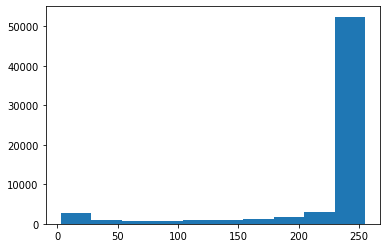

In [15]:
import matplotlib.pyplot as plt
plt.hist(img2.flatten())

(array([ 4188.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 61348.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

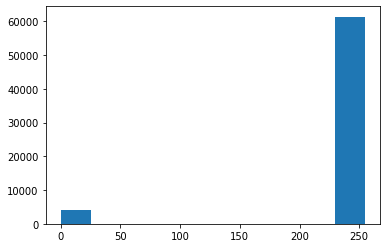

In [16]:
plt.hist(img1.flatten())

In [29]:
!python test.py --dataroot ./datasets/edges2cats_single --direction AtoB --model pix2pix --name open_images_hed_edges2cats_pix2pix_rand_batch_256_n_epochs_50_n_epochs_decay_50 --single_inference_mode True --dataset_mode single

# !python test.py --dataroot ./datasets/edges2cats_single --direction AtoB --model pix2pix --name open_images_hed_edges2cats_pix2pix --single_inference_mode True --dataset_mode single
# !python test.py --dataroot ./datasets/edges2cats_single --direction AtoB --model pix2pix --name open_images_sigma_0_edges2cats_pix2pix --single_inference_mode True --dataset_mode single

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/edges2cats_single  	[default: None]
             dataset_mode: single                        	[default: aligned]
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0         

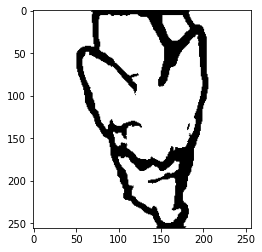

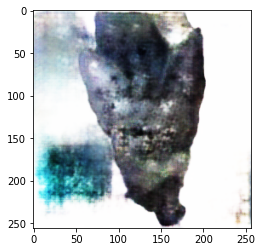

In [36]:
import cv2
import os
import random
test_output_folder = "./datasets/open_images_hed_edges2cats_pix2pix_rand_batch_256_n_epochs_50_n_epochs_decay_50"
test_input_folder = "./datasets/edges2cats_single/test"
rand_int = random.randint(0, len(os.listdir(test_input_folder))-1)
filename = os.listdir(test_input_folder)[rand_int]
input_image = cv2.imread(test_input_folder + "/" + filename)
plt.imshow(input_image)
plt.show()

image = cv2.imread(test_output_folder + "/fakeB_" + filename)
plt.imshow(image)
plt.show()

# Test Flow Debug

dataset [SingleDataset] was created
0
initialize network with normal
model [Pix2PixModel] was created
loading the model from ./checkpoints/open_images_proper_hed_edges2cats_pix2pix/latest_net_G.pth
---------- Networks initialized -------------
[Network G] Total number of parameters : 54.414 M
-----------------------------------------------


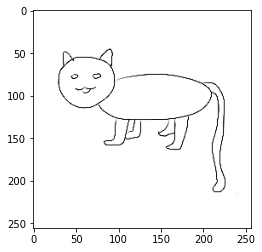

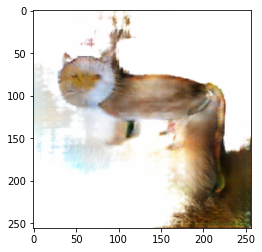

In [282]:
import cv2
import os
import torch
from options.test_options import TestOptions
from data import create_dataset
from models import create_model
from util.visualizer import save_images
from util import html
from util import util
import argparse
import numpy as np

opt = argparse.Namespace(
    aspect_ratio=1.0,
    batch_size=1,
    checkpoints_dir='./checkpoints',
    crop_size=256,
    dataroot='./datasets/debug',
    dataset_mode='single',
    direction='AtoB',
    display_winsize=256,
    epoch='latest',
    eval=False,
    gpu_ids=[0],
    init_gain=0.02,
    init_type='normal',
    input_nc=3,
    isTrain=False,
    load_iter=0,
    load_size=256,
    max_dataset_size=np.inf,
    model='pix2pix',
    n_layers_D=3,
#     name='open_images_hed_edges2cats_pix2pix_rand_batch_256_n_epochs_50_n_epochs_decay_50',
#     name='open_images_hed_edges2cats_pix2pix_rand_batch_256',
#     name='open_images_hed_edges2cats_pix2pix',
    name='open_images_proper_hed_edges2cats_pix2pix',
    ndf=64, 
    netD='basic', 
    netG='unet_256', 
    ngf=64, 
    no_dropout=False, 
    no_flip=False, 
    norm='batch', 
    ntest=np.inf, 
    num_test=50, 
    num_threads=4, 
    output_nc=3, 
    phase='test', 
    preprocess='resize_and_crop', 
    results_dir='./results/', 
    serial_batches=False,  
    suffix='',
    verbose=False)
opt.num_threads = 0   # test code only supports num_threads = 1
opt.batch_size = 1    # test code only supports batch_size = 1
opt.serial_batches = True  # disable data shuffling; comment this line if results on randomly chosen images are needed.
opt.no_flip = True    # no flip; comment this line if results on flipped images are needed.
opt.display_id = -1   # no visdom display; the test code saves the results to a HTML file.
dataset = create_dataset(opt)  # create a dataset given opt.dataset_mode and other options
model = create_model(opt)      # create a model given opt.model and other options
model.setup(opt)               # regular setup: load and print networks; create schedulers
dataset.dataset.A_paths = [
#     "./datasets/edges2cats_single/test/dilated_ccaatt.png",
      "./datasets/edges2cats_single/test/ccaatt.png",
#       "./datasets/edges2cats_single/test/pixelcat.png",
#           "./datasets/edges2cats_single/test/ccaatt_crop.png",
#           "./datasets/edges2cats_single/test/pixelcat_crop.png",
#     "./datasets/edges2cats_single/test/dilated_ccaatt_crop.png",
#     "./datasets/edges2cats_single/test/dilated_ccaatt_crop2.png",
#     "./datasets/edges2cats_single/test/dilated_pixelcat.png",
#     "./datasets/edges2cats_single/test/dilated_pixelcat_crop.png",
#     "./datasets/edges2cats_single/test/wrapped_around.png",
]

# test with eval mode. This only affects layers like batchnorm and dropout.
# For [pix2pix]: we use batchnorm and dropout in the original pix2pix. You can experiment it with and without eval() mode.
# For [CycleGAN]: It should not affect CycleGAN as CycleGAN uses instancenorm without dropout.
if opt.eval:
    model.eval()

for i, data in enumerate(dataset):
    if i >= opt.num_test:  # only apply our model to opt.num_test images.
        break
    data["B"] = torch.zeros_like(data["A"])
    model.set_input(data)  # unpack data from data loader
    model.test()           # run inference
    visuals = model.get_current_visuals()  # get image results
#     img_path = model.get_image_paths()     # get image paths
#     if i % 5 == 0:  # save images to an HTML file
#         print('processing (%04d)-th image... %s' % (i, img_path))
    # save_images(webpage, visuals, img_path, aspect_ratio=opt.aspect_ratio, width=opt.display_winsize)
    plt.imshow(visuals["real_A"].cpu().numpy()[0].transpose(1, 2, 0) * 0.5 + 0.5)
    plt.show()
    plt.imshow(visuals["fake_B"].cpu().numpy()[0].transpose(1, 2, 0) * 0.5 + 0.5)
    plt.show()
    

In [158]:
badfake.shape

(256, 256, 3)

In [158]:
badfake.shape

(256, 256, 3)

In [158]:
badfake.shape

(256, 256, 3)

In [158]:
badfake.shape

(256, 256, 3)

(256, 256, 3)
float32


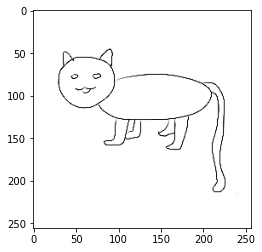

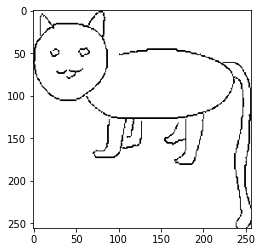

In [287]:
img = visuals["real_A"].cpu().numpy()[0].transpose(1, 2, 0) * 0.5 + 0.5
orig_shape = img.shape[:2]
print(img.shape)
print(img.dtype)
plt.imshow(img)
plt.show()
img = img.min(axis=2) > 0.5
x_vals = np.where(0.5 >  img.min(axis=0))[0]
x_min = np.min(x_vals)
x_max = np.max(x_vals)
y_vals = np.where(0.5 > img.min(axis=1))[0]
y_min = np.min(y_vals)
y_max = np.max(y_vals)
img = img[y_min:y_max, x_min:x_max] + 0.0
# img = img[y_min:y_max - 60, x_min:x_max] + 0.0
import scipy.ndimage
img = scipy.ndimage.zoom(img, zoom=[s2 / s1 for s1, s2 in zip(img.shape, orig_shape)])
img = (img > 0.5) + 0.0
assert img.shape == orig_shape
plt.imshow(img, cmap="gray")
# plt.imsave("./datasets/edges2cats_single/test/dilated_ccaatt_crop.png", img, cmap="gray")
# plt.imsave("./datasets/edges2cats_single/test/dilated_ccaatt_crop2.png", img, cmap="gray")
plt.imsave("./datasets/edges2cats_single/test/ccaatt_crop.png", img, cmap="gray")
# plt.imsave("./datasets/edges2cats_single/test/pixelcat_crop.png", img, cmap="gray")
# plt.imsave("./datasets/edges2cats_single/test/dilated_pixelcat_crop.png", img, cmap="gray")

In [129]:
foo = visuals["real_A"].cpu().numpy()[0].transpose(1, 2, 0) * 0.5 + 0.5
foo.min()

0.0

In [157]:
ls ../dataset/test

1_AB.png  badfake.png  edge_1_AB.png


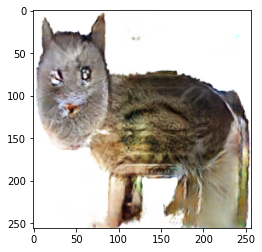

In [185]:
badfake = visuals["fake_B"].cpu().numpy()[0].transpose(1, 2, 0) * 0.5 + 0.5
plt.imshow(badfake, cmap="gray")
# plt.imsave("../dataset/test/badfake.png", img, cmap="gray")
from PIL import Image
im = Image.fromarray((badfake * 255).astype(np.uint8))
im.save("../dataset/test/badfake.png")

In [186]:
img = np.array(Image.open("../dataset/test_out/ind_0_badfake.png"))
Image.fromarray(img[:, :256]).save("./datasets/edges2cats_single/test/wrapped_around.png")

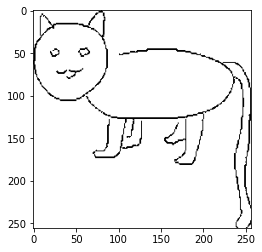

In [209]:
img = visuals["real_A"].cpu().numpy()[0].transpose(1, 2, 0) * 0.5 + 0.5
img = (img * 255).astype(np.uint8)
img = cv2.threshold(img, 127, 255, 0)[1]
plt.imshow(img)

In [211]:
im2,contours,hierarchy = cv2.findContours(img, 1, 2)

error: OpenCV(4.2.0) ../modules/imgproc/src/contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


### applying learned masks

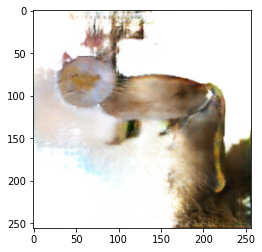

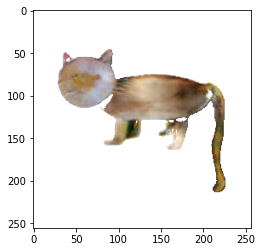

In [229]:
generated = visuals["fake_B"].cpu().numpy()[0].transpose(1, 2, 0) * 0.5 + 0.5
plt.imshow(generated)
plt.show()
mask = np.array(Image.open("/data/users/sash/pix2pix_cyclegan/pytorch-CycleGAN-and-pix2pix/datasets/edges2cats_single/test/ccaatt_mask.png"))
generated2 = mask[..., None] * generated + 1 - mask[..., None]
plt.imshow(generated2)
plt.show()

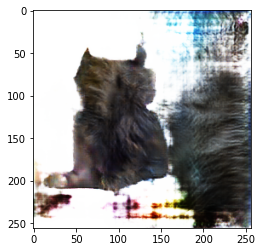

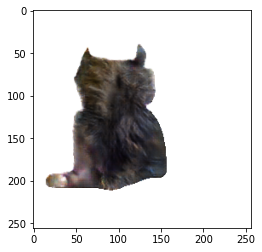

In [231]:
generated = visuals["fake_B"].cpu().numpy()[0].transpose(1, 2, 0) * 0.5 + 0.5
plt.imshow(generated)
plt.show()
mask = np.array(Image.open("/data/users/sash/pix2pix_cyclegan/pytorch-CycleGAN-and-pix2pix/datasets/edges2cats_single/test/pixelcat_mask.png"))
generated2 = mask[..., None] * generated + 1 - mask[..., None]
plt.imshow(generated2)
plt.show()

## Scriptify

In [350]:
def crop_to_zoom(img):
    orig_shape = img.shape[:2]
    plt.imshow(img)
    cropped_img = img.min(axis=2) > 0.5
    x_vals = np.where(0.5 >  cropped_img.min(axis=0))[0]
    x_min = np.min(x_vals)
    x_max = np.max(x_vals)
    y_vals = np.where(0.5 > cropped_img.min(axis=1))[0]
    y_min = np.min(y_vals)
    y_max = np.max(y_vals)
    cropped_img = cropped_img[y_min:y_max, x_min:x_max] + 0.0
    # img = img[y_min:y_max - 60, x_min:x_max] + 0.0
    import scipy.ndimage
    print(f"cropped_image shape: {cropped_img.shape}")
    zoom_scales = [s2 / s1 for s1, s2 in zip(cropped_img.shape, orig_shape)]
    cropped_img = scipy.ndimage.zoom(cropped_img, zoom=zoom_scales)
    cropped_img = (cropped_img > 0.5) + 0.0
    assert cropped_img.shape == orig_shape
    
    return cropped_img, x_min, x_max, y_min, y_max, zoom_scales

In [271]:
def imread(path):
    return np.array(Image.open(path)).astype(np.float32) / 255.

In [249]:
# expects this is type uint8, and between 0 to 1
def save_img(img, path):
    im = Image.fromarray((img * 255).astype(np.uint8))
    return im.save(path)

In [251]:
def pix2pix(A_path, model_name='open_images_proper_hed_edges2cats_pix2pix'):
    opt = argparse.Namespace(
        aspect_ratio=1.0,
        batch_size=1,
        checkpoints_dir='./checkpoints',
        crop_size=256,
        dataroot='./datasets/debug',
        dataset_mode='single',
        direction='AtoB',
        display_winsize=256,
        epoch='latest',
        eval=False,
        gpu_ids=[0],
        init_gain=0.02,
        init_type='normal',
        input_nc=3,
        isTrain=False,
        load_iter=0,
        load_size=256,
        max_dataset_size=np.inf,
        model='pix2pix',
        n_layers_D=3,
        name=model_name,
        ndf=64, 
        netD='basic', 
        netG='unet_256', 
        ngf=64, 
        no_dropout=False, 
        no_flip=False, 
        norm='batch', 
        ntest=np.inf, 
        num_test=50, 
        num_threads=4, 
        output_nc=3, 
        phase='test', 
        preprocess='resize_and_crop', 
        results_dir='./results/', 
        serial_batches=False,  
        suffix='',
        verbose=False)
    opt.num_threads = 0   # test code only supports num_threads = 1
    opt.batch_size = 1    # test code only supports batch_size = 1
    opt.serial_batches = True  # disable data shuffling; comment this line if results on randomly chosen images are needed.
    opt.no_flip = True    # no flip; comment this line if results on flipped images are needed.
    opt.display_id = -1   # no visdom display; the test code saves the results to a HTML file.
    dataset = create_dataset(opt)  # create a dataset given opt.dataset_mode and other options
    model = create_model(opt)      # create a model given opt.model and other options
    model.setup(opt)               # regular setup: load and print networks; create schedulers
    dataset.dataset.A_paths = [A_path]

    # test with eval mode. This only affects layers like batchnorm and dropout.
    # For [pix2pix]: we use batchnorm and dropout in the original pix2pix. You can experiment it with and without eval() mode.
    # For [CycleGAN]: It should not affect CycleGAN as CycleGAN uses instancenorm without dropout.
    if opt.eval:
        model.eval()

    for i, data in enumerate(dataset):
        if i >= opt.num_test:  # only apply our model to opt.num_test images.
            break
        data["B"] = torch.zeros_like(data["A"])
        model.set_input(data)  # unpack data from data loader
        model.test()           # run inference
        visuals = model.get_current_visuals()  # get image results
        fakeB = visuals["fake_B"].cpu().numpy()[0].transpose(1, 2, 0) * 0.5 + 0.5  ## between 0 and 1
        plt.imshow(visuals["real_A"].cpu().numpy()[0].transpose(1, 2, 0) * 0.5 + 0.5)
        plt.show()
        plt.imshow(fakeB)
        plt.show()
        return fakeB

In [257]:
""" Parts of the U-Net model """

import torch
import torch.nn as nn
import torch.nn.functional as F


class DoubleConv(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""

    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)


class Down(nn.Module):
    """Downscaling with maxpool then double conv"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)


class Up(nn.Module):
    """Upscaling then double conv"""

    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()

        # if bilinear, use the normal convolutions to reduce the number of channels
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels, in_channels // 2)
        else:
            self.up = nn.ConvTranspose2d(in_channels , in_channels // 2, kernel_size=2, stride=2)
            self.conv = DoubleConv(in_channels, out_channels)


    def forward(self, x1, x2):
        x1 = self.up(x1)
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])
        # if you have padding issues, see
        # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
        # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)

In [258]:

class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=True, channel_multiplier=64):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear
        c = channel_multiplier

        self.inc = DoubleConv(n_channels, c)
        self.down1 = Down(c, 2 * c)
        self.down2 = Down(2 * c, 4 * c)
        self.down3 = Down(4 * c, 8 * c)
        factor = 2 if bilinear else 1
        self.down4 = Down(8 * c, 16 * c // factor)
        self.up1 = Up(16 * c, 8 * c // factor, bilinear)
        self.up2 = Up(8 * c, 4 * c // factor, bilinear)
        self.up3 = Up(4 * c, 2 * c // factor, bilinear)
        self.up4 = Up(2 * c, c, bilinear)
        self.outc = OutConv(c, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits

In [311]:
# expectation: img float32 between 0,1 [h, w]
def apply_mask(edge, model):
    with torch.no_grad():
        res = torch.sigmoid(model(1 - torch.tensor(edge[None, None, :, :, 0]).to(device))[0, 0])
        res = res.detach().cpu().numpy()
        res = res > 0.5
    return res

In [253]:
def uncrop_to_unzoom(img):
    pass

In [309]:
model = None

In [432]:
# Run Crop
from pathlib import Path

def test(edge_path, model):
    base_path = Path(os.path.dirname(edge_path)).parent
    filename = os.path.basename(edge_path)
    cropped_dir = os.path.join(base_path, "cropped")
    fakeBs_dir = os.path.join(base_path, "fakeBs")
    
    edge = np.array(Image.open(edge_path))
    plt.imshow(edge)
    plt.show()
    edge = edge[...,:3].astype(np.float32) / 255.
    cropped, xmin, xmax, ymin, ymax, zoom_scales = crop_to_zoom(edge)
    print(f"cropped max: {np.max(cropped)}")
    plt.imshow(cropped, cmap="gray")
    plt.show()
    cropped_path = os.path.join(cropped_dir, filename)
    save_img(cropped, cropped_path)

    # Run pix2pix on cropped
    fakeB = pix2pix(cropped_path, "open_images_proper_hed_edges2cats_pix2pix_batch_32_n_epochs_1000_n_epochs_decay_200")
    print(fakeB.shape)

    # Put back pix2pix to uncropped
    size = 256
    # uncropped_fakeB = (np.pad(fakeB, ((xmin, ymin), (size-xmax, size-ymax), (0, 0)), 'constant', constant_values=1) * 255).astype(np.uint8)
    # print(uncropped_fakeB.shape)
    # uncropped_fakeB = np.array(Image.fromarray(uncropped_fakeB).resize((size, size), Image.BICUBIC))
    unzoom_scales = [1.0/z for z in zoom_scales]
    unzoom_scales.append(1)
    unzoom_fakeB = scipy.ndimage.zoom(fakeB, zoom=unzoom_scales)
    uncropped_fakeB = np.ones((256, 256, 3))
    uncropped_fakeB[ymin:ymax, xmin:xmax] = unzoom_fakeB
    uncropped_fakeB = uncropped_fakeB.clip(0.0, 1.0)
    generated_path = os.path.join(fakeBs_dir, filename)
    save_img(uncropped_fakeB, generated_path)
    print(f"uncropped_fakeB max: {np.max(uncropped_fakeB)}")
    plt.imshow(uncropped_fakeB)
    plt.show()
    
    mask = apply_mask(edge, model)
    plt.imshow(mask.astype(np.float32))
    plt.show()

    # # Apply Mask to Generated_B
    generated_fakeB = imread(generated_path)
    generated_fakeB = mask[..., None] * generated_fakeB + 1 - mask[..., None]
    print(f"generated_fakeB max: {np.max(generated_fakeB)}")
    plt.imshow(generated_fakeB)
    plt.show()

    # seg_mask_path = "/data/users/sash/pix2pix_cyclegan/pytorch-CycleGAN-and-pix2pix/datasets/edges2cats_single/test/ccaatt_cropped_mask.png"
    # save_img(seg_mask, seg_mask_path)

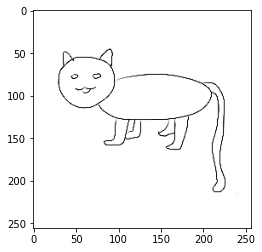

cropped_image shape: (168, 196)
cropped max: 1.0


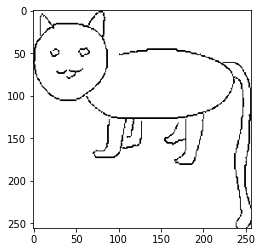

dataset [SingleDataset] was created
0
initialize network with normal
model [Pix2PixModel] was created
loading the model from ./checkpoints/open_images_proper_hed_edges2cats_pix2pix_batch_32_n_epochs_1000_n_epochs_decay_200/latest_net_G.pth
---------- Networks initialized -------------
[Network G] Total number of parameters : 54.414 M
-----------------------------------------------


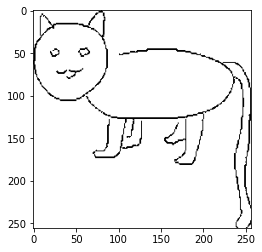

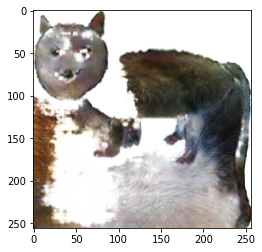

(256, 256, 3)
uncropped_fakeB max: 1.0


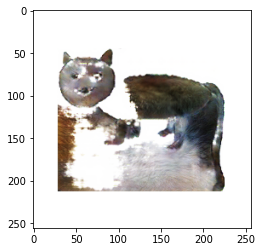

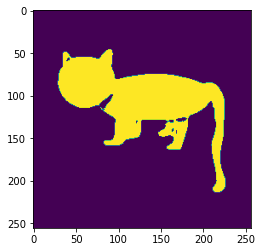

generated_fakeB max: 1.0


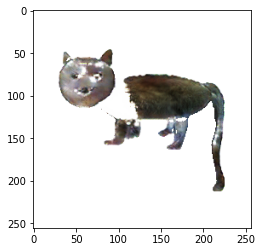

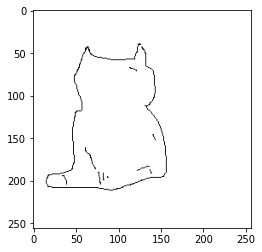

cropped_image shape: (172, 141)
cropped max: 1.0


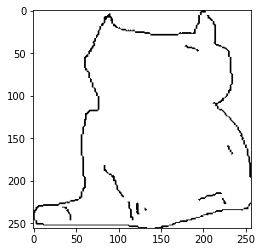

dataset [SingleDataset] was created
0
initialize network with normal
model [Pix2PixModel] was created
loading the model from ./checkpoints/open_images_proper_hed_edges2cats_pix2pix_batch_32_n_epochs_1000_n_epochs_decay_200/latest_net_G.pth
---------- Networks initialized -------------
[Network G] Total number of parameters : 54.414 M
-----------------------------------------------


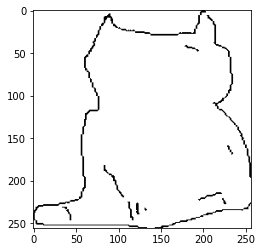

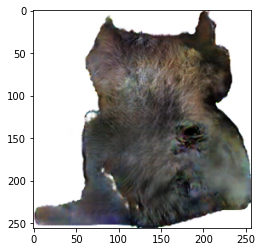

(256, 256, 3)
uncropped_fakeB max: 1.0


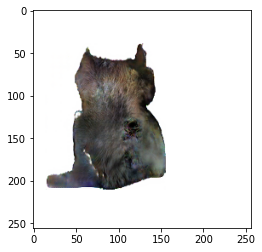

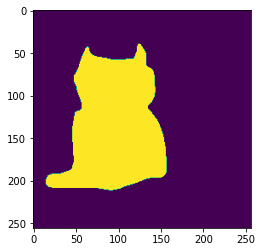

generated_fakeB max: 1.0


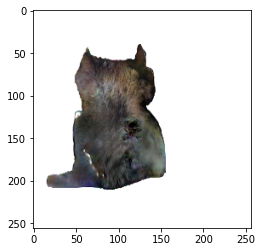

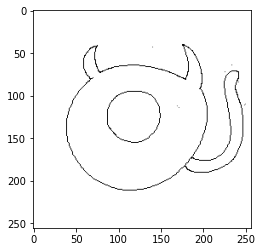

cropped_image shape: (171, 210)
cropped max: 1.0


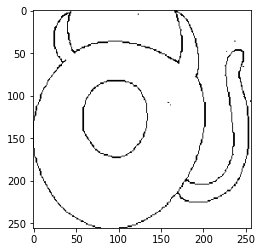

dataset [SingleDataset] was created
0
initialize network with normal
model [Pix2PixModel] was created
loading the model from ./checkpoints/open_images_proper_hed_edges2cats_pix2pix_batch_32_n_epochs_1000_n_epochs_decay_200/latest_net_G.pth
---------- Networks initialized -------------
[Network G] Total number of parameters : 54.414 M
-----------------------------------------------


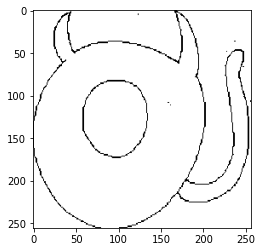

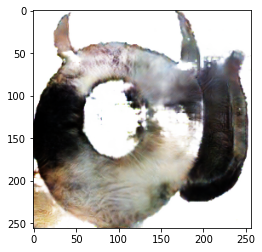

(256, 256, 3)
uncropped_fakeB max: 1.0


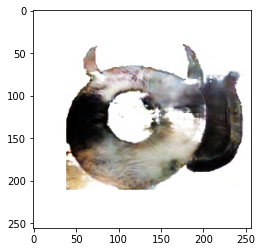

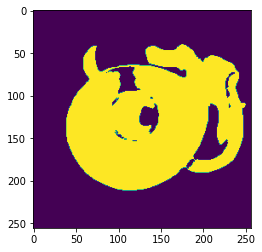

generated_fakeB max: 1.0


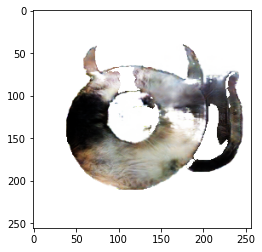

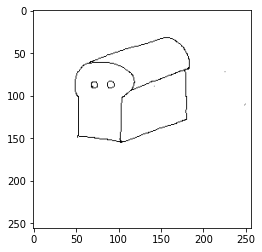

cropped_image shape: (123, 200)
cropped max: 1.0


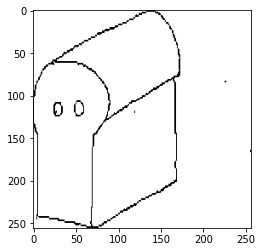

dataset [SingleDataset] was created
0
initialize network with normal
model [Pix2PixModel] was created
loading the model from ./checkpoints/open_images_proper_hed_edges2cats_pix2pix_batch_32_n_epochs_1000_n_epochs_decay_200/latest_net_G.pth
---------- Networks initialized -------------
[Network G] Total number of parameters : 54.414 M
-----------------------------------------------


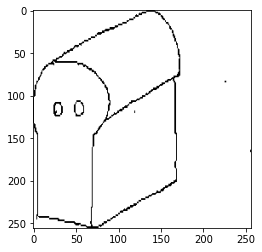

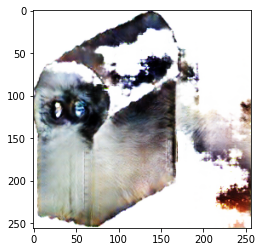

(256, 256, 3)
uncropped_fakeB max: 1.0


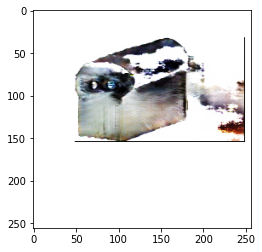

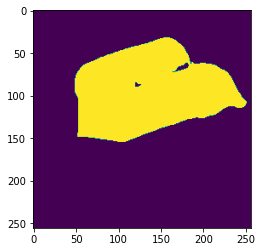

generated_fakeB max: 1.0


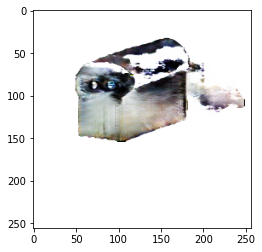

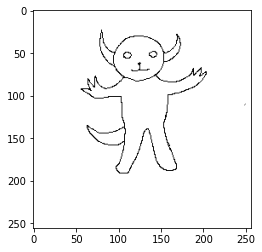

cropped_image shape: (168, 193)
cropped max: 1.0


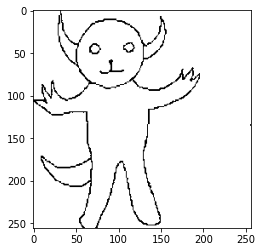

dataset [SingleDataset] was created
0
initialize network with normal
model [Pix2PixModel] was created
loading the model from ./checkpoints/open_images_proper_hed_edges2cats_pix2pix_batch_32_n_epochs_1000_n_epochs_decay_200/latest_net_G.pth
---------- Networks initialized -------------
[Network G] Total number of parameters : 54.414 M
-----------------------------------------------


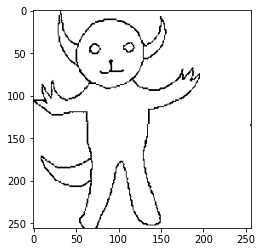

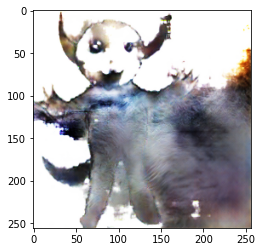

(256, 256, 3)
uncropped_fakeB max: 1.0


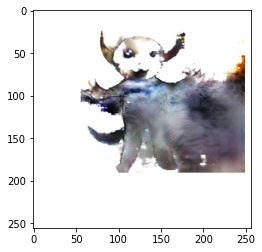

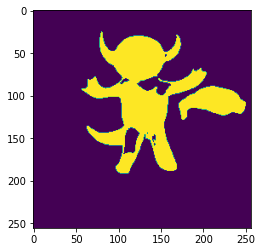

generated_fakeB max: 1.0


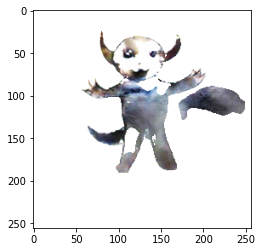

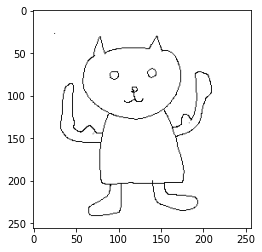

cropped_image shape: (214, 184)
cropped max: 1.0


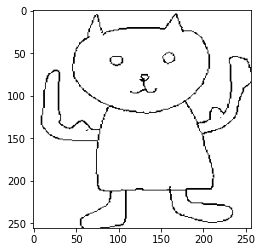

dataset [SingleDataset] was created
0
initialize network with normal
model [Pix2PixModel] was created
loading the model from ./checkpoints/open_images_proper_hed_edges2cats_pix2pix_batch_32_n_epochs_1000_n_epochs_decay_200/latest_net_G.pth
---------- Networks initialized -------------
[Network G] Total number of parameters : 54.414 M
-----------------------------------------------


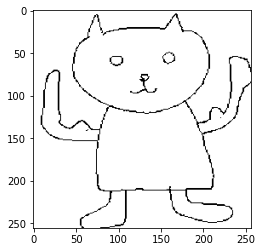

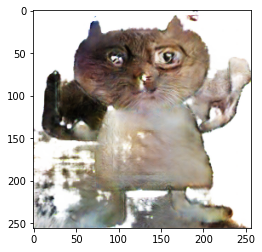

(256, 256, 3)
uncropped_fakeB max: 1.0


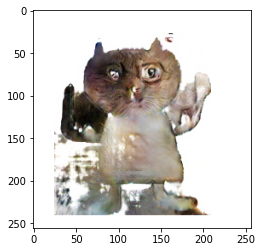

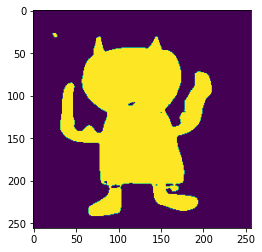

generated_fakeB max: 1.0


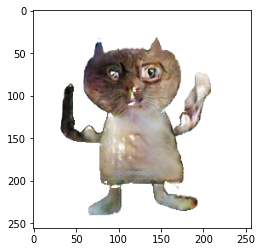

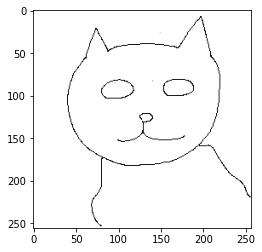

cropped_image shape: (246, 215)
cropped max: 1.0


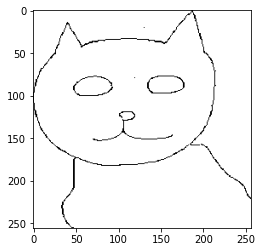

dataset [SingleDataset] was created
0
initialize network with normal
model [Pix2PixModel] was created
loading the model from ./checkpoints/open_images_proper_hed_edges2cats_pix2pix_batch_32_n_epochs_1000_n_epochs_decay_200/latest_net_G.pth
---------- Networks initialized -------------
[Network G] Total number of parameters : 54.414 M
-----------------------------------------------


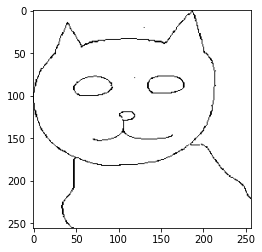

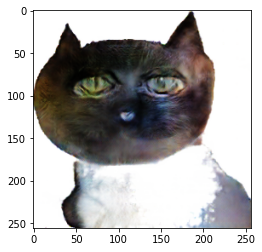

(256, 256, 3)
uncropped_fakeB max: 1.0


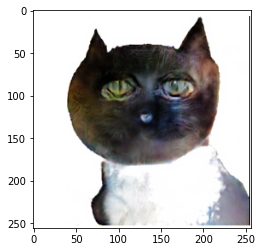

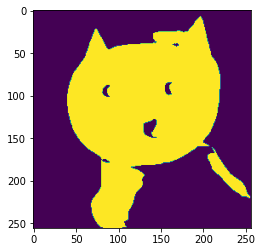

generated_fakeB max: 1.0


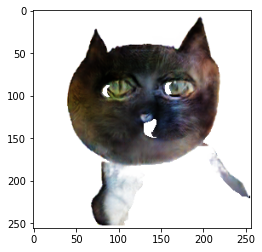

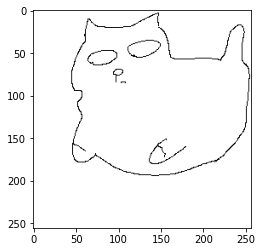

cropped_image shape: (191, 209)
cropped max: 1.0


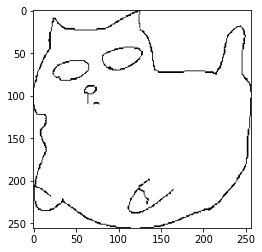

dataset [SingleDataset] was created
0
initialize network with normal
model [Pix2PixModel] was created
loading the model from ./checkpoints/open_images_proper_hed_edges2cats_pix2pix_batch_32_n_epochs_1000_n_epochs_decay_200/latest_net_G.pth
---------- Networks initialized -------------
[Network G] Total number of parameters : 54.414 M
-----------------------------------------------


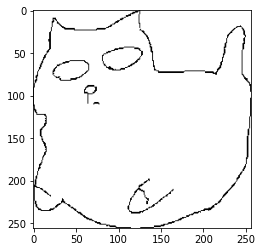

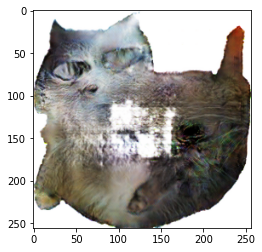

(256, 256, 3)
uncropped_fakeB max: 1.0


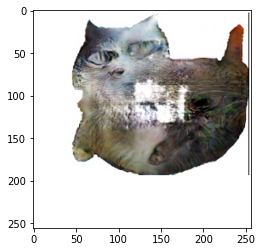

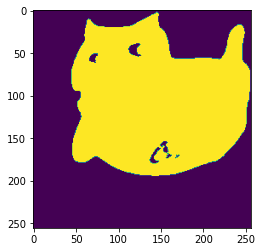

generated_fakeB max: 1.0


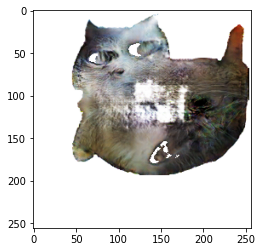

In [433]:
edge_dir = "/data/users/sash/pix2pix_cyclegan/pytorch-CycleGAN-and-pix2pix/datasets/tests/samples"
# # Mask on the uncropped.
if model is None:
    device = "cuda:7"
    model = UNet(n_channels=1, n_classes=1, channel_multiplier=16)
    _ = model.to(device)
    model.load_state_dict(torch.load("edge2segment.th"))
    model.eval()

for filename in os.listdir(edge_dir):
    edge_path = os.path.join(edge_dir, filename)
    test(edge_path, model)

In [364]:
ls /data/users/sash/pix2pix_cyclegan/pytorch-CycleGAN-and-pix2pix/datasets/tests

cropped/  fakeBs/


In [398]:
edge.shape

(256, 256, 3)

In [399]:
cropped.shape

(256, 256)

In [400]:
zoom_scales

[1.5238095238095237, 1.3061224489795917]

In [401]:
[256 / z for z in zoom_scales]

[168.0, 196.00000000000003]

In [408]:
unzoom_fakeB.shape

(168, 196, 3)

In [409]:
y_max - y_min

168

In [410]:
x_max - x_min

196

In [411]:
uncropped_fakeB[y_min:y_max, x_min:x_max] = unzoom_fakeB

In [412]:
%debug

> <ipython-input-406-13bb8cc46317>(34)test()
     32     unzoom_fakeB = scipy.ndimage.zoom(fakeB, zoom=unzoom_scales)
     33     uncropped_fakeB = np.ones((256, 256, 3))
---> 34     uncropped_fakeB[y_min:y_max, x_min:x_max] = unzoom_fakeB
     35     uncropped_fakeB = uncropped_fakeB.clip(0.0, 1.0)
     36     generated_path = os.path.join(fakeBs_dir, filename)

ipdb> p unzoom_fakeB
array([[[0.9999987 , 0.9999995 , 0.9999996 ],
        [1.0000001 , 1.        , 1.        ],
        [0.99999994, 1.        , 1.        ],
        ...,
        [0.9999993 , 0.9999994 , 0.99999964],
        [1.0000024 , 1.0000019 , 1.0000012 ],
        [0.99997985, 0.9999836 , 0.99998987]],

       [[1.0000001 , 1.0000001 , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.0000001 , 1.0000001 , 1.        ],
        [0.9999997 , 0.99999976, 0.9999998 ],
        [1.0000026 , 1.0000021 , 1.0000013 ]],

       [[1.        , 1.        